# Self Case Study 1 - Ashrae Great Energy Predictor-III

### Defining the Problem-

To cut costs, emissions, and energy consumption, major investments have been made to increase the energy efficiency of buildings. The building owner pays the difference between the actual quantity of energy used and what would have been utilised if efficiency enhancement procedures weren't used. The machine learning model provided the latter values. We predict the future energy demand based on the past energy use of more than 1400 buildings over the course of a year. To understand the cost and energy savings, this will then be compared to the actual energy usage with efficiency method.

## Defining Problem to a Machine Learning Problem-

###### - Overview taken from- https://www.kaggle.com/competitions/ashrae-energy-prediction/data
### Overview of the Data provided:

We have 5 csv files.

1. **train.csv file**:
    - building_id - Foreign key for the building metadata.
    - meter - The meter id code. Read as {0: electricity, 1: chilledwater, 2: steam, 3: hotwater}. Not every building has all meter types.
    - timestamp - When the measurement was taken
    - meter_reading - The target variable. Energy consumption in kWh (or equivalent). Note that this is real data with measurement error, which we expect will impose a baseline level of modeling error. UPDATE: as discussed here, the site 0 electric meter readings are in kBTU.


2. **building_meta.csv file**:
    - site_id - Foreign key for the weather files.
    - building_id - Foreign key for training.csv
    - primary_use - Indicator of the primary category of activities for the building based on EnergyStar property type definitions
    - square_feet - Gross floor area of the building
    - year_built - Year building was opened
    - floor_count - Number of floors of the building


3. **weather_[train/test].csv file**: Weather data from a meteorological station as close as possible to the site.
    - site_id
    - timestamp
    - air_temperature - Degrees Celsius
    - cloud_coverage - Portion of the sky covered in clouds, in oktas
    - dew_temperature - Degrees Celsius
    - precip_depth_1_hr - Millimeters
    - sea_level_pressure - Millibar/hectopascals
    - wind_direction - Compass direction (0-360)
    - wind_speed - Meters per second
    
    
4. **test.csv file**: The submission files use row numbers for ID codes in order to save space on the file uploads. test.csv has no feature data; it exists so you can get your predictions into the correct order.

    - row_id - Row id for your submission file
    - building_id - Building id code
    - meter - The meter id code
    - timestamp - Timestamps for the test data period
    
- All floats in the solution file were truncated to four decimal places; we recommend you do the same to save space on your file upload.
- There are gaps in some of the meter readings for both the train and test sets. Gaps in the test set are not revealed or scored.

### The Machine Learning Problem Approach:
- We will try to approach this problem as a regression problem.
- This is so because, as we are provided with energy consumption data at time t, we will try to predict the energy consumption at time t+1.

In [1]:
# Reference- https://www.kaggle.com/code/arjanso/reducing-dataframe-memory-size-by-65/notebook
# Reference- https://www.kaggle.com/code/caesarlupum/ashrae-start-here-a-gentle-introduction/notebook
# Reference- https://www.kaggle.com/code/gemartin/load-data-reduce-memory-usage/notebook
# Reference- https://www.kaggle.com/code/abhigyandatta/eda-ashrae-energy-consumption
# Reference- https://www.kaggle.com/code/sakurakh/energy-prediction-ii
# Reference- https://www.kaggle.com/code/syoshinaga/ashrae-eda
# Reference- https://www.kaggle.com/code/emphymachine/3-ashrae-energy-prediction-eda-pjt
# Reference- https://www.kaggle.com/code/usefgadallah/energy-prediction-eda
# Reference- https://www.kaggle.com/code/ts1789/ashrae-part-2-feature-engineering-and-selectionot
# Reference- https://www.kaggle.com/code/ts1789/ashrae-part-1-eda
# Reference- https://www.kaggle.com/code/moatazbellahahmed/machine-project-eda
# Reference- https://www.kaggle.com/code/salmazakzouk/ashrae-project
# Reference- https://www.kaggle.com/code/varunjain113/ashrae-starting-dataset-tabularpandas-object
# Reference- https://www.kaggle.com/datadugong/locate-better-cities-by-weather-temp-fill-nans
# Reference- https://www.kaggle.com/c/ashrae-energy-prediction/discussion/115698
# Reference- https://www.kaggle.com/patrick0302/locate-cities-according-weather-temperature
# Reference- https://www.kaggle.com/code/ashishpatel26/feature-importance-of-lightgbm/notebook
# Reference- https://www.kaggle.com/code/jeeperscreepers/ashrae-gep-iii-feature-engineering-try-1
# Reference- https://www.kaggle.com/code/remisharoon/ashrae-gep-iii-rms-nb/notebook
# Reference- https://www.kaggle.com/general/175075
# Reference- https://www.kaggle.com/code/ryches/simple-lgbm-solution/notebook
# Reference- https://www.kaggle.com/competitions/ashrae-energy-prediction/discussion/122863
# Reference- https://www.kaggle.com/c/ashrae-energy-prediction/discussion/124984
# Reference- https://www.kaggle.com/code/rohanrao/ashrae-half-and-half/notebook
# Reference- https://stackoverflow.com/questions/57534739/catboosterror-cat-features-must-be-integer-or-string-real-number-values-and-na
# Reference- https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/
# Reference- https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/
# Reference- https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
# Reference- https://machinelearningmastery.com/light-gradient-boosted-machine-lightgbm-ensemble/
# Reference- https://www.statisticshowto.com/variance-inflation-factor/
# Reference- https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b
# Reference- https://www.programcreek.com/python/example/88794/lightgbm.LGBMRegressor
# Reference- https://numpy.org/doc/stable/reference/generated/numpy.expm1.html
# Reference- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# Reference- https://www.geeksforgeeks.org/random-forest-regression-in-python/
# Reference- https://xgboost.readthedocs.io/en/stable/parameter.html
# Reference- https://www.geeksforgeeks.org/numpy-expm1-python/
# Reference- https://www.mikulskibartosz.name/how-to-reduce-memory-usage-in-pandas/
# Reference- https://stackoverflow.com/questions/57531388/how-can-i-reduce-the-memory-of-a-pandas-dataframe
# Reference- https://numpy.org/doc/stable/reference/generated/numpy.log1p.html#numpy.log1p
# Reference- https://seaborn.pydata.org/generated/seaborn.distplot.html
# Reference- https://www.folkstalk.com/2022/10/hwo-to-separate-datetime-column-into-date-and-time-pandas-with-code-examples.html
# Reference- https://www.w3resource.com/pandas/series/series-dt-dayofweek.php
# Reference- https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html
# Reference- https://stackabuse.com/rotate-axis-labels-in-matplotlib/
# Reference- https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# Reference- https://hatarilabs.com/ih-en/how-to-make-a-wind-rose-with-python-tutorial
# Reference- https://seaborn.pydata.org/generated/seaborn.heatmap.html
# Reference- https://www.geeksforgeeks.org/colormaps-in-seaborn-heatmaps/
# Reference- https://medium.com/analytics-vidhya/ashrae-great-energy-predictor-iii-a-machine-learning-case-study-a01a67eb048d
# Reference- https://www.researchgate.net/publication/343855462_The_ASHRAE_Great_Energy_Predictor_III_competition_Overview_and_results
# Reference- https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html
# Reference- https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python
# Reference- https://stackoverflow.com/questions/68035628/split-date-into-day-of-the-week-month-year-using-pyspark
# Reference- https://towardsdatascience.com/violin-strip-swarm-and-raincloud-plots-in-python-as-better-sometimes-alternatives-to-a-boxplot-15019bdff8f8
# Reference- https://medium.com/@chandanaroyal99/ashrae-great-energy-predictor-iii-case-study-66a25acd77f0
# Reference- https://blog.insightdatascience.com/data-visualization-in-python-advanced-functionality-in-seaborn-20d217f1a9a6
# Reference- https://opensource.com/article/20/4/plot-data-python
# Reference- https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
# Reference- https://seaborn.pydata.org/generated/seaborn.scatterplot.html
# Reference- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
# Reference- https://bmcnoldy.rsmas.miami.edu/Humidity.html
# Reference- https://bmcnoldy.rsmas.miami.edu/humidity_conversions.pdf
# Reference- https://pypi.org/project/meteocalc/
# Reference- https://www.geeksforgeeks.org/python-holidays-library/
# Reference- https://towardsdatascience.com/5-minute-guide-to-detecting-holidays-in-python-c270f8479387
# Reference- https://scikit-learn.org/stable/modules/cross_validation.html#:~:text=in%20each%20repetition.-,Leave%20One%20Out%20(LOO),-%C2%B6
# Reference- https://www.kaggle.com/code/remisharoon/ashrae-gep-iii-rms-nb/notebook
# Reference- https://medium.com/@ayushv23/ashrae-great-energy-predictor-iii-a-machine-learning-case-study-5f36abfe54ad
# Reference- https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
# Reference- https://stackoverflow.com/questions/53413701/feature-importance-using-lightgbm
# Reference- https://www.askpython.com/python/examples/rmse-root-mean-square-error
# Reference- https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python
# Reference- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# Reference- https://www.geeksforgeeks.org/ml-mathematical-explanation-of-rmse-and-r-squared-error/
# Reference- https://medium.com/scavs-ai/feature-selection-with-lofo-importance-540b9d77b734
# Reference- https://stackoverflow.com/questions/71692741/using-groupkfold-with-lofo-importance
# Reference- https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751
# Reference- http://statisticshowto.com/variance-inflation-factor/
# Reference- https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
# Reference- https://pub.towardsai.net/ashrae-great-energy-prediction-challenge-cefab05e4f2
# Reference- https://github.com/buds-lab/ashrae-great-energy-predictor-3-solution-analysis
# Reference- https://github.com/vdhar1992/ASHRAE_Great_energy_predictorIII_CaseStudy/blob/main/ASHRAE_GreatEnergyPredictorIII.ipynb
# Reference- https://github.com/manas3858/ASHRAE---Great-Energy-Predictor-III/blob/master/ASHRAE%20Challenge.ipynb
# Reference- https://github.com/Apoorvajasti/ASHRAE-Great-Energy-Predictor-III/blob/master/Intro%20to%20Data%20-%20ASHRAE%20Project%20(Python%20-%20Colab).ipynb
# Reference- https://github.com/energeeks/ashrae-energy-prediction
# Reference- https://github.com/Taher-web-dev/ASHRAE---Great-Energy-Predictor-III/blob/master/Cleaning%20and%20data%20exploration%20_%20interesting%20.ipynb
# Reference- https://github.com/VikasSingh-DS/kaggle-ASHRAE-Great-Energy-Comp/blob/master/ashrae-great-energy-insightful-eda-fe-lgbm.ipynb
# Reference- https://github.com/manikayya/ASHRAE-Great-Energy-Prediction-III/blob/main/EDA_ASHRAE_Great_Energy_Predictor_III.ipynb
# Reference- https://github.com/aerdem4/lofo-importance/blob/master/LOFOImportance%20Example.ipynb
# Reference- https://etav.github.io/python/vif_factor_python.html
# Reference- https://github.com/energeeks/ashrae-energy-prediction/tree/master/notebooks
# Reference- https://github.com/Chandugundluru/Ashrae-Great-Energy-predictor
# Reference- https://github.com/ayush-a11y/ASHRAE---Great-Energy-Predictor-III
# Reference- https://github.com/martian1231/caseStudyOne/blob/main/ASHRAE_Great_Energy_Predictor_III(Modeling).ipynb
# Reference- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# Reference- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# Reference- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# Reference- https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
# Reference- https://catboost.ai/en/docs/concepts/python-reference_catboostregressor
# Reference- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html
# Reference- https://www.analyticsvidhya.com/blog/2020/12/improve-predictive-model-score-stacking-regressor/
# Reference- https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
# Reference- https://towardsdatascience.com/just-keep-stacking-implement-stacking-regression-in-python-using-mlxtend-3250ff327ee5
# Reference- https://machinelearningmastery.com/xgboost-for-regression/
# Reference- https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
# Reference- https://stackoverflow.com/questions/43855162/rmse-rmsle-loss-function-in-keras
# Reference- https://www.samy101.com/projects/2019-kaggle-ashraegep3/
# Reference- https://martian1231-py.medium.com/ashrae-great-energy-predictor-iii-a-machine-learning-self-case-study-5c9e9d0ea11d
# Reference- https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/
# Reference- https://stackoverflow.com/questions/12555323/how-to-add-a-new-column-to-an-existing-dataframe
# Reference- https://towardsdatascience.com/estimating-counterfactual-energy-usage-of-buildings-with-machine-learning-8ca91ec66c08
# Reference- https://stackoverflow.com/questions/32565829/simple-way-to-measure-cell-execution-time-in-ipython-notebook
# Reference- https://gsarantitis.wordpress.com/2019/07/16/how-to-persist-categorical-encoding-in-machine-learning-deployment-phase/

## 1. Basic Data Loading, Checking for null values and Merging Files to reduce Complexity

### 1.1 Loading Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from meteocalc import feels_like, Temp
import datetime as dt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import holidays
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance
from tqdm import tqdm_notebook as tqdm
import pickle
import joblib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from tqdm import tqdm
import catboost as catb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from prettytable import PrettyTable

/home/nukul/anaconda3/lib/python3.9/site-packages/lofo/lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


#### Using below code since without this, the laptop crashes. Even google colab also crashes due to high memory consumption!

In [3]:
def reduce_memory_usage(data):

    start_memory = data.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_memory))
    
    for col in data.columns:
        col_type = data[col].dtype
        
        if col_type != object:
            c_min = data[col].min()
            c_max = data[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    data[col] = data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    data[col] = data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    data[col] = data[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    data[col] = data[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    data[col] = data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    data[col] = data[col].astype(np.float32)
                else:
                    data[col] = data[col].astype(np.float64)
        else:
            data[col] = data[col].astype('category')

    end_memory = data.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_memory))
    print('Decreased by {:.1f}%'.format(100 * (start_memory - end_memory) / start_memory))
    
    return data

In [4]:
train = pd.read_csv('train.csv')
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [5]:
train = reduce_memory_usage(train)

Memory usage of dataframe is 616.95 MB
Memory usage after optimization is: 173.84 MB
Decreased by 71.8%


In [6]:
test = pd.read_csv('test.csv')
test.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


In [7]:
test = reduce_memory_usage(test)

Memory usage of dataframe is 1272.51 MB
Memory usage after optimization is: 358.53 MB
Decreased by 71.8%


In [8]:
weather_train = pd.read_csv('weather_train.csv')
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [9]:
weather_train = reduce_memory_usage(weather_train)

Memory usage of dataframe is 9.60 MB
Memory usage after optimization is: 2.59 MB
Decreased by 73.1%


In [10]:
weather_test = pd.read_csv('weather_test.csv')
weather_test.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


In [11]:
weather_test = reduce_memory_usage(weather_test)

Memory usage of dataframe is 19.04 MB
Memory usage after optimization is: 5.13 MB
Decreased by 73.0%


In [12]:
building_metadata = pd.read_csv('building_metadata.csv')
building_metadata.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [13]:
building_metadata = reduce_memory_usage(building_metadata)

Memory usage of dataframe is 0.07 MB
Memory usage after optimization is: 0.02 MB
Decreased by 73.9%


### 1.2 Merging Data files into train_data and test_data

#### Merging to train altogether
- It can be well seen that, train and building_metadata have a common column- building_id.
- We, thus, merge train and building_metadata dataframes to create train_data

In [14]:
train_data = train.merge(building_metadata,on='building_id',how='left')
train_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN


- Also, weather_train has common columns of timestamp and site_id.
- So, we merge weather_train with train_data to get the final training dataframe.

In [15]:
train_data = train_data.merge(weather_train,on=['timestamp','site_id'],how='left')
train_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


#### Merging to test altogether
- Again, we can see that, test and building_metadata have a common column- building_id.
- We, thus, merge test and building_metadata dataframes to create test_data

In [16]:
test_data = test.merge(building_metadata,on=['building_id'],how='left')
test_data.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN


- Also, weather_test has common columns of timestamp and site_id.
- So, we merge weather_test with test_data to get the final testing dataframe.

In [17]:
test_data = test_data.merge(weather_test,on=['timestamp','site_id'],how='left')
test_data.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609


In [18]:
train_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


In [19]:
test_data.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609


- We now effectively have two dataframes- train_data and test_data dataframes.
- We now proceed with Exploratory Data Analysis using train_data.

## 2. Exploratory Data Analysis

## 2.1  Individual Distributions 

### 2.1.1 Target Variable - 'meter_reading' distribution

In [20]:
train_data['meter_reading'].describe()

count    2.021610e+07
mean     1.988706e+03
std      1.532159e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.877500e+01
75%      2.679840e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

- We observe that the values of train_data['meter_reading] are very high and that there may be an outlier point causing the mean become 1.988706e+03.

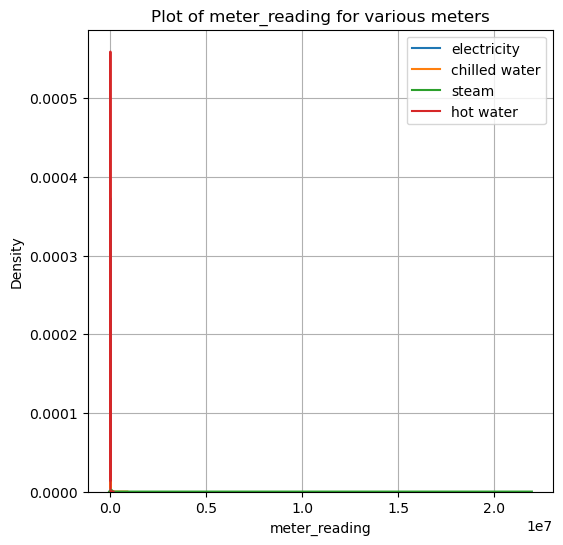

In [21]:
plt.figure(figsize= (6,6))
meters = sorted(train_data['meter'].unique())
for i in meters:
    data_pts = train_data.query(f'meter=={i}')
    sns.kdeplot(data_pts['meter_reading'],label=i)
    plt.xlabel('meter_reading')
    plt.ylabel('Density')
    plt.legend(['electricity', 'chilled water', 'steam', 'hot water'])
    plt.title('Plot of meter_reading for various meters')
plt.grid()

- As can be seen the mean value of train_df['meter_reading'] is 1.98x10^3, which is huge.
- Also, the plot looks like all values are at zero meter reading only.
- So we plot by converting to log scale for better visualization of data.

#### Plotting using log1p that calculates log(1+x) instead of log(x) because log10() gave us abrupt values.

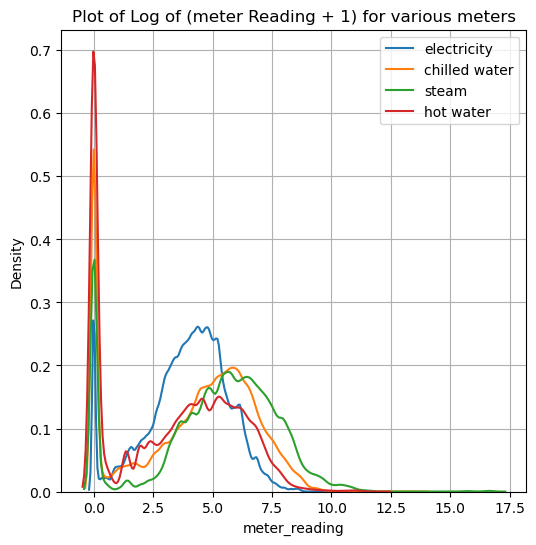

In [22]:
plt.figure(figsize= (6,6))
meters = sorted(train_data['meter'].unique())
for i in meters:
    data_pts = train_data.query(f'meter=={i}')
    sns.kdeplot(np.log1p(data_pts['meter_reading']),label=i)
    plt.xlabel("meter_reading")
    plt.ylabel("Density")
    plt.legend(['electricity', 'chilled water', 'steam', 'hot water'])
    plt.title("Plot of Log of (meter Reading + 1) for various meters")
plt.grid()

- We see that many values are at zero.
- Also it can be seen that after transforming data to log scale, the variance is appropriate.
- We can now better visualize the data. So, we convert the train_data['meter_reading] to a lower value through log transformation

In [21]:
train_data['meter_reading'].describe()

count    2.021610e+07
mean     1.988706e+03
std      1.532159e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.877500e+01
75%      2.679840e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

In [22]:
train_data['meter_reading'] = np.log1p(train_data['meter_reading'])
train_data['meter_reading'].describe()

count    2.021610e+07
mean     4.208398e+00
std      2.074255e+00
min      0.000000e+00
25%      2.960105e+00
50%      4.379210e+00
75%      5.594652e+00
max      1.690221e+01
Name: meter_reading, dtype: float64

### 2.1.2 Count plot of meters

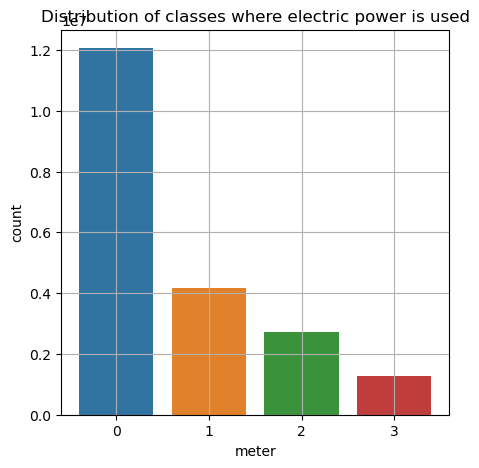

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(x='meter',data=train_data)
plt.xlabel('meter')
plt.ylabel('count')
plt.title('Distribution of classes where electric power is used')
plt.plot()
plt.grid()
plt.show()

- 0:"electricity", 1:"chilledwater", 2:"steam", 3:"hotwater"
- We see that the maximum usage is for 'electricity' backed by 'chilledwater' and 'steam'. The minimum usage is for 'hotwater'

#### Convert numerical value 'meter' to categorical to get better insight of the classes where elctric power is used

In [23]:
# convert numerical variable to categorical variable as directed in the overview
train_data['meter'].replace({0:'electricity',1:'chilledwater',2:'steam',3:'hotwater'},inplace=True)
train_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,electricity,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,electricity,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,electricity,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,electricity,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,electricity,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


In [13]:
# convert numerical variable to categorical variable as directed in the overview
test_data['meter'].replace({0:'electricity',1:'chilledwater',2:'steam',3:'hotwater'},inplace=True)
test_data.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,electricity,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,1,1,electricity,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
2,2,2,electricity,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
3,3,3,electricity,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
4,4,4,electricity,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609


### 2.1.3 Depicting the count plot of primary_use of electric power

Number of buildings used for  Education  is-  549
Number of buildings used for  Entertainment/public assembly  is-  184
Number of buildings used for  Food sales and service  is-  5
Number of buildings used for  Healthcare  is-  23
Number of buildings used for  Lodging/residential  is-  147
Number of buildings used for  Manufacturing/industrial  is-  12
Number of buildings used for  Office  is-  279
Number of buildings used for  Other  is-  25
Number of buildings used for  Parking  is-  22
Number of buildings used for  Public services  is-  156
Number of buildings used for  Religious worship  is-  3
Number of buildings used for  Retail  is-  11
Number of buildings used for  Services  is-  10
Number of buildings used for  Technology/science  is-  6
Number of buildings used for  Utility  is-  4
Number of buildings used for  Warehouse/storage  is-  13


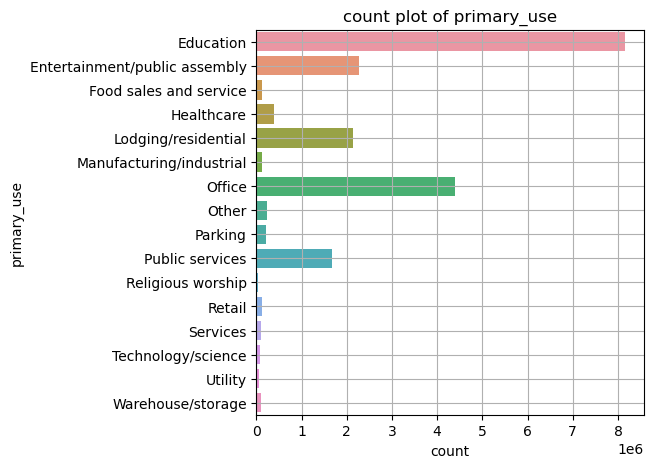

In [28]:
data_uses = train_data.groupby('primary_use')['building_id'].nunique()
indices = data_uses.index
for i in range(len(indices)):
    print('Number of buildings used for ',indices[i],' is- ',data_uses[i])

plt.figure(figsize=(5,5))
sns.countplot(y='primary_use',data=train_data)
plt.xlabel('count')
plt.ylabel('primary_use')
plt.title('count plot of primary_use')
plt.yticks(rotation=0)
plt.grid()
plt.show()

- We see that the maximum primary_use is for 'Education', 'Office', 'Entertainment/Public assembly' and 'Public Services' sections

### 2.1.4 air_temperature distribution

[]

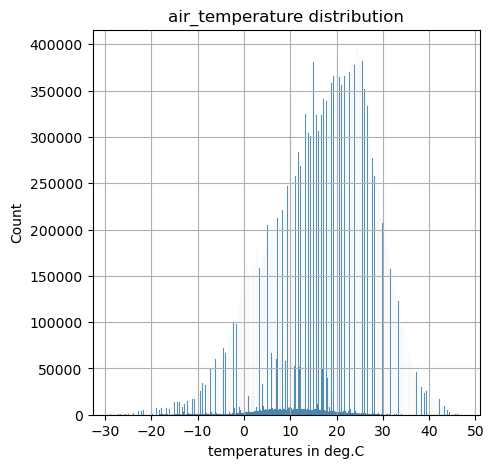

In [29]:
plt.figure(figsize=(5,5))
sns.histplot(train_data['air_temperature'])
plt.xlabel('temperatures in deg.C')
plt.ylabel('Count')
plt.title('air_temperature distribution')
plt.grid()
plt.plot()

- We see that air_temperature follows normal/gaussian distribution with the maximum number of values ranging between 0-30 Deg. Celcius

### 2.1.5 dew_temperature distribution

<Figure size 500x500 with 0 Axes>

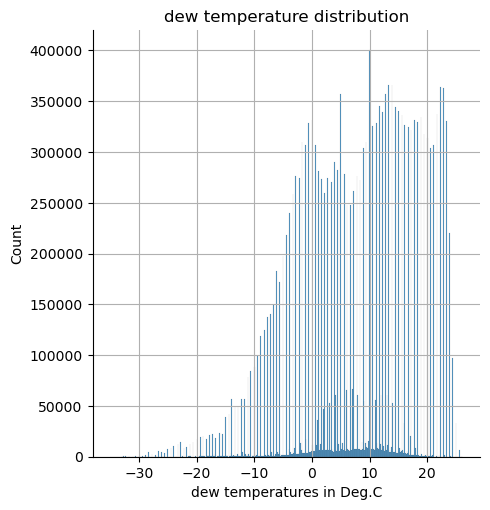

In [30]:
plt.figure(figsize=(5,5))
sns.displot(train_data['dew_temperature'].dropna())
plt.xlabel('dew temperatures in Deg.C')
plt.ylabel('Count')
plt.title('dew temperature distribution')
plt.grid()
plt.show()

- The distribution is somewhat right skewed.
- Maximum values lie between -5 to almost 20 Deg.C

### 2.1.6 cloud_coverage distribution

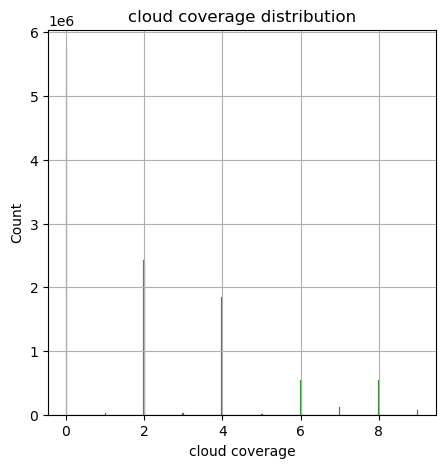

In [31]:
plt.figure(figsize=(5,5))
sns.histplot(train_data['cloud_coverage'],color='green')
plt.xlabel('cloud coverage')
plt.ylabel('Count')
plt.title('cloud coverage distribution')
plt.grid()
plt.show()

#### As can be seen above, the plot is not showing clearly when I used histplot or displot in replacement of distplot. Plotting again using violinplot

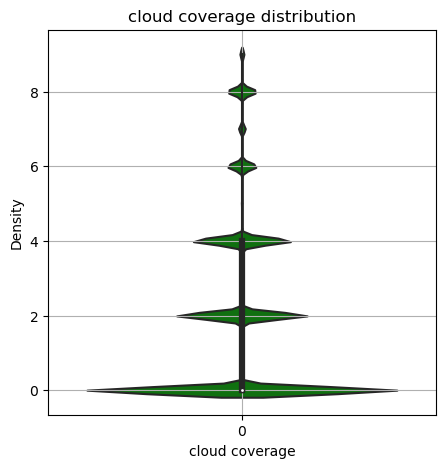

In [32]:
# plot was not showing when I used histplot or displot in replacement of distplot

plt.figure(figsize=(5,5))
sns.violinplot(train_data['cloud_coverage'],color='green')
plt.xlabel('cloud coverage')
plt.ylabel('Density')
plt.title('cloud coverage distribution')
plt.grid()
plt.show()

- It can be seen that a lot of values of cloud_coverage are at 0 value.
- This might be due to high number of missing values.
- These will have to be imputed for better clarity of the data.

### 2.1.7 Distribution plot of precip_depth_1_hr 

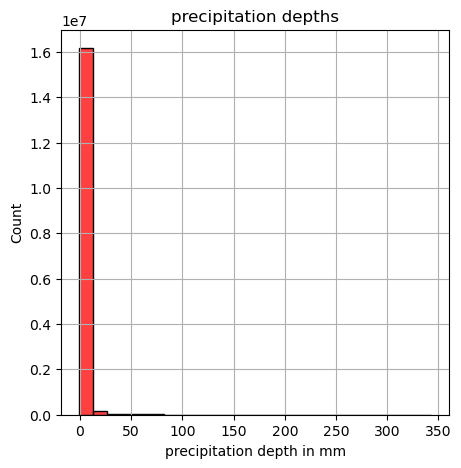

In [33]:
plt.figure(figsize=(5,5))
sns.histplot(train_data['precip_depth_1_hr'],color='red')
plt.xlabel('precipitation depth in mm')
plt.ylabel('Count')
plt.title('precipitation depths')
plt.grid()
plt.show()

- We see that lots of points of precip_depth_1_hr are at 0 value.
- This may be due to many missing values that now need to be imputed for better understanding of the data.

### 2.1.8 Distribution of sea_level_pressure

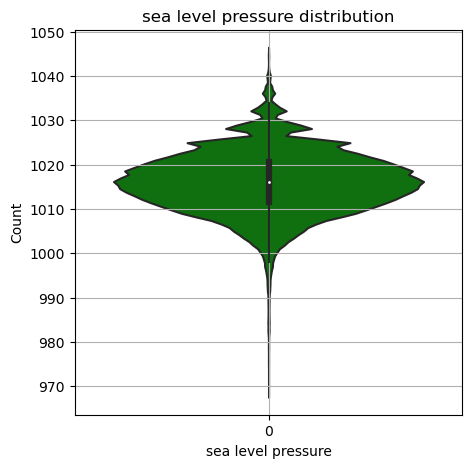

In [34]:
plt.figure(figsize=(5,5))
sns.violinplot(train_data['sea_level_pressure'],color='green')
plt.xlabel('sea level pressure')
plt.ylabel('Count')
plt.title('sea level pressure distribution')
plt.grid()
plt.show()

- It can be seen that the distribution follows gaussian/normal curve.
- Also, we see that the majority of values lie between 1010 to 1020.

### 2.1.9 Distribution of floor_count

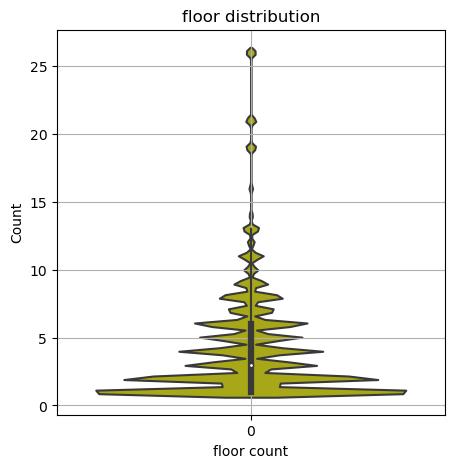

In [35]:
plt.figure(figsize=(5,5))
sns.violinplot(train_data['floor_count'],color='y')
plt.xlabel('floor count')
plt.ylabel('Count')
plt.title('floor distribution')
plt.grid()
plt.show()

- We see that there are many buildings with number of floors <= 5.
- Only few buildings have number of floors > 5.

### 2.1.10 Distribution of year in which Buildings are built

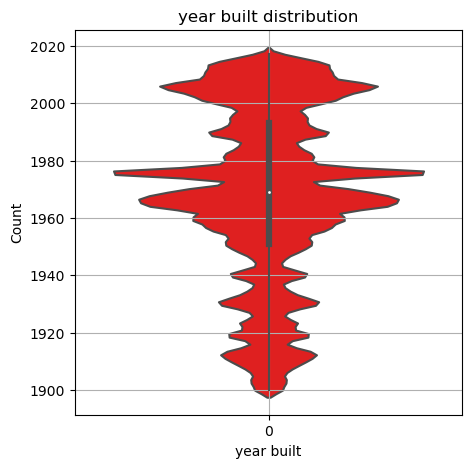

In [36]:
plt.figure(figsize=(5,5))
sns.violinplot(train_data['year_built'].dropna(),color='r')
plt.xlabel('year built')
plt.ylabel('Count')
plt.title('year built distribution')
plt.grid()
plt.show()

- We see that many buildings were constructed in 1975, from subplot-122.
- Overall, high number of buildings were constructed between years 1960 and 1980.
- Also many buildings came into existence in this span of 120 years, from 1900 to 2020.

### 2.1.11 Distribution Plot of square_feet

<Figure size 500x500 with 0 Axes>

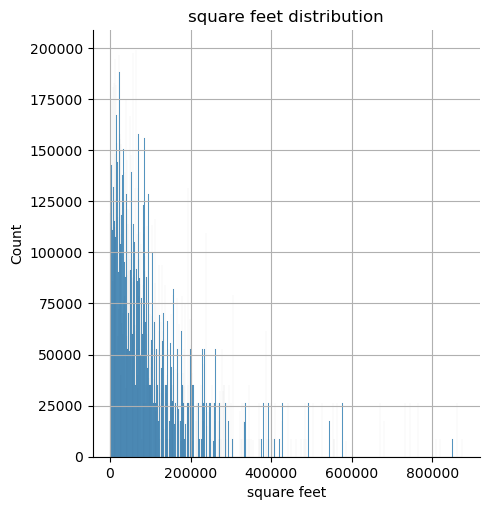

In [37]:
plt.figure(figsize=(5,5))
sns.displot(train_data['square_feet'])
plt.xlabel('square feet')
plt.ylabel('Count')
plt.title('square feet distribution')
plt.grid()
plt.show()

- The above plot is right skewed with many values.
- We apply log transformation for better understanding of the data.

In [25]:
train_data['square_feet'].describe()

count    2.021610e+07
mean     1.077830e+05
std      1.171424e+05
min      2.830000e+02
25%      3.252700e+04
50%      7.270900e+04
75%      1.391130e+05
max      8.750000e+05
Name: square_feet, dtype: float64

- We observe that values of train_data['square_feet'] are very high.
- So, we convert this parameter to a lower value using logarithm and plot accordingly.

#### Converting using log1p that calculates log(1+x) instead of log(x) because log10() gave us -inf values.

In [26]:
train_data['square_feet'] = np.log1p(train_data['square_feet'])
train_data['square_feet'].describe()

count    2.021610e+07
mean     1.103946e+01
std      1.180439e+00
min      5.648974e+00
25%      1.038986e+01
50%      1.119423e+01
75%      1.184305e+01
max      1.368198e+01
Name: square_feet, dtype: float64

### 2.1.12 Logarithmic Distribution of square_feet

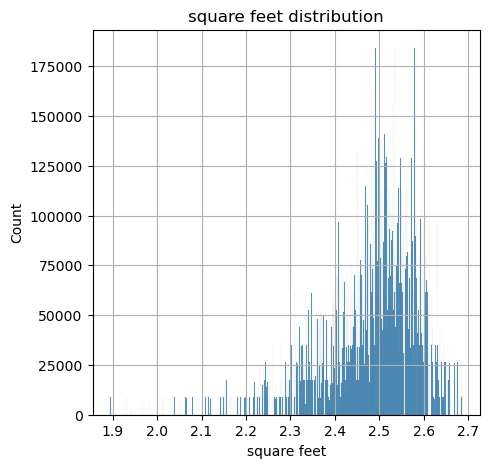

In [40]:
plt.figure(figsize=(5,5))
sns.histplot(np.log1p(train_data['square_feet']))
plt.xlabel('square feet')
plt.ylabel('Count')
plt.title('square feet distribution')
plt.grid()
plt.show()

- The above distribution is of 'square_feet' after log-transformation and is similar to Normal Distribution.
- It is not very skewed towards one side.

In [14]:
test_data['square_feet'].describe()

count    4.169760e+07
mean     1.069469e+05
std      1.160888e+05
min      2.830000e+02
25%      3.224350e+04
50%      7.226250e+04
75%      1.383875e+05
max      8.750000e+05
Name: square_feet, dtype: float64

In [15]:
test_data['square_feet'] = np.log1p(test_data['square_feet'])
test_data['square_feet'].describe()

count    4.169760e+07
mean     1.103244e+01
std      1.181943e+00
min      5.648974e+00
25%      1.038110e+01
50%      1.118807e+01
75%      1.183782e+01
max      1.368198e+01
Name: square_feet, dtype: float64

## 2.2 Comparing Parameters Graphically

### 2.2.1 meter vs meter_reading across meter classes

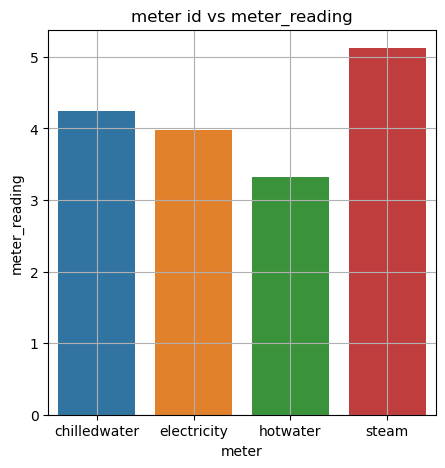

In [43]:
plt.figure(figsize=(5,5))
meter_data = train_data.groupby('meter').meter_reading.mean().reset_index()
sns.barplot(x='meter',y='meter_reading',data=meter_data)
plt.xlabel('meter')
plt.ylabel('meter_reading')
plt.title('meter id vs meter_reading')
plt.grid()
plt.show()

- The meter_reading is highest for steam and lowest for hotwater

### 2.2.2 air_temperature vs meter_readings

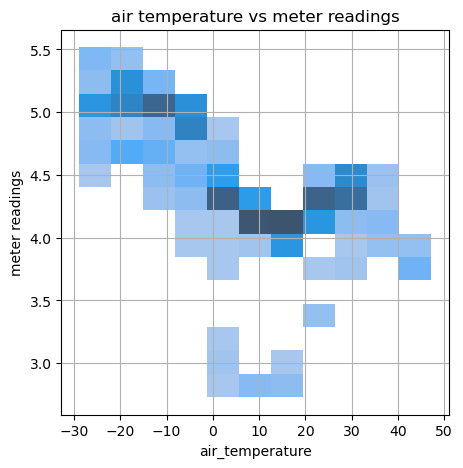

In [44]:
plt.figure(figsize=(5,5))
temperature_data = train_data.groupby('air_temperature').meter_reading.mean().reset_index()
sns.histplot(x=temperature_data['air_temperature'],y=temperature_data['meter_reading'])
plt.xlabel('air_temperature')
plt.ylabel('meter readings')
plt.title('air temperature vs meter readings')
plt.grid()
plt.show()

- It can be seen that high power is used when temperatures are less than 0 Deg.C.
- Also, considerably low power is used when these temperatures are more than 0 Deg.C

### 2.2.3 air_temperature vs site_id

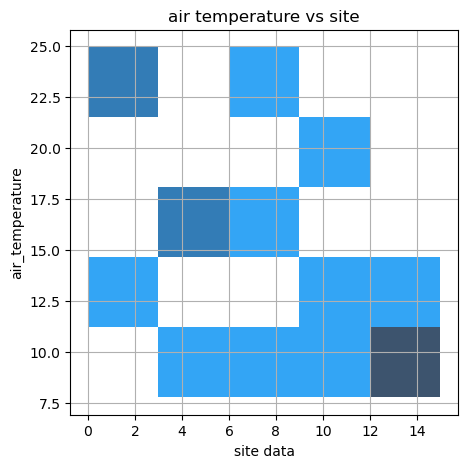

In [45]:
plt.figure(figsize=(5,5))
site_data = train_data.groupby('site_id').air_temperature.mean().reset_index()
sns.histplot(x=site_data['site_id'],y=site_data['air_temperature'])
plt.xlabel('site data')
plt.ylabel('air_temperature')
plt.title('air temperature vs site')
plt.grid()
plt.show()

- From this plot we can infer that there is high variation in air temperatures and that there are sites that have high air temperatures, ex.- site 2 and site 8 have high air temperatures.
- Also, sites 13,14 have considerably lower temperatures.

### 2.2.4 floor_count vs meter_reading

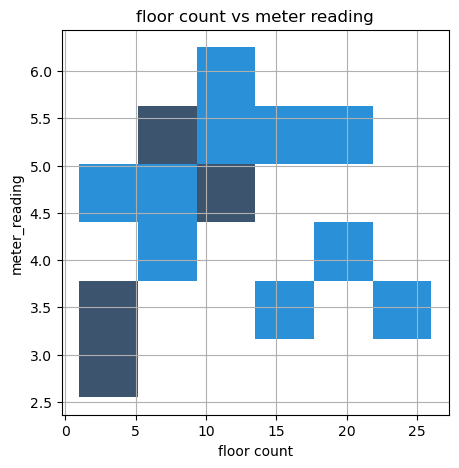

In [46]:
plt.figure(figsize=(5,5))
floor_data = train_data.groupby('floor_count').meter_reading.mean().reset_index()
plots = sns.histplot(x=floor_data['floor_count'],y=floor_data['meter_reading'])
plt.xlabel('floor count')
plt.ylabel('meter_reading')
plt.title('floor count vs meter reading')
plt.grid()
plt.show()

- We see that buildings with number of floors between 1 to 10 use high power.
- Also the gap in graph just after number of floors = 20 suggests that maybe not all floors use power at the same time or we might need more information on this.
- We also see that buildings with number of floors ranging from 15 to 20 consume high power.

### 2.2.5 Plot of year in which Buildings are built vs meter_reading

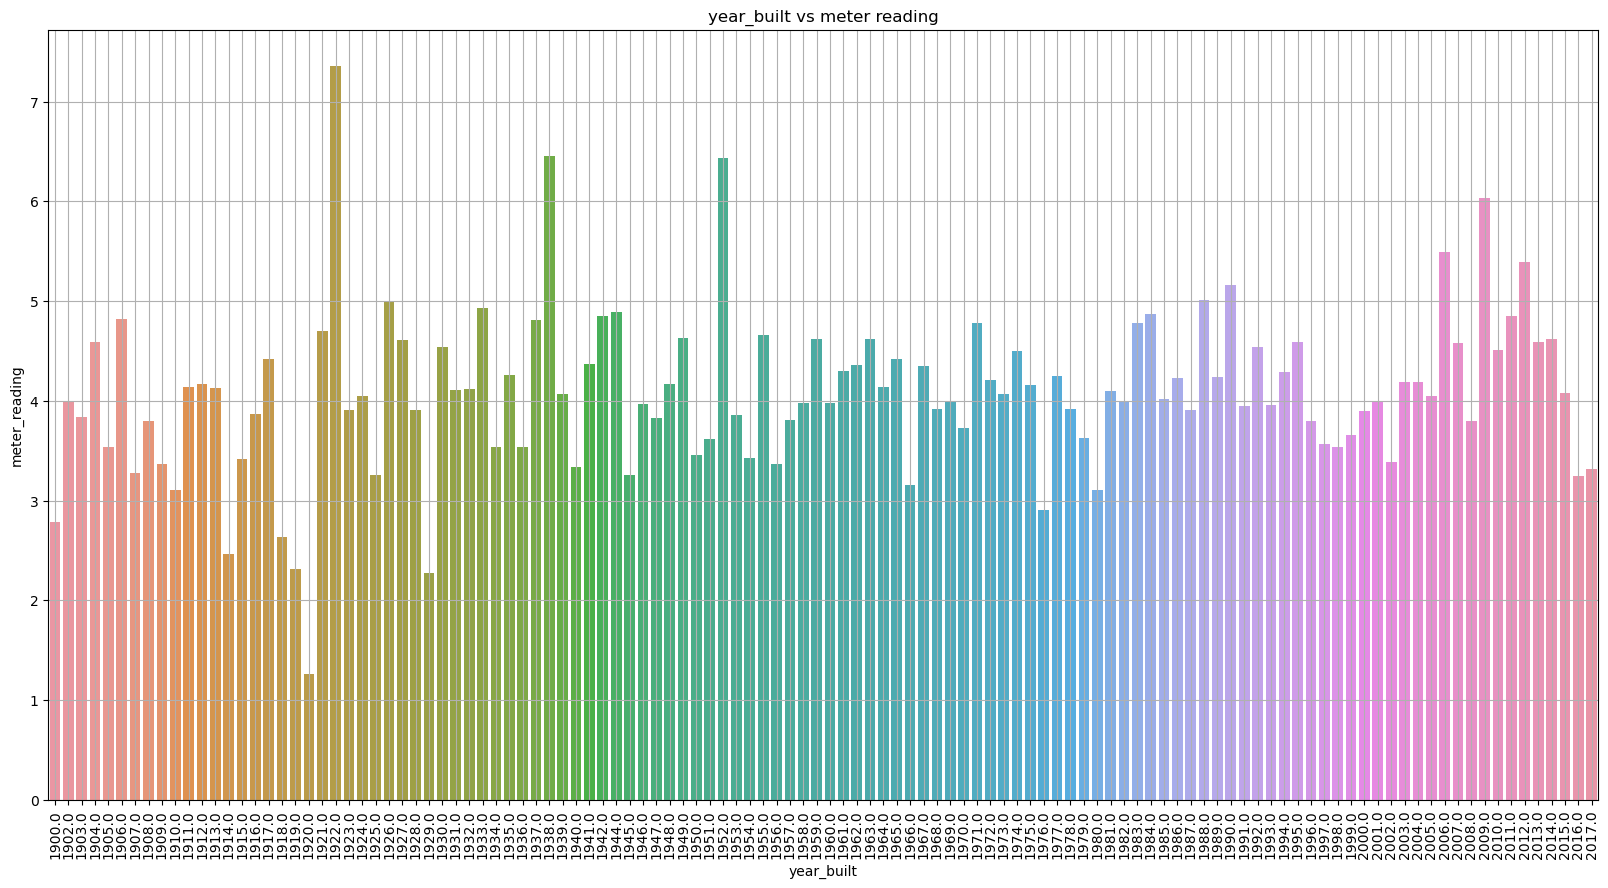

In [47]:
plt.figure(figsize=(20,10))
year_data = train_data.groupby('year_built').meter_reading.mean().reset_index()
sns.barplot(x=year_data['year_built'],y=year_data['meter_reading'])
plt.xlabel('year_built')
plt.ylabel('meter_reading')
plt.title('year_built vs meter reading')
plt.xticks(rotation=90)
plt.grid()
plt.show()

- Here, high power consumptions are observed in years 1922,1938,1952 and 2009.

### 2.2.6 Plot of square feet vs meter reading

<AxesSubplot:xlabel='square_feet', ylabel='meter_reading'>

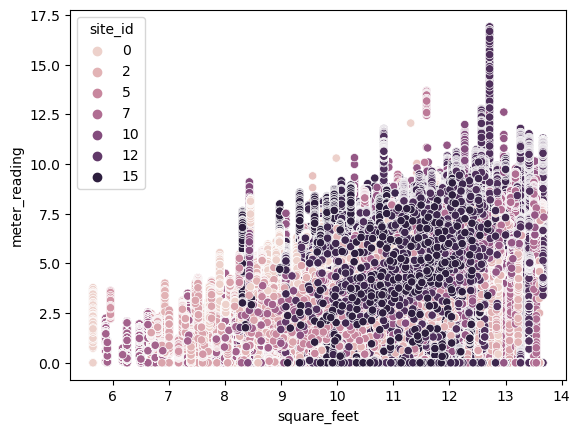

In [45]:
sns.scatterplot(x='square_feet',y='meter_reading',data=train_data,hue='site_id')

- We see that as the area of buildings, area-square_feet increases, the power consumption also increases with it.
- A relation can be well seen from above plot.
- We see that there is a point which consumes very high power.
- This could be an outlier point.
- We'll remove it in further steps

- We observe a relational plot after transformation of the train_data['square_feet'] parameter.
- By transformation we've lowered the impact of an outlier point.
- We'll find the outlier point in upcoming steps.

### 2.2.7 Plot of site_id vs meter_reading

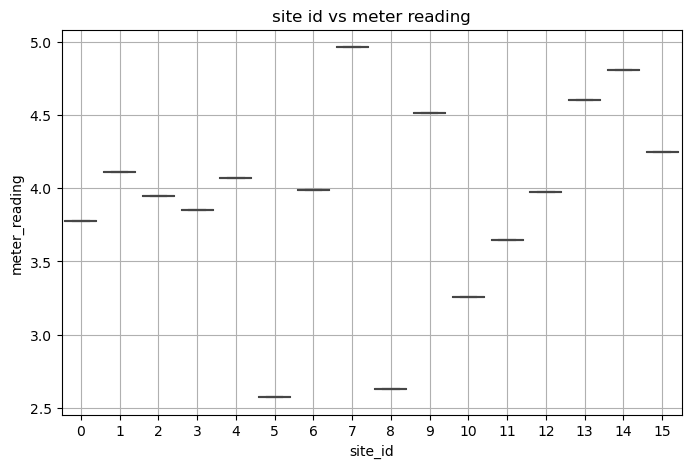

In [48]:
plt.figure(figsize=(8,5))
site_data = train_data.groupby(['site_id']).meter_reading.mean().reset_index()
sns.boxplot(x=site_data['site_id'],y=site_data['meter_reading'])
plt.xlabel('site_id')
plt.ylabel('meter_reading')
plt.title('site id vs meter reading')
plt.grid()
plt.show()

- The above plot shows that site 7,14 and 13 uses very high power compared to the rest.
- And site 5 consumes lowest power.
- Almost all the sites consume power with meter_reading <= 4.5 as seen from above plot.

### 2.2.8 Scatter plot of building_id vs meter_reading

<AxesSubplot:xlabel='building_id', ylabel='meter_reading'>

/home/nukul/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/nukul/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


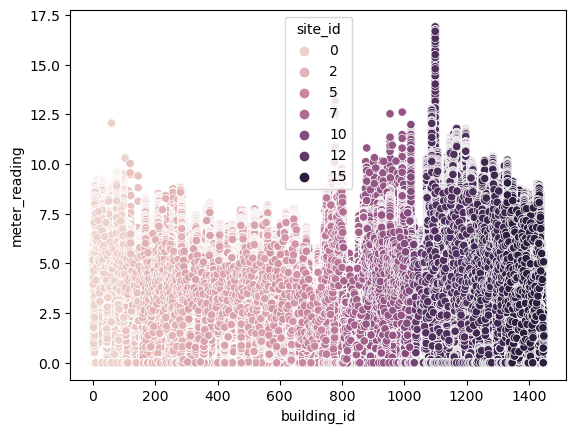

In [47]:
sns.scatterplot(x='building_id',y='meter_reading',data=train_data,hue='site_id')

- There is a variation of consumption of power across all the buildings.
- We can see that there is 1 point which has a very high value of meter_reading.
- It can be considered as an outlier point.
- We'll first check it.

In [16]:
print('maximum value of meter_reading is observed at point-\n')
print(train_data[train_data.meter_reading == train_data.meter_reading.max()])

maximum value of meter_reading is observed at point-

         building_id  meter            timestamp  meter_reading  site_id  \
8907488         1099      2  2016-06-13 09:00:00     21904700.0       13   

        primary_use  square_feet  year_built  floor_count  air_temperature  \
8907488   Education    12.715552         NaN          NaN         19.40625   

         cloud_coverage  dew_temperature  precip_depth_1_hr  \
8907488             NaN        17.203125                0.0   

         sea_level_pressure  wind_direction  wind_speed  
8907488              1014.5            50.0    6.199219  


In [17]:
train_data['meter_reading'].mean()

1988.7061767578125

In [18]:
train_data['meter_reading'].max()
# train_data['meter_reading'].tail()

21904700.0

#### From above data- we see that data point with row number- 8907488 and building_id = 1099 consumes very high power. We now see its details- 

In [19]:
train_data.iloc[8907488]

building_id                          1099
meter                                   2
timestamp             2016-06-13 09:00:00
meter_reading                  21904700.0
site_id                                13
primary_use                     Education
square_feet                     12.715552
year_built                            NaN
floor_count                           NaN
air_temperature                  19.40625
cloud_coverage                        NaN
dew_temperature                 17.203125
precip_depth_1_hr                     0.0
sea_level_pressure                 1014.5
wind_direction                       50.0
wind_speed                       6.199219
Name: 8907488, dtype: object

- Seeing from the above plot and data, many buildings use less power, but the datapoint with building_id 1099 consumes very high power.
- It can be considered as an outlier point.
- So we'll remove it in further steps.

### 2.2.8 Correlation Matrix

Text(0.5, 1.0, 'correlation matrix')

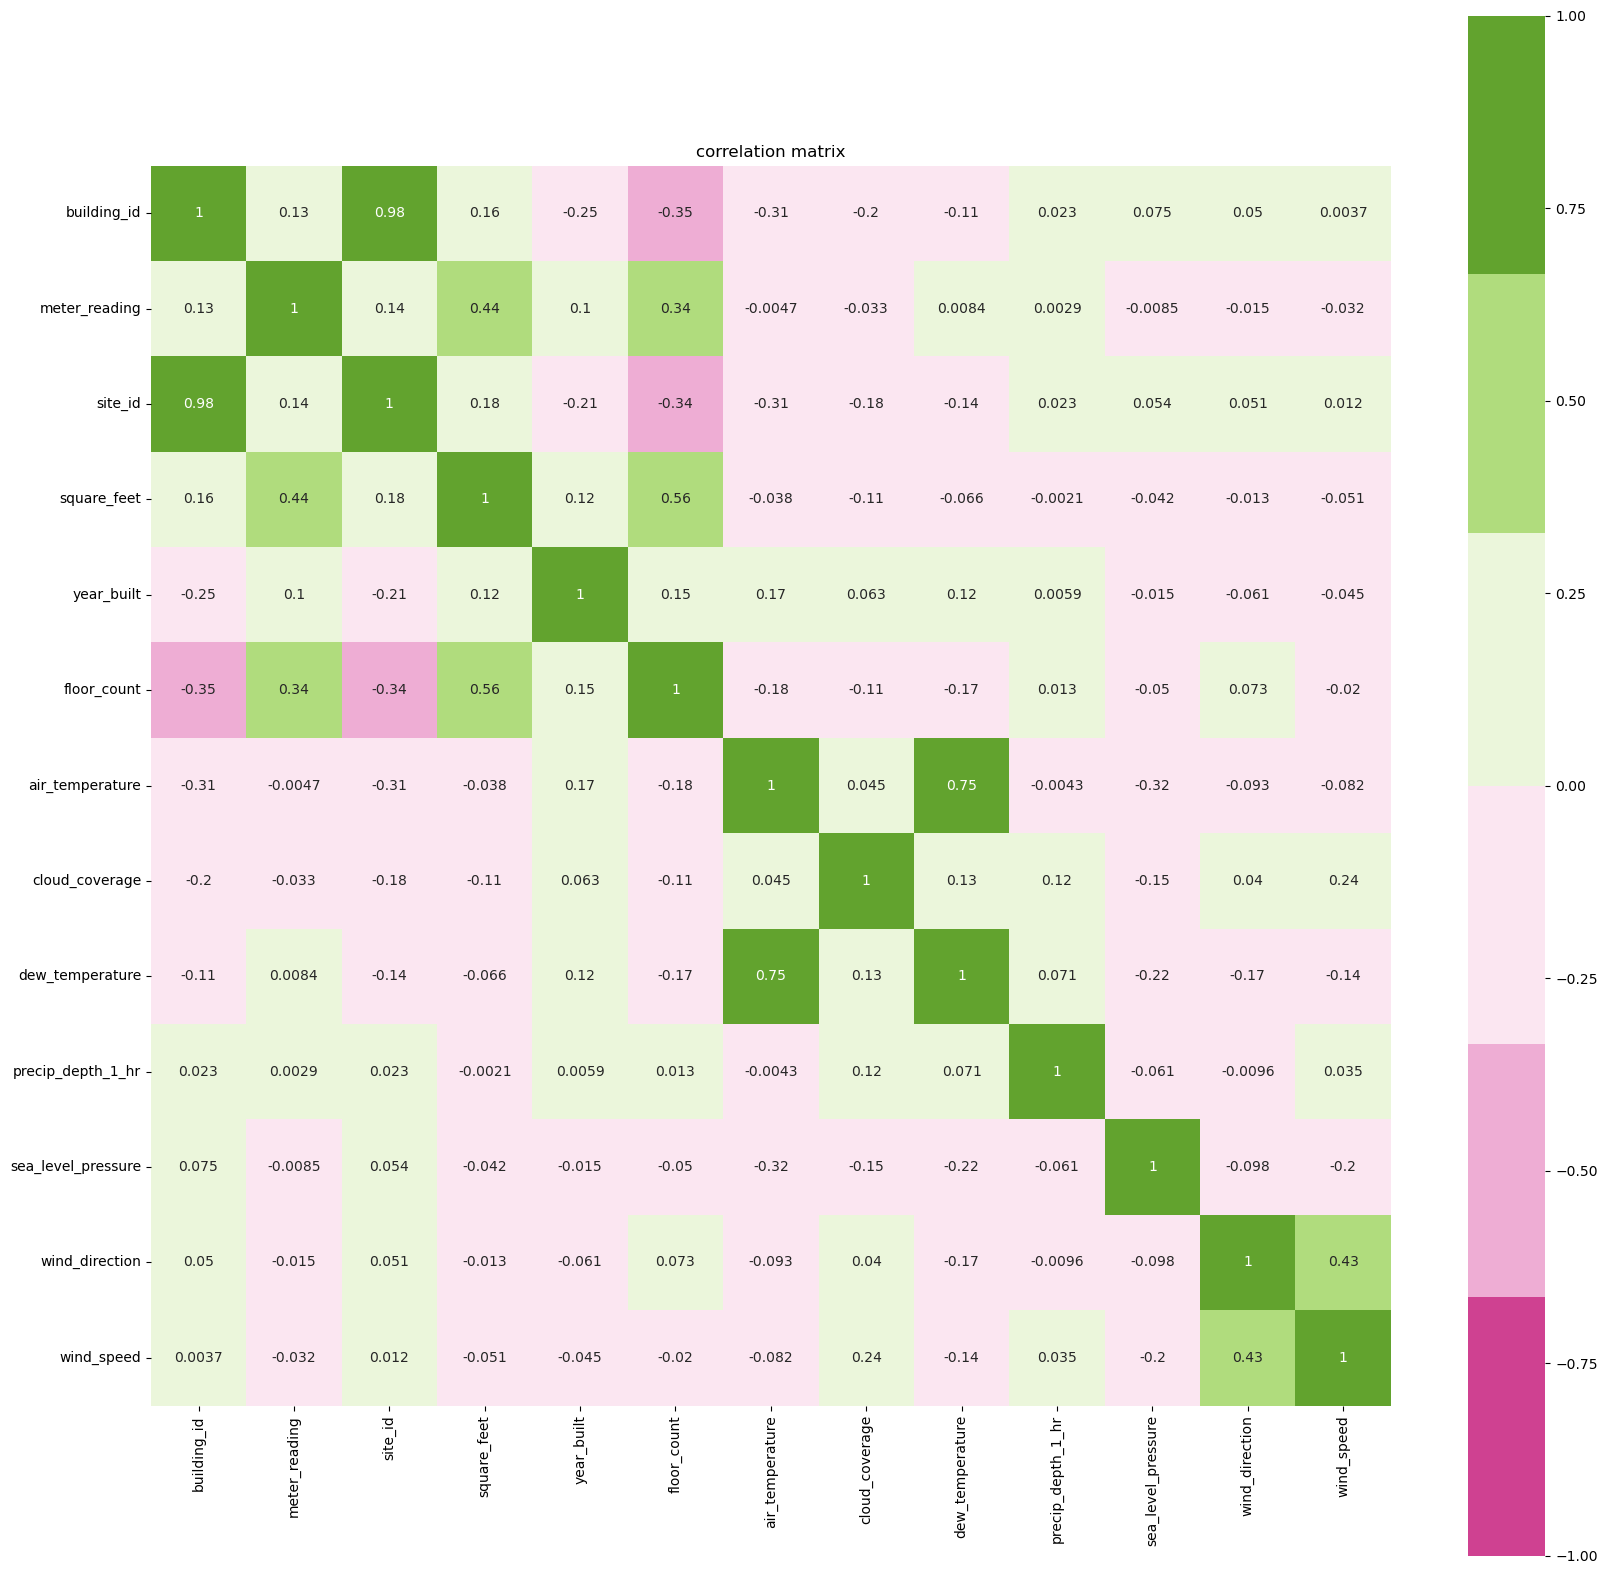

In [53]:
plt.figure(figsize=(20,20))
colormap = sns.color_palette("PiYG")
sns.heatmap(train_data.corr(),annot=True,vmin=-1,vmax=1,center=0,square=True,cmap = colormap)
plt.title('correlation matrix')

- The above is the plot of all available features.
- There is a high correlation between 
    - dew_temperature & air_temperature - 0.75
    - square_feet & floor_count - 0.56
    - site_id & building_id - 0.98
- Rest of the features have a correlation less than 0.50.
- The size of the building determines power consumption, which we see from above plot where the correlation between square_feet & floor_count is 0.56.
- Temperatures also affect power consumption which can be seen from above plot.

## 3. Feature Engineering

### 3.1 Removing Outlier point(s)

#### As seen from above plots (plot 2.2.8) there is an outlier point. So we remove that point.

In [20]:
drop_point = list(train_data[train_data['building_id']==1099].index)
drop_point

[1533,
 1534,
 3829,
 3830,
 6125,
 6126,
 8424,
 8425,
 10719,
 10720,
 13014,
 13015,
 15308,
 15309,
 17600,
 17601,
 19895,
 19896,
 22190,
 22191,
 24487,
 24488,
 26786,
 26787,
 29082,
 29083,
 31380,
 31381,
 33677,
 33678,
 35977,
 35978,
 38274,
 38275,
 40574,
 40575,
 42872,
 42873,
 45168,
 45169,
 47466,
 47467,
 49762,
 49763,
 52058,
 52059,
 54355,
 54356,
 56654,
 56655,
 58950,
 58951,
 61247,
 61248,
 63544,
 63545,
 65842,
 65843,
 68137,
 68138,
 70435,
 70436,
 72730,
 72731,
 75027,
 75028,
 77324,
 77325,
 79622,
 79623,
 81920,
 81921,
 84219,
 84220,
 86517,
 86518,
 88817,
 88818,
 91117,
 91118,
 93416,
 93417,
 95716,
 95717,
 98015,
 98016,
 100315,
 100316,
 102614,
 102615,
 104915,
 104916,
 107215,
 107216,
 109515,
 109516,
 111815,
 111816,
 114112,
 114113,
 116413,
 116414,
 118713,
 118714,
 121013,
 121014,
 123314,
 123315,
 125614,
 125615,
 127916,
 127917,
 130218,
 130219,
 132519,
 132520,
 134819,
 134820,
 137115,
 137116,
 139415,
 1394

In [21]:
train_data.drop(drop_point,axis=0,inplace=True)

In [22]:
train_data.meter_reading.max()

880374.0

### 3.2 Removing zero points

- As seen previously, many points of meter_reading have zero readings, this could be due to lack of observation or lack of actual readings.
- Therefore, we eliminate any points that don't make sense.

In [23]:
drop_zeros = list(train_data[train_data['meter_reading']==0.0].index)
drop_zeros

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 105,
 109,
 147,
 172,
 174,
 184,
 195,
 198,
 207,
 208,
 231,
 235,
 237,
 294,
 327,
 328,
 337,
 354,
 361,
 363,
 396,
 398,
 406,
 408,
 409,
 432,
 441,
 448,
 815,
 829,
 834,
 894,
 897,
 903,
 905,
 907,
 918,
 922,
 925,
 934,
 936,
 939,
 940,
 943,
 945,
 949,
 956,
 969,
 972,
 975,
 981,
 986,
 987,
 990,
 995,
 999,
 1019,
 1048,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1088,
 1089,
 1090,
 10

In [24]:
train_data.drop(drop_zeros,axis=0,inplace=True)
train_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
45,46,0,2016-01-01 00:00:00,53.239700,0,Retail,9.110078,2016.0,NaN,25.000000,6.0,20.000000,NaN,1019.5,0.0,0.000000
72,74,0,2016-01-01 00:00:00,43.001301,0,Parking,12.867830,1997.0,NaN,25.000000,6.0,20.000000,NaN,1019.5,0.0,0.000000
91,93,0,2016-01-01 00:00:00,52.420601,0,Office,10.415443,1982.0,NaN,25.000000,6.0,20.000000,NaN,1019.5,0.0,0.000000
103,105,0,2016-01-01 00:00:00,23.303600,1,Education,10.832181,NaN,5.0,3.800781,NaN,2.400391,NaN,1021.0,240.0,3.099609
104,106,0,2016-01-01 00:00:00,0.374600,1,Education,8.589514,NaN,4.0,3.800781,NaN,2.400391,NaN,1021.0,240.0,3.099609


### 3.3 Adding New Feature - Timestamp to hour, day, week, month, year

In [16]:
def yeardatetime(data):
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['hour'] = np.uint8(data['timestamp'].dt.hour)
    data['day_of_week'] = np.uint8(data['timestamp'].dt.dayofweek)
    data['month'] = np.uint8(data['timestamp'].dt.month)
    data['day_of_year'] = np.uint16(data['timestamp'].dt.dayofyear)
    data['day'] = np.uint16(data['timestamp'].dt.day)
    data['year']= np.uint16(data['timestamp'].dt.year)
    
    return data

In [26]:
train_data = yeardatetime(train_data)
train_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day_of_week,month,day_of_year,day,year
45,46,0,2016-01-01,53.239700,0,Retail,9.110078,2016.0,NaN,25.000000,...,NaN,1019.5,0.0,0.000000,0,4,1,1,1,2016
72,74,0,2016-01-01,43.001301,0,Parking,12.867830,1997.0,NaN,25.000000,...,NaN,1019.5,0.0,0.000000,0,4,1,1,1,2016
91,93,0,2016-01-01,52.420601,0,Office,10.415443,1982.0,NaN,25.000000,...,NaN,1019.5,0.0,0.000000,0,4,1,1,1,2016
103,105,0,2016-01-01,23.303600,1,Education,10.832181,NaN,5.0,3.800781,...,NaN,1021.0,240.0,3.099609,0,4,1,1,1,2016
104,106,0,2016-01-01,0.374600,1,Education,8.589514,NaN,4.0,3.800781,...,NaN,1021.0,240.0,3.099609,0,4,1,1,1,2016


In [17]:
test_data = yeardatetime(test_data)
test_data.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day_of_week,month,day_of_year,day,year
0,0,0,electricity,2017-01-01,0,Education,8.913685,2008.0,NaN,17.796875,...,NaN,1021.5,100.0,3.599609,0,6,1,1,1,2017
1,1,1,electricity,2017-01-01,0,Education,7.908755,2004.0,NaN,17.796875,...,NaN,1021.5,100.0,3.599609,0,6,1,1,1,2017
2,2,2,electricity,2017-01-01,0,Education,8.589886,1991.0,NaN,17.796875,...,NaN,1021.5,100.0,3.599609,0,6,1,1,1,2017
3,3,3,electricity,2017-01-01,0,Education,10.072639,2002.0,NaN,17.796875,...,NaN,1021.5,100.0,3.599609,0,6,1,1,1,2017
4,4,4,electricity,2017-01-01,0,Education,11.666573,1975.0,NaN,17.796875,...,NaN,1021.5,100.0,3.599609,0,6,1,1,1,2017


### 3.4 Plot of meter_reading vs hour

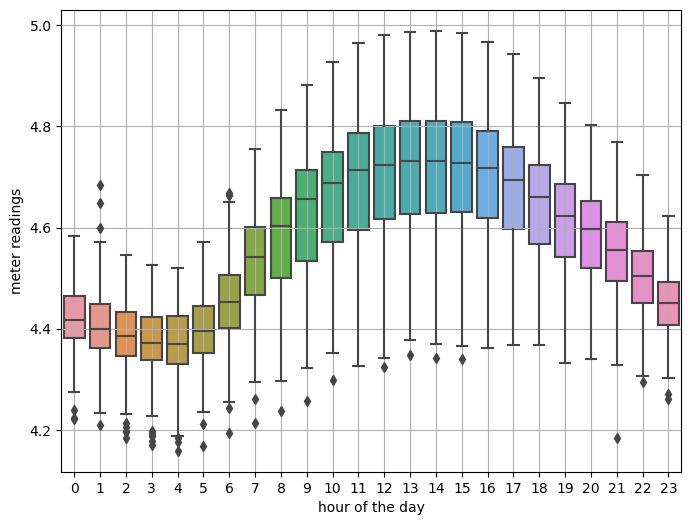

In [62]:
plt.figure(figsize=(8,6))
hours = train_data.groupby(['timestamp','hour']).meter_reading.mean().reset_index()
sns.boxplot(x=hours['hour'],y=hours['meter_reading'])
plt.xlabel('hour of the day')
plt.ylabel('meter readings')
plt.grid()
plt.show()

- We see that the power consumption reduces during the night hours.
- Also, power consumption is high between 7 AM to nearly 8 PM of the day, i.e., power consumption increases in the day-time of the day.
- The consumption is at peak around 1500 hrs (3 pm).
- This can be due to the fact that most/all industries, educational institutes, work/corporate buildings operate during the day-time of the day.

### 3.5 Plot of meter_reading vs day_of_week - Daily Average meter_reading

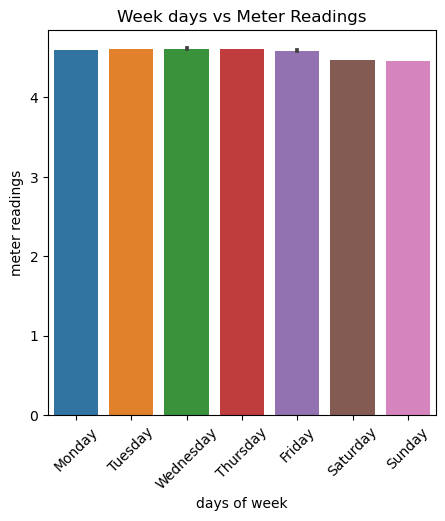

In [63]:
plt.figure(figsize=(5,5))
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plots = sns.barplot(x=train_data['day_of_week'],y=train_data['meter_reading'])
plots.set_xticklabels(days)
plt.title('Week days vs Meter Readings')
plt.xlabel('days of week')
plt.ylabel('meter readings')
plt.xticks(rotation=45)
plt.show()

- A slight decrease in power consumtion can be seen on sunday.
- This might be due to the fact that most/all industries, educational institutes, work/corporate buildings are closed on sunday.

### 3.6 Plot of timestamp-month vs meter_reading - Monthly Average Usage

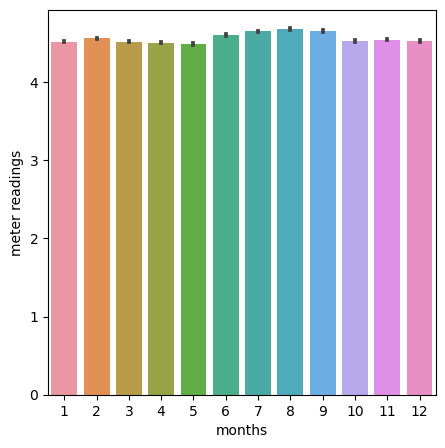

In [64]:
plt.figure(figsize=(5,5))
monthly_data = train_data.groupby(['timestamp','month']).meter_reading.mean().reset_index()
sns.barplot(x=monthly_data['month'],y=monthly_data['meter_reading'])
plt.xlabel('months')
plt.ylabel('meter readings')
plt.show()

- We see that the average monthly power consumption is high in the months of July, August and September.
- The minimum monthly power consumtion is in the 5th month i.e., May.

### 3.7 Plot of power usage- hour vs meter_reading for each primary_use case.

/home/nukul/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


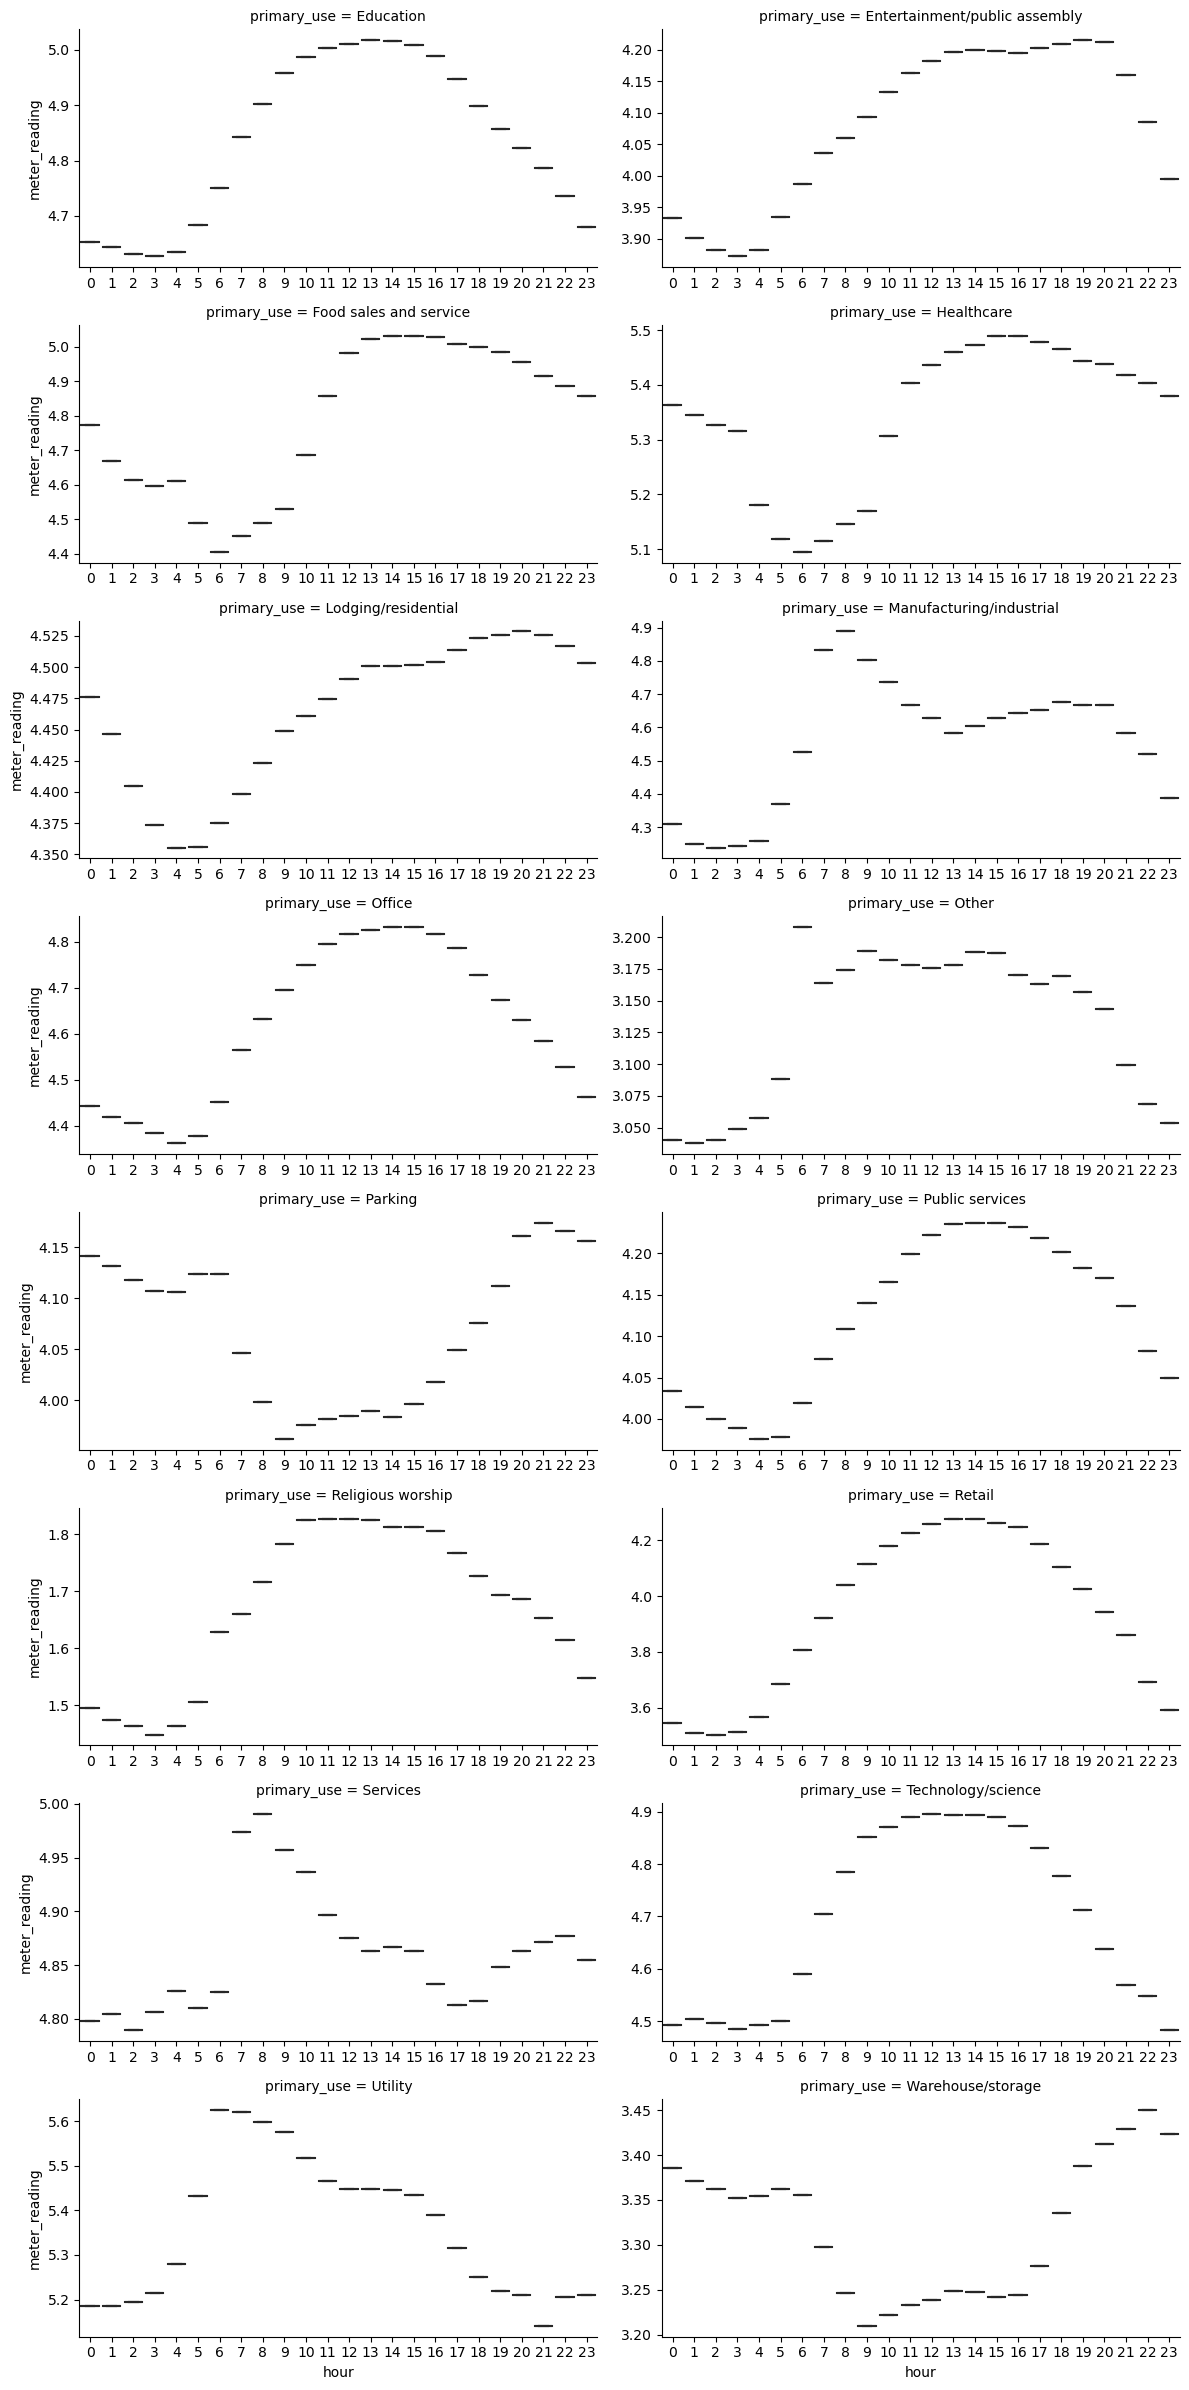

In [65]:
hourly_consumption = train_data.groupby(['hour','primary_use']).meter_reading.mean().reset_index()
plots = sns.FacetGrid(hourly_consumption,col='primary_use',col_wrap=2,height=3,aspect=2,sharex=False,sharey=False)
plots.map(sns.boxplot,'hour','meter_reading',color='g')
plt.show()

- In above we plot the hourly power consumption vs meter_reading per primary_use category.
- Almost all primary_use categories consume high power throughout the day.
- Some primary_use categories consume high power in the night.
- Individual hourly power consumptions can be see from above.

### 3.8 Plot of Daily power usage vs meter_reading for each primary_use case.

/home/nukul/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


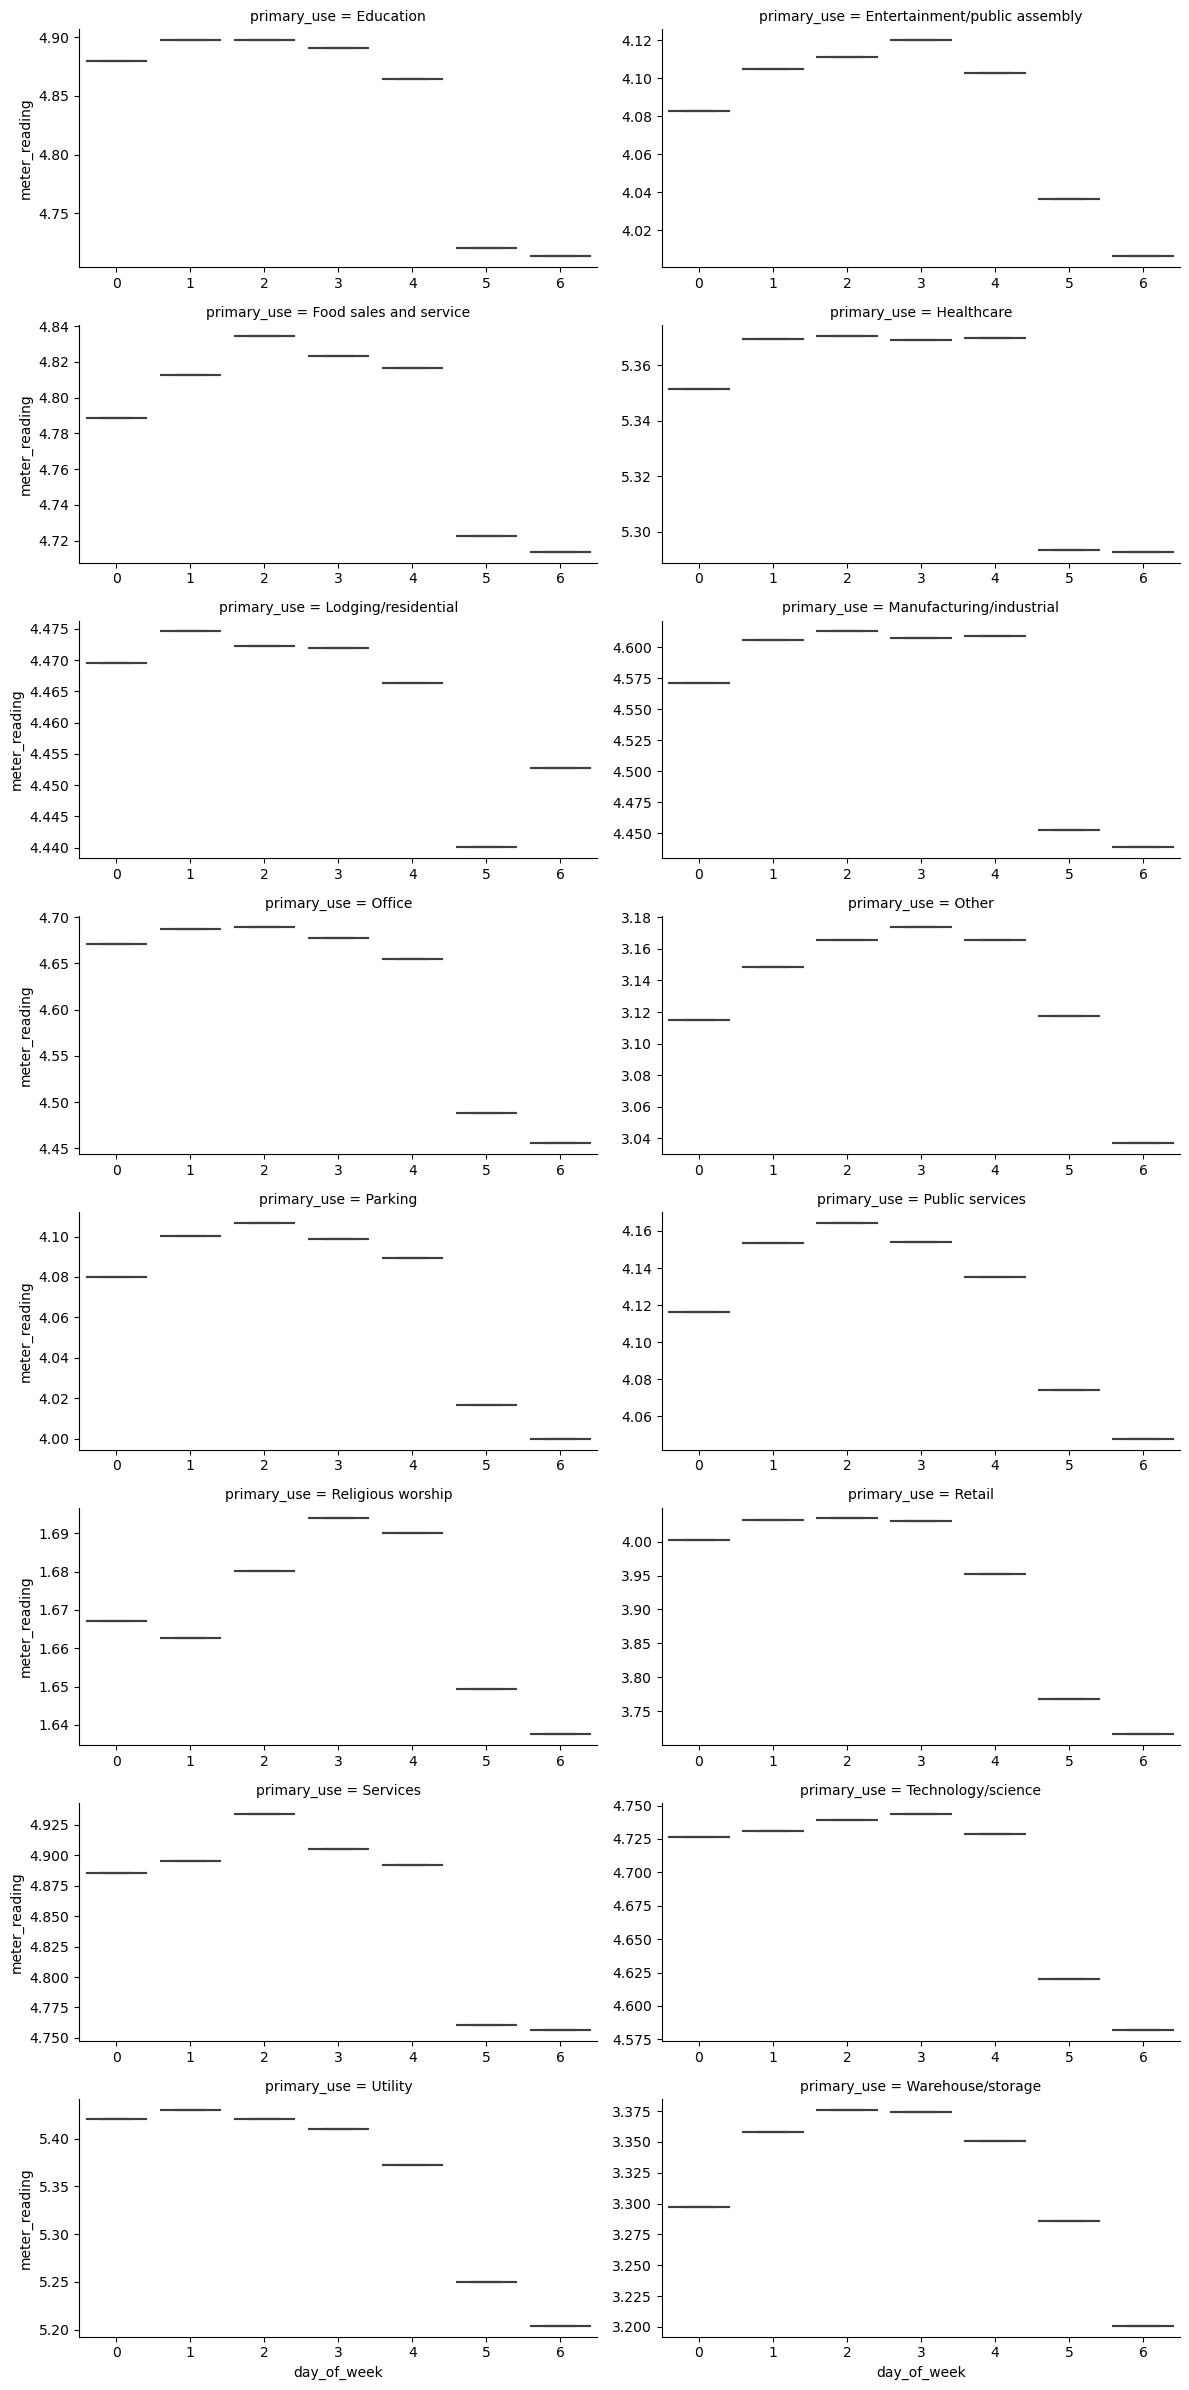

In [66]:
daily_consumption = train_data.groupby(['day_of_week','primary_use']).meter_reading.mean().reset_index()
plots = sns.FacetGrid(daily_consumption,col='primary_use',col_wrap=2,height=3,aspect=2,sharex=False,sharey=False)
plots.map(sns.boxplot,'day_of_week','meter_reading')
plt.show()

- In above we plot the Daily power consumption vs meter_reading per primary_use category.
- We can see that for all categories the power consumption is high in all days except in Saturday and Sunday where the consumption is lowest.
- For 'lodging/residential' primary_use category, the power consumption is high on sunday.

### 3.9 Plot of Monthly power usage vs meter_reading for each primary_use case.

/home/nukul/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


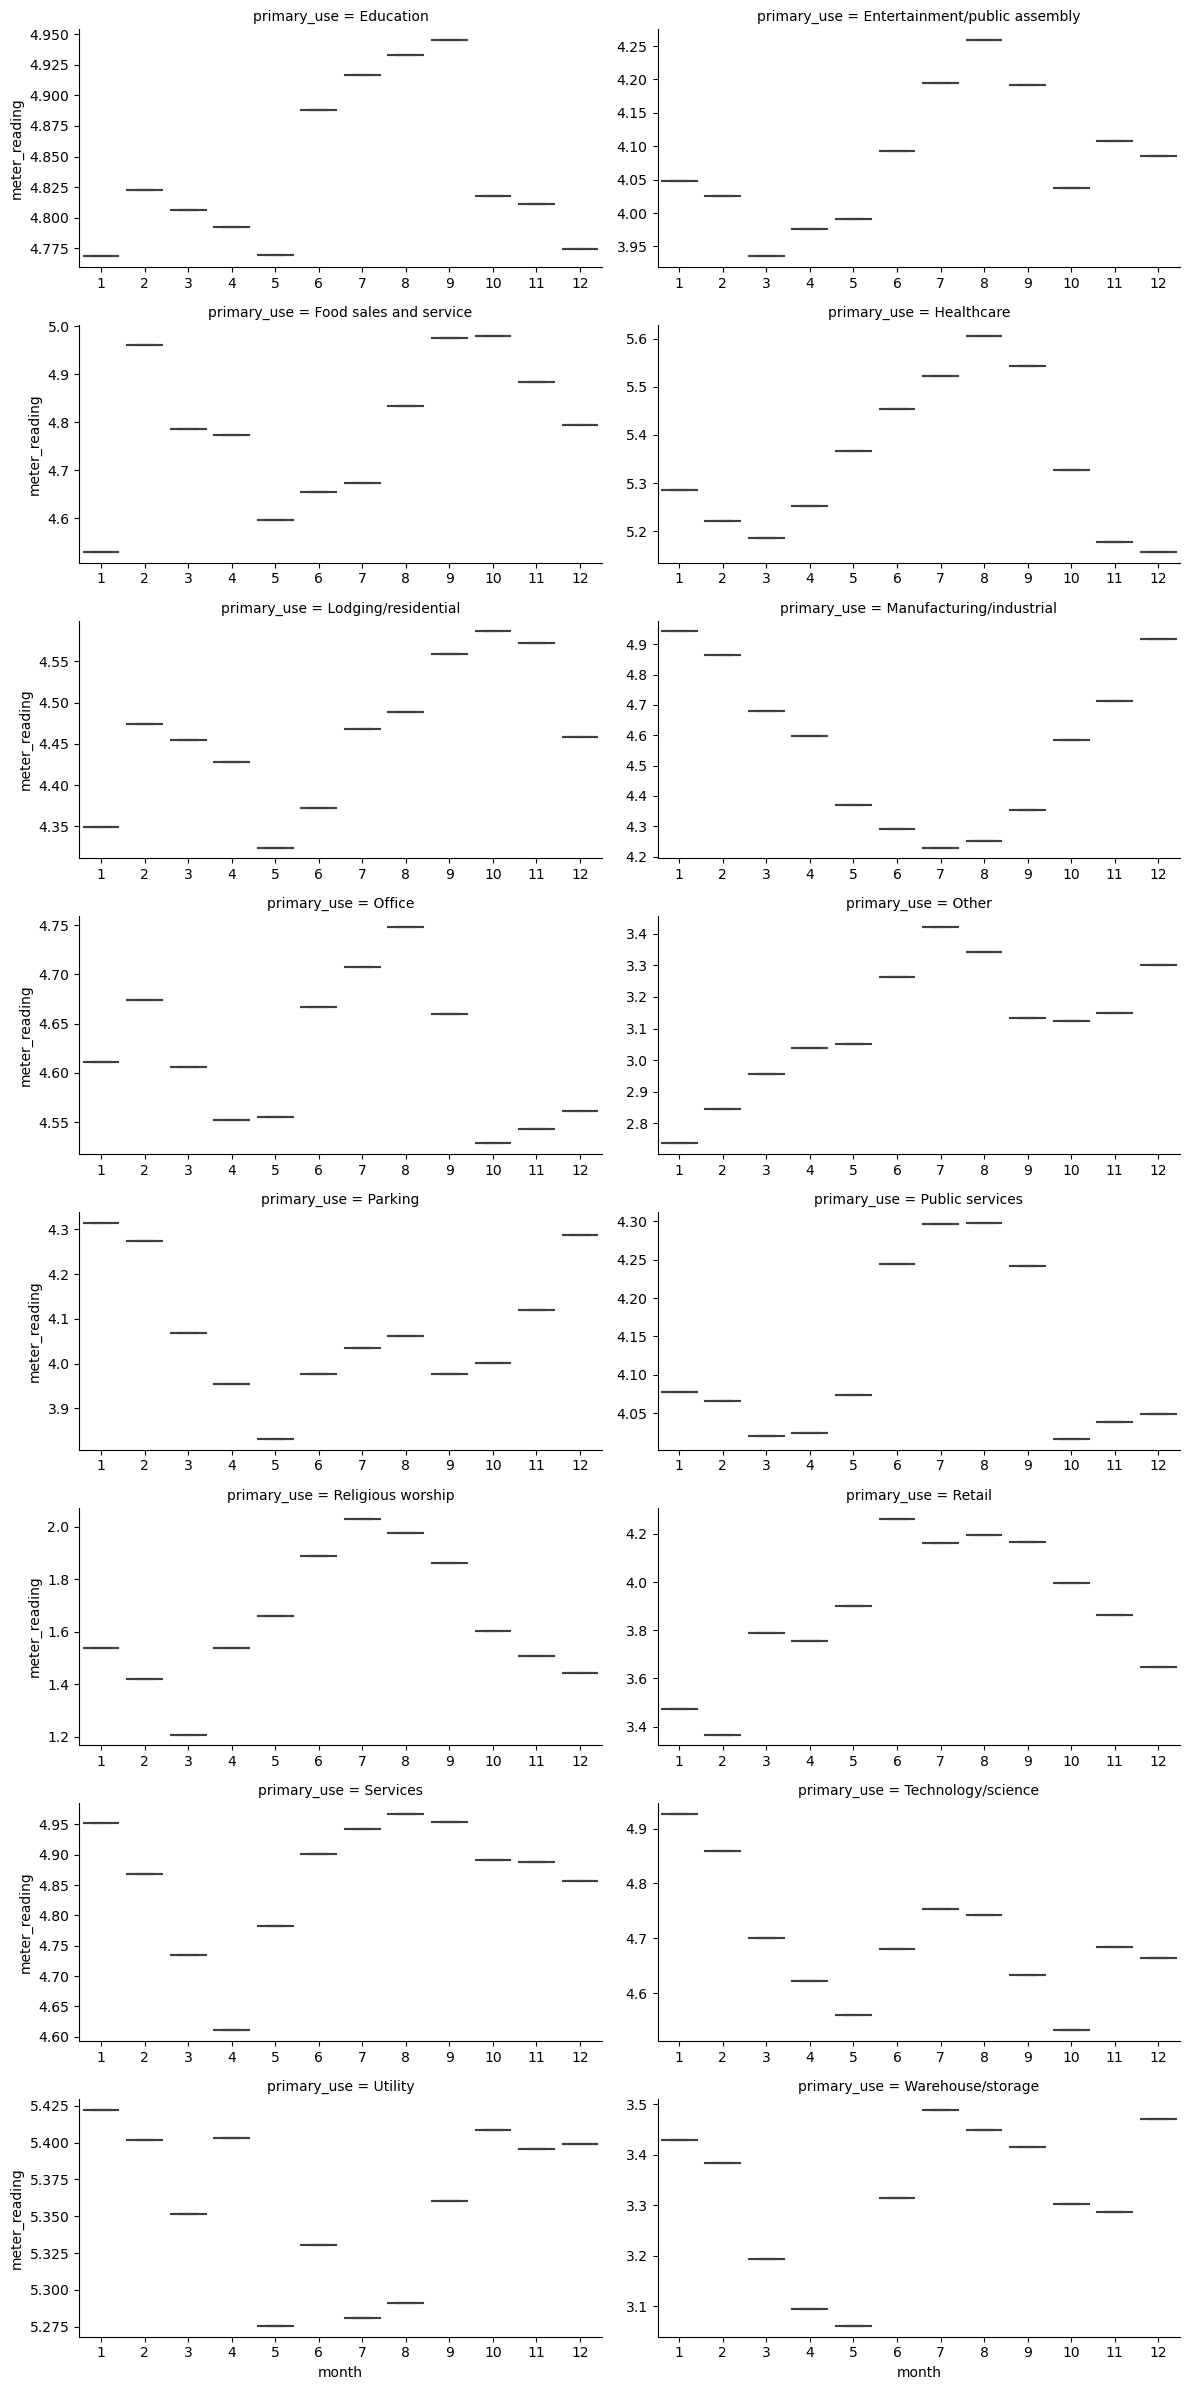

In [67]:
monthly_consumption = train_data.groupby(['month','primary_use']).meter_reading.mean().reset_index()
plots = sns.FacetGrid(monthly_consumption,col='primary_use',col_wrap=2,height=3,aspect=2,sharex=False,sharey=False)
plots.map(sns.boxplot,'month','meter_reading')
plt.show()

In above we plot the Daily power consumption vs meter_reading per primary_use category.
- For many categories the power consumption is high from June to August.
- For 'Food Sales and Service' category the peak usage is between September to October.
- For 'Lodging/Residential' category the peak usage is between September to November.
- For 'Manufacturing/Industrial' category the usage is lowest between May to September.
- For 'Parking' category the peak usage is between December to February.
- For 'Technology/Science' category the peak usage is between January to February.
- For 'Utility' category the peak usage is in the months of October and from January to February.

### 3.10 Plot of Hourly power usage vs meter_reading for each site_id case.

/home/nukul/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


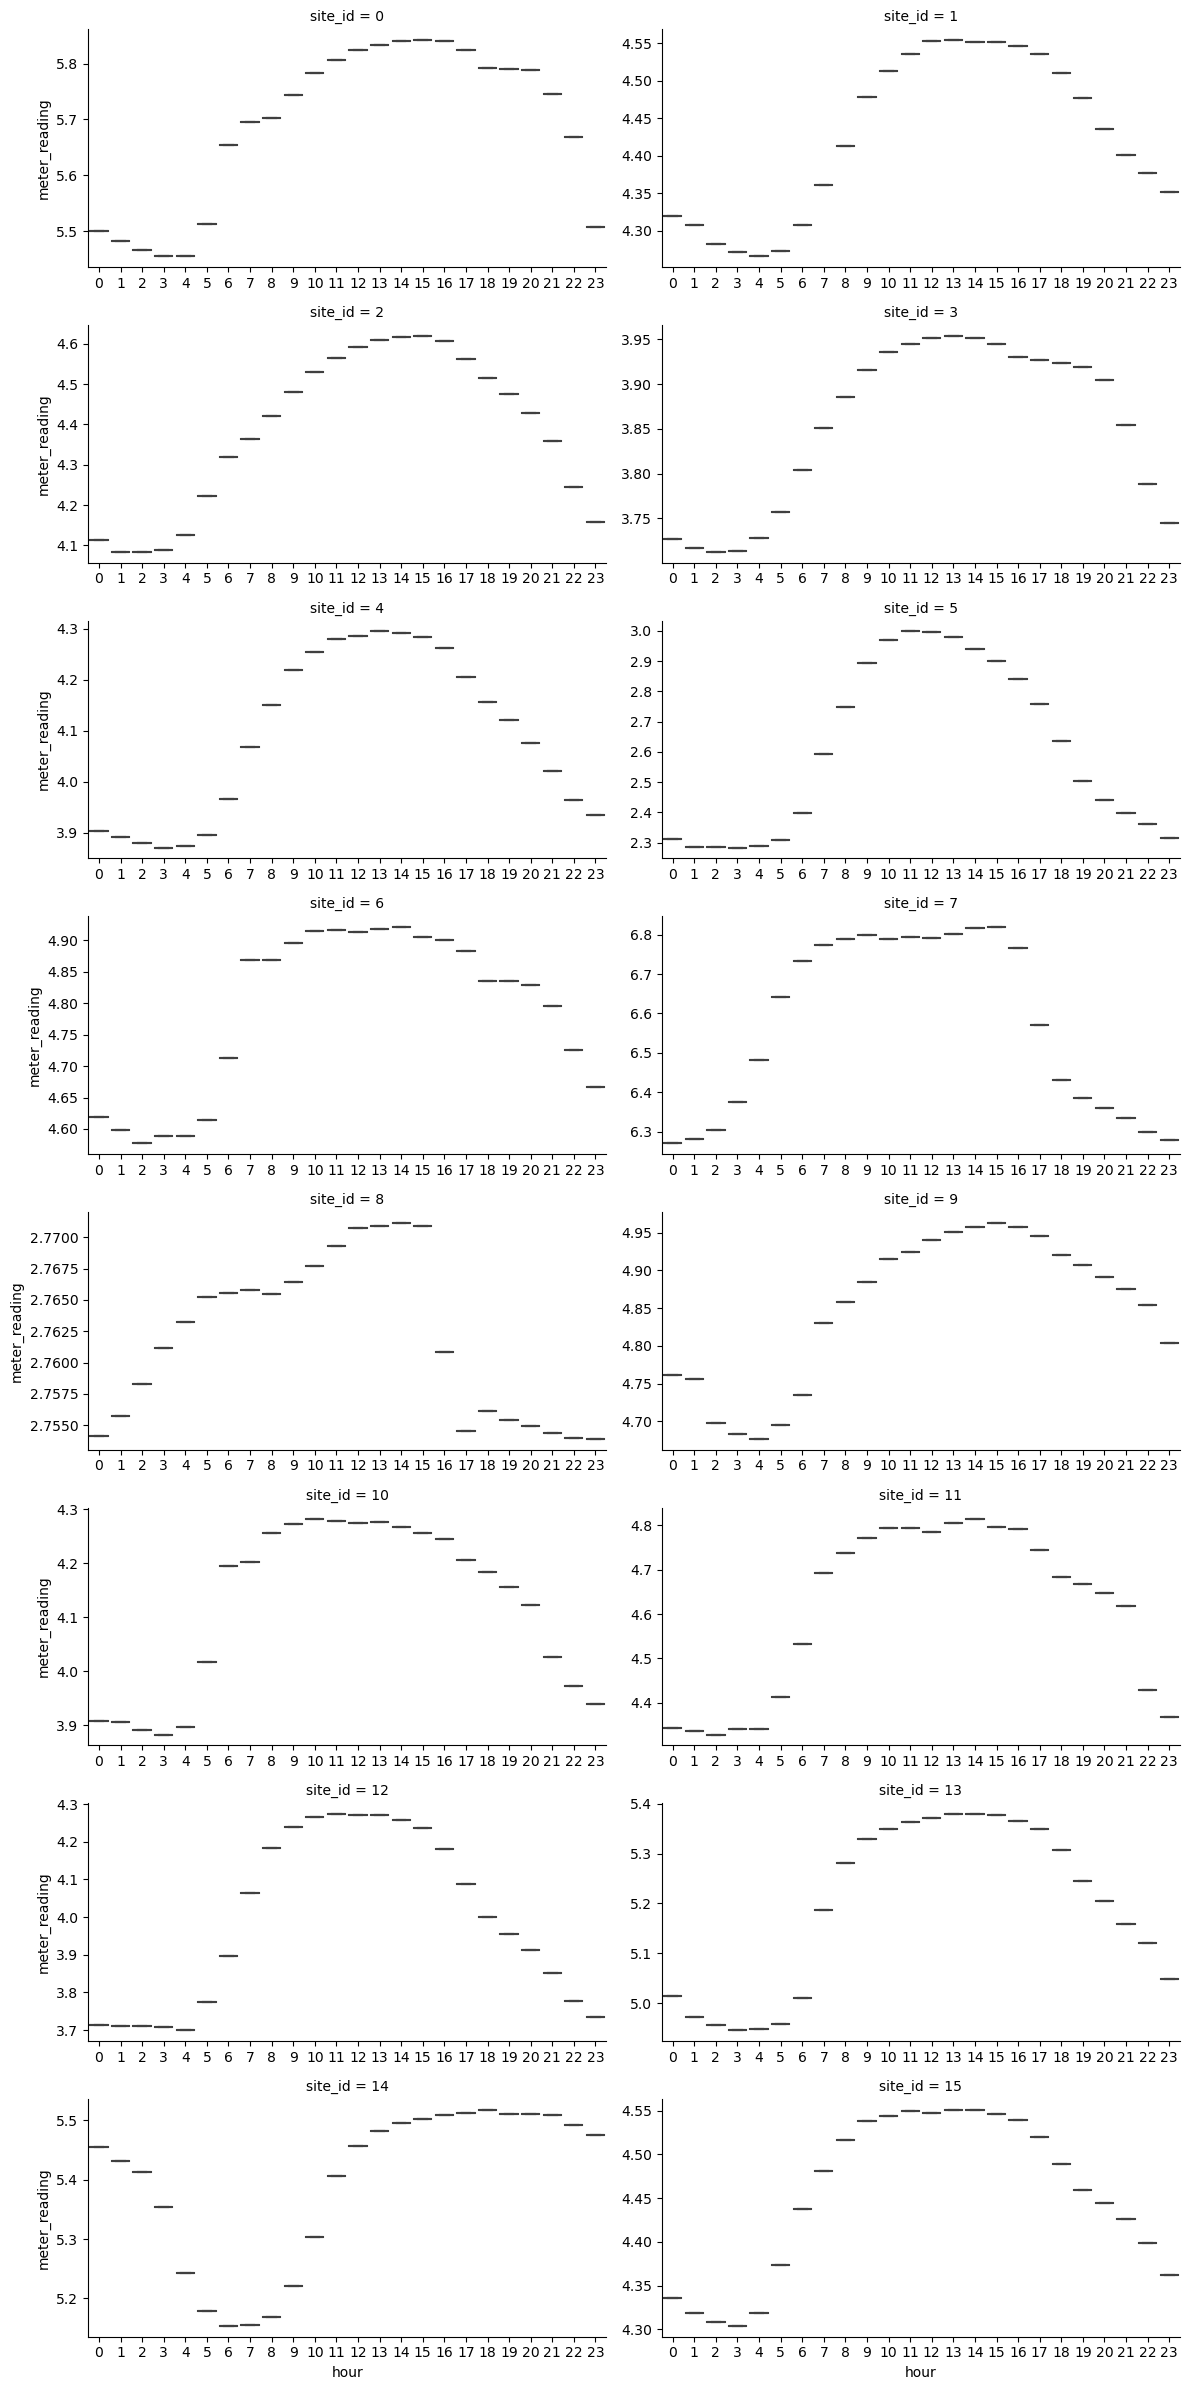

In [68]:
site_hour_data = train_data.groupby(['site_id','hour']).meter_reading.mean().reset_index()
plots = sns.FacetGrid(site_hour_data,col='site_id',col_wrap=2,height=3,aspect=2,sharex=False,sharey=False)
plots.map(sns.boxplot,'hour','meter_reading')
plt.show()

In above we plot the Hourly power consumption vs meter_reading per site_id category.
- We see that all the sites- site_id's hourly follow a similar usage pattern.
- Power consumption drops to a minimum in the very early morning hours or late night time of the day and then it rises again after 6am. 
- The power consumption peaks in the afternoon and then drops after 7pm for most of the categories.

### 3.11 Checking for Missing Values in train_data and test_data dataframes and Imputing them

In [27]:
# missing value check using percentage
missing_vals_train = (train_data.isnull().sum()*100)/len(train_data)
train_missing_df = pd.DataFrame({'column_name':train_data.columns,'missing value percentage':missing_vals_train})
train_missing_df

,column_name,missing value percentage
building_id,building_id,0.000000
meter,meter,0.000000
timestamp,timestamp,0.000000
meter_reading,meter_reading,0.000000
site_id,site_id,0.000000
primary_use,primary_use,0.000000
square_feet,square_feet,0.000000
year_built,year_built,60.117930
floor_count,floor_count,82.246055
air_temperature,air_temperature,0.488110


- The parameters year_built and floor_count have the highest number of missing values, more than 50%.
- We'll remove them to avoid modeling problems.

#### Since the columns 'year_built' and 'floor_count' had more than 50% of missing values in their data, we'll drop these columns

In [18]:
missing_vals_test = (test_data.isnull().sum()*100)/len(test_data)
test_missing_df = pd.DataFrame({'column_name':test_data.columns,'missing value percentage':missing_vals_test})
test_missing_df

,column_name,missing value percentage
row_id,row_id,0.000000
building_id,building_id,0.000000
meter,meter,0.000000
timestamp,timestamp,0.000000
site_id,site_id,0.000000
primary_use,primary_use,0.000000
square_feet,square_feet,0.000000
year_built,year_built,58.991597
floor_count,floor_count,82.605042
air_temperature,air_temperature,0.532167


- The parameters year_built and floor_count have the highest number of missing values, more than 50%.
- We'll remove them to avoid modeling problems.

In [28]:
train_data.drop(['year_built','floor_count'],axis=1,inplace=True)

In [19]:
test_data.drop(['year_built','floor_count'],axis=1,inplace=True)

### 3.12 Checking for null values in the train_data dataframe

In [29]:
train_data.isnull().sum()

building_id                 0
meter                       0
timestamp                   0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
air_temperature         89444
cloud_coverage        7967144
dew_temperature         92539
precip_depth_1_hr     3521861
sea_level_pressure    1187577
wind_direction        1325696
wind_speed             132573
hour                        0
day_of_week                 0
month                       0
day_of_year                 0
day                         0
year                        0
dtype: int64

- We see that colunms- air_temperature, cloud_coverage, dew_temperature, precip_depth_1_hr, sea_level_pressure, wind_direction and wind_speed have many null values in the train-data dataframe.
- So we'll fill the null values in these columns with their respective mean values as below.

In [30]:
air_temp = train_data.groupby(['day','site_id','month'])['air_temperature'].transform('mean')
train_data['air_temperature'].fillna(air_temp,inplace=True)

In [31]:
cloud_cover = train_data.groupby(['day','site_id','month'])['cloud_coverage'].transform('mean')
train_data['cloud_coverage'].fillna(cloud_cover,inplace=True)

In [32]:
dew_temp = train_data.groupby(['day','site_id','month'])['dew_temperature'].transform('mean')
train_data['dew_temperature'].fillna(dew_temp,inplace=True)

In [33]:
precip_depth = train_data.groupby(['day','site_id','month'])['precip_depth_1_hr'].transform('mean')
train_data['precip_depth_1_hr'].fillna(precip_depth,inplace=True)

In [34]:
sea_level = train_data.groupby(['day','site_id','month'])['sea_level_pressure'].transform('mean')
train_data['sea_level_pressure'].fillna(sea_level,inplace=True)

In [35]:
wind_dir = train_data.groupby(['day','site_id','month'])['wind_direction'].transform('mean')
train_data['wind_direction'].fillna(wind_dir,inplace=True)

In [36]:
wind_speed = train_data.groupby(['day','site_id','month'])['wind_speed'].transform('mean')
train_data['wind_speed'].fillna(wind_speed,inplace=True)

In [37]:
train_data.isnull().sum()

building_id                 0
meter                       0
timestamp                   0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
air_temperature             0
cloud_coverage        1222903
dew_temperature             0
precip_depth_1_hr     2676779
sea_level_pressure     822312
wind_direction              0
wind_speed                  0
hour                        0
day_of_week                 0
month                       0
day_of_year                 0
day                         0
year                        0
dtype: int64

- Even after replacing the null values with their mean we find some columns- cloud_coverage, precip_depth_1_hr and sea_level_pressure still have some null values.
- We replace these null values by the median value of these columns as below.

In [38]:
train_data['cloud_coverage'].fillna(train_data['cloud_coverage'].median(),inplace=True)
train_data['precip_depth_1_hr'].fillna(train_data['precip_depth_1_hr'].median(),inplace=True)
train_data['sea_level_pressure'].fillna(train_data['sea_level_pressure'].median(),inplace=True)

In [39]:
train_data.isnull().sum()

building_id           0
meter                 0
timestamp             0
meter_reading         0
site_id               0
primary_use           0
square_feet           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
hour                  0
day_of_week           0
month                 0
day_of_year           0
day                   0
year                  0
dtype: int64

- We can see that now there are no null values in train_data

### 3.13 Checking for null values in test_data dataframe

In [20]:
test_data.isnull().sum()

row_id                       0
building_id                  0
meter                        0
timestamp                    0
site_id                      0
primary_use                  0
square_feet                  0
air_temperature         221901
cloud_coverage        19542180
dew_temperature         260799
precip_depth_1_hr      7801563
sea_level_pressure     2516826
wind_direction         2978663
wind_speed              302089
hour                         0
day_of_week                  0
month                        0
day_of_year                  0
day                          0
year                         0
dtype: int64

- We see that colunms- air_temperature, cloud_coverage, dew_temperature, precip_depth_1_hr, sea_level_pressure, wind_direction and wind_speed have many null values in the test-data dataframe.
- So we'll fill the null values in these columns with their respective mean values as below.

In [21]:
air_temp = test_data.groupby(['day','site_id','month'])['air_temperature'].transform('mean')
test_data['air_temperature'].fillna(air_temp,inplace=True)

In [22]:
cloud_cover = test_data.groupby(['day','site_id','month'])['cloud_coverage'].transform('mean')
test_data['cloud_coverage'].fillna(cloud_cover,inplace=True)

In [23]:
dew_temp = test_data.groupby(['day','site_id','month'])['dew_temperature'].transform('mean')
test_data['dew_temperature'].fillna(dew_temp,inplace=True)

In [24]:
precip_depth = test_data.groupby(['day','site_id','month'])['precip_depth_1_hr'].transform('mean')
test_data['precip_depth_1_hr'].fillna(precip_depth,inplace=True)

In [25]:
sea_level = test_data.groupby(['day','site_id','month'])['sea_level_pressure'].transform('mean')
test_data['sea_level_pressure'].fillna(sea_level,inplace=True)

In [26]:
wind_dir = test_data.groupby(['day','site_id','month'])['wind_direction'].transform('mean')
test_data['wind_direction'].fillna(wind_dir,inplace=True)

In [27]:
wind_speed = test_data.groupby(['day','site_id','month'])['wind_speed'].transform('mean')
test_data['wind_speed'].fillna(wind_speed,inplace=True)

In [28]:
test_data.isnull().sum()

row_id                      0
building_id                 0
meter                       0
timestamp                   0
site_id                     0
primary_use                 0
square_feet                 0
air_temperature             0
cloud_coverage        1429680
dew_temperature             0
precip_depth_1_hr     4197504
sea_level_pressure    1559280
wind_direction              0
wind_speed                  0
hour                        0
day_of_week                 0
month                       0
day_of_year                 0
day                         0
year                        0
dtype: int64

- Even after replacing the null values with their mean we find some columns- cloud_coverage, precip_depth_1_hr and sea_level_pressure still have some null values.
- We replace these null values by the median value of these columns as below.

In [29]:
# even after replacing the columns with mean values, some still got left. so we replace values of those columns
# with their median values.
test_data['cloud_coverage'].fillna(test_data['cloud_coverage'].median(),inplace=True)
test_data['precip_depth_1_hr'].fillna(test_data['precip_depth_1_hr'].median(),inplace=True)
test_data['sea_level_pressure'].fillna(test_data['sea_level_pressure'].median(),inplace=True)

In [30]:
test_data.isnull().sum()

row_id                0
building_id           0
meter                 0
timestamp             0
site_id               0
primary_use           0
square_feet           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
hour                  0
day_of_week           0
month                 0
day_of_year           0
day                   0
year                  0
dtype: int64

- We can see that now there are no null values in test_data

### 3.14 Adding new feature-  Relative Humidity

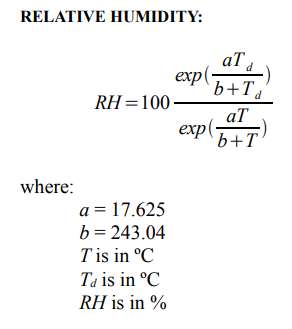

- Td implies Dew Temperature in Deg Celcius.
- T implies Air Temperature in Deg Celcius.
- RH implies Relative Humidity and it is in percentages.
- a and b are constants where a=17.625, b=243.04.

In [40]:
# https://bmcnoldy.rsmas.miami.edu/Humidity.html
# https://bmcnoldy.rsmas.miami.edu/humidity_conversions.pdf
#  https://www.omnicalculator.com/physics/relative-humidity
# RH: =100*(EXP((17.625*TD)/(243.04+TD))/EXP((17.625*T)/(243.04+T)))

train_data['relative_humidity'] = 100*(np.exp((17.625*train_data['dew_temperature'])/(243.04+train_data['dew_temperature']))/(np.exp((17.625*train_data['air_temperature'])/(243.04+train_data['air_temperature']))))
train_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,...,sea_level_pressure,wind_direction,wind_speed,hour,day_of_week,month,day_of_year,day,year,relative_humidity
45,46,0,2016-01-01,53.239700,0,Retail,9.110078,25.000000,6.0,20.000000,...,1019.5,0.0,0.000000,0,4,1,1,1,2016,73.8125
72,74,0,2016-01-01,43.001301,0,Parking,12.867830,25.000000,6.0,20.000000,...,1019.5,0.0,0.000000,0,4,1,1,1,2016,73.8125
91,93,0,2016-01-01,52.420601,0,Office,10.415443,25.000000,6.0,20.000000,...,1019.5,0.0,0.000000,0,4,1,1,1,2016,73.8125
103,105,0,2016-01-01,23.303600,1,Education,10.832181,3.800781,0.0,2.400391,...,1021.0,240.0,3.099609,0,4,1,1,1,2016,90.6250
104,106,0,2016-01-01,0.374600,1,Education,8.589514,3.800781,0.0,2.400391,...,1021.0,240.0,3.099609,0,4,1,1,1,2016,90.6250


In [31]:
test_data['relative_humidity'] = 100*(np.exp((17.625*test_data['dew_temperature'])/(243.04+test_data['dew_temperature']))/(np.exp((17.625*test_data['air_temperature'])/(243.04+test_data['air_temperature']))))
test_data.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,...,sea_level_pressure,wind_direction,wind_speed,hour,day_of_week,month,day_of_year,day,year,relative_humidity
0,0,0,electricity,2017-01-01,0,Education,8.913685,17.796875,4.0,11.703125,...,1021.5,100.0,3.599609,0,6,1,1,1,2017,67.4375
1,1,1,electricity,2017-01-01,0,Education,7.908755,17.796875,4.0,11.703125,...,1021.5,100.0,3.599609,0,6,1,1,1,2017,67.4375
2,2,2,electricity,2017-01-01,0,Education,8.589886,17.796875,4.0,11.703125,...,1021.5,100.0,3.599609,0,6,1,1,1,2017,67.4375
3,3,3,electricity,2017-01-01,0,Education,10.072639,17.796875,4.0,11.703125,...,1021.5,100.0,3.599609,0,6,1,1,1,2017,67.4375
4,4,4,electricity,2017-01-01,0,Education,11.666573,17.796875,4.0,11.703125,...,1021.5,100.0,3.599609,0,6,1,1,1,2017,67.4375


### 3.15 Adding new feature- Feels like

In [41]:
air_temp = list(train_data['air_temperature'])
rel_humid = list(train_data['relative_humidity'])
winds_speed = list(train_data['wind_speed'])

- Source - https://pypi.org/project/meteocalc/
- Feels Like temperature or Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed.

In [42]:
# https://pypi.org/project/meteocalc/
# !pip install meteocalc

feelike_final = []
feelike = []
for i in range(len(train_data)):
    feelike.append(feels_like(Temp(air_temp[i], unit = 'C'), rel_humid[i], winds_speed[i]))
    
for i in range(len(feelike)):
    feelike_final.append(feelike[i].f)
train_data['feels_like'] = feelike_final

train_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,...,wind_direction,wind_speed,hour,day_of_week,month,day_of_year,day,year,relative_humidity,feels_like
45,46,0,2016-01-01,53.239700,0,Retail,9.110078,25.000000,6.0,20.000000,...,0.0,0.000000,0,4,1,1,1,2016,73.8125,77.000000
72,74,0,2016-01-01,43.001301,0,Parking,12.867830,25.000000,6.0,20.000000,...,0.0,0.000000,0,4,1,1,1,2016,73.8125,77.000000
91,93,0,2016-01-01,52.420601,0,Office,10.415443,25.000000,6.0,20.000000,...,0.0,0.000000,0,4,1,1,1,2016,73.8125,77.000000
103,105,0,2016-01-01,23.303600,1,Education,10.832181,3.800781,0.0,2.400391,...,240.0,3.099609,0,4,1,1,1,2016,90.6250,36.935821
104,106,0,2016-01-01,0.374600,1,Education,8.589514,3.800781,0.0,2.400391,...,240.0,3.099609,0,4,1,1,1,2016,90.6250,36.935821


In [32]:
air_temp = list(test_data['air_temperature'])
rel_humid = list(test_data['relative_humidity'])
winds_speed = list(test_data['wind_speed'])

In [33]:
feelike_final = []
feelike = []
for i in range(len(test_data)):   
    feelike.append(feels_like(Temp(air_temp[i], unit = 'C'), rel_humid[i], winds_speed[i]))
    
for i in range(len(feelike)):
    feelike_final.append(feelike[i].f)
test_data['feels_like'] = feelike_final

test_data.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,...,wind_direction,wind_speed,hour,day_of_week,month,day_of_year,day,year,relative_humidity,feels_like
0,0,0,electricity,2017-01-01,0,Education,8.913685,17.796875,4.0,11.703125,...,100.0,3.599609,0,6,1,1,1,2017,67.4375,64.034375
1,1,1,electricity,2017-01-01,0,Education,7.908755,17.796875,4.0,11.703125,...,100.0,3.599609,0,6,1,1,1,2017,67.4375,64.034375
2,2,2,electricity,2017-01-01,0,Education,8.589886,17.796875,4.0,11.703125,...,100.0,3.599609,0,6,1,1,1,2017,67.4375,64.034375
3,3,3,electricity,2017-01-01,0,Education,10.072639,17.796875,4.0,11.703125,...,100.0,3.599609,0,6,1,1,1,2017,67.4375,64.034375
4,4,4,electricity,2017-01-01,0,Education,11.666573,17.796875,4.0,11.703125,...,100.0,3.599609,0,6,1,1,1,2017,67.4375,64.034375


### 3.16 Adding new Feature - city and country

In [34]:
# https://www.kaggle.com/datadugong/locate-better-cities-by-weather-temp-fill-nans
# https://www.kaggle.com/c/ashrae-energy-prediction/discussion/115698
# https://www.kaggle.com/patrick0302/locate-cities-according-weather-temperature

areas = pd.DataFrame()
areas['site_id'] = np.arange(0,16)

areas['city']=['Orlando','Heathrow','Tempe','Washington','Berkeley','Southampton','Washington','Ottowa',
               'Orlando','Austin','Saltlake','Ottowa','Dublin','Minneapolis','Philadelphia','Rochester']

areas['country']=['US','UK','US','US','US','UK','US','Canada','US','US','US','Canada','Ireland','US','US','US']

areas.head()

,site_id,city,country
0,0,Orlando,US
1,1,Heathrow,UK
2,2,Tempe,US
3,3,Washington,US
4,4,Berkeley,US


In [44]:
train_data = train_data.merge(areas,on='site_id',how='left')
train_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,...,hour,day_of_week,month,day_of_year,day,year,relative_humidity,feels_like,city,country
0,46,0,2016-01-01,53.239700,0,Retail,9.110078,25.000000,6.0,20.000000,...,0,4,1,1,1,2016,73.8125,77.000000,Orlando,US
1,74,0,2016-01-01,43.001301,0,Parking,12.867830,25.000000,6.0,20.000000,...,0,4,1,1,1,2016,73.8125,77.000000,Orlando,US
2,93,0,2016-01-01,52.420601,0,Office,10.415443,25.000000,6.0,20.000000,...,0,4,1,1,1,2016,73.8125,77.000000,Orlando,US
3,105,0,2016-01-01,23.303600,1,Education,10.832181,3.800781,0.0,2.400391,...,0,4,1,1,1,2016,90.6250,36.935821,Heathrow,UK
4,106,0,2016-01-01,0.374600,1,Education,8.589514,3.800781,0.0,2.400391,...,0,4,1,1,1,2016,90.6250,36.935821,Heathrow,UK


In [35]:
test_data = test_data.merge(areas,on='site_id',how='left')
test_data.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,...,hour,day_of_week,month,day_of_year,day,year,relative_humidity,feels_like,city,country
0,0,0,electricity,2017-01-01,0,Education,8.913685,17.796875,4.0,11.703125,...,0,6,1,1,1,2017,67.4375,64.034375,Orlando,US
1,1,1,electricity,2017-01-01,0,Education,7.908755,17.796875,4.0,11.703125,...,0,6,1,1,1,2017,67.4375,64.034375,Orlando,US
2,2,2,electricity,2017-01-01,0,Education,8.589886,17.796875,4.0,11.703125,...,0,6,1,1,1,2017,67.4375,64.034375,Orlando,US
3,3,3,electricity,2017-01-01,0,Education,10.072639,17.796875,4.0,11.703125,...,0,6,1,1,1,2017,67.4375,64.034375,Orlando,US
4,4,4,electricity,2017-01-01,0,Education,11.666573,17.796875,4.0,11.703125,...,0,6,1,1,1,2017,67.4375,64.034375,Orlando,US


### 3.17 Adding new feature - Holiday

In [36]:
# https://www.geeksforgeeks.org/python-holidays-library/
# https://towardsdatascience.com/5-minute-guide-to-detecting-holidays-in-python-c270f8479387
# !pip install holidays

USA=[]
for ptr in holidays.UnitedStates(years=2016).keys(): #2016-2018 year all holidays in USA
    USA.append(str(ptr))
for ptr in holidays.UnitedStates(years=2017).keys():
    USA.append(str(ptr))
for ptr in holidays.UnitedStates(years=2018).keys():
    USA.append(str(ptr))
    USA.append('2019-01-01')

United_Kingdom=[]
for ptr in holidays.UnitedKingdom(years=2016).keys():
    United_Kingdom.append(str(ptr))
for ptr in holidays.UnitedKingdom(years=2017).keys(): #2016-2018 year all holidays in United_Kingdom
    United_Kingdom.append(str(ptr))
for ptr in holidays.UnitedKingdom(years=2018).keys():
    United_Kingdom.append(str(ptr))
    United_Kingdom.append('2019-01-01')

Canada=[]
for ptr in holidays.Canada(years=2016).keys():   #2016-2018 year all holidays in Canada
    Canada.append(str(ptr))
for ptr in holidays.Canada(years=2017).keys():
    Canada.append(str(ptr))
for ptr in holidays.Canada(years=2018).keys():
    Canada.append(str(ptr))
    Canada.append('2019-01-01')

Ire_land=[]
for ptr in holidays.Ireland(years=2016).keys():  #2016-2018 year all holidays in Ireland
    Ire_land.append(str(ptr))
for ptr in holidays.Ireland(years=2017).keys():
    Ire_land.append(str(ptr))
for ptr in holidays.Ireland(years=2018).keys():
    Ire_land.append(str(ptr))
    Ire_land.append('2019-01-01')

### 3.18 Adding holiday feature to train_data

In [46]:
train_data['holiday']=[0]*(train_data.shape[0])
    
train_data.loc[train_data['country']=='US','holiday']=(train_data['timestamp'].dt.date.astype('str').isin(USA)).astype(int)
train_data.loc[train_data['country']=='UK','holiday']=(train_data['timestamp'].dt.date.astype('str').isin(United_Kingdom)).astype(int)
train_data.loc[train_data['country']=='Canada','holiday']=(train_data['timestamp'].dt.date.astype('str').isin(Canada)).astype(int)
train_data.loc[train_data['country']=='Ireland','holiday']=(train_data['timestamp'].dt.date.astype('str').isin(Ire_land)).astype(int)

train_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,...,day_of_week,month,day_of_year,day,year,relative_humidity,feels_like,city,country,holiday
0,46,0,2016-01-01,53.239700,0,Retail,9.110078,25.000000,6.0,20.000000,...,4,1,1,1,2016,73.8125,77.000000,Orlando,US,1
1,74,0,2016-01-01,43.001301,0,Parking,12.867830,25.000000,6.0,20.000000,...,4,1,1,1,2016,73.8125,77.000000,Orlando,US,1
2,93,0,2016-01-01,52.420601,0,Office,10.415443,25.000000,6.0,20.000000,...,4,1,1,1,2016,73.8125,77.000000,Orlando,US,1
3,105,0,2016-01-01,23.303600,1,Education,10.832181,3.800781,0.0,2.400391,...,4,1,1,1,2016,90.6250,36.935821,Heathrow,UK,1
4,106,0,2016-01-01,0.374600,1,Education,8.589514,3.800781,0.0,2.400391,...,4,1,1,1,2016,90.6250,36.935821,Heathrow,UK,1


### 3.20 Adding holiday feature to test_data

In [37]:
test_data['holiday']=[0]*(test_data.shape[0])
    
test_data.loc[test_data['country']=='US','holiday']=(test_data['timestamp'].dt.date.astype('str').isin(USA)).astype(int)
test_data.loc[test_data['country']=='UK','holiday']=(test_data['timestamp'].dt.date.astype('str').isin(United_Kingdom)).astype(int)
test_data.loc[test_data['country']=='Canada','holiday']=(test_data['timestamp'].dt.date.astype('str').isin(Canada)).astype(int)
test_data.loc[test_data['country']=='Ireland','holiday']=(test_data['timestamp'].dt.date.astype('str').isin(Ire_land)).astype(int)

test_data.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,...,day_of_week,month,day_of_year,day,year,relative_humidity,feels_like,city,country,holiday
0,0,0,electricity,2017-01-01,0,Education,8.913685,17.796875,4.0,11.703125,...,6,1,1,1,2017,67.4375,64.034375,Orlando,US,1
1,1,1,electricity,2017-01-01,0,Education,7.908755,17.796875,4.0,11.703125,...,6,1,1,1,2017,67.4375,64.034375,Orlando,US,1
2,2,2,electricity,2017-01-01,0,Education,8.589886,17.796875,4.0,11.703125,...,6,1,1,1,2017,67.4375,64.034375,Orlando,US,1
3,3,3,electricity,2017-01-01,0,Education,10.072639,17.796875,4.0,11.703125,...,6,1,1,1,2017,67.4375,64.034375,Orlando,US,1
4,4,4,electricity,2017-01-01,0,Education,11.666573,17.796875,4.0,11.703125,...,6,1,1,1,2017,67.4375,64.034375,Orlando,US,1


### 3.22 Checking columns of train_data, test_data and removing unwanted / unnecessary columns from both the dataframes

In [47]:
train_data.columns

Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'hour', 'day_of_week', 'month',
       'day_of_year', 'day', 'year', 'relative_humidity', 'feels_like', 'city',
       'country', 'holiday'],
      dtype='object')

In [38]:
test_data.columns

Index(['row_id', 'building_id', 'meter', 'timestamp', 'site_id', 'primary_use',
       'square_feet', 'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'hour', 'day_of_week', 'month', 'day_of_year', 'day',
       'year', 'relative_humidity', 'feels_like', 'city', 'country',
       'holiday'],
      dtype='object')

- We will remove feature 'row_id' since we have 'building_id' as our feature to relate train and test datasets.

In [14]:
test_data.drop(['row_id'],axis=1, inplace = True)
test_data.columns

Index(['building_id', 'meter', 'timestamp', 'site_id', 'primary_use',
       'square_feet', 'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'hour', 'day_of_week', 'month', 'day_of_year', 'day',
       'year', 'relative_humidity', 'feels_like', 'city', 'country',
       'holiday'],
      dtype='object')

- We remove the features- city and country, since, now they do not add much value to our data.
- Also, they were just used to add the Holiday feature, so now we remove these columns.

In [15]:
train_data.drop(['city','country'],axis=1,inplace=True)
train_data.columns

Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'hour', 'day_of_week', 'month',
       'day_of_year', 'day', 'year', 'relative_humidity', 'feels_like',
       'holiday'],
      dtype='object')

In [16]:
test_data.drop(['city','country'],axis=1,inplace=True)
test_data.columns

Index(['building_id', 'meter', 'timestamp', 'site_id', 'primary_use',
       'square_feet', 'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'hour', 'day_of_week', 'month', 'day_of_year', 'day',
       'year', 'relative_humidity', 'feels_like', 'holiday'],
      dtype='object')

### 3.23 Adding feature- season

In [17]:
train_data['season']= train_data['month'].apply(lambda i: 'Spring' if i==3 or i==4 or i==5 else 'Summer' if 
                                                i==6 or i==7 or i==8 
                                                else 'Autumn' if i==9 or i==10 or i==11 else 'Winter')

In [18]:
test_data['season'] = test_data['month'].apply(lambda i: 'Spring' if i==3 or i==4 or i==5 else 'Summer' if 
                                                i==6 or i==7 or i==8 
                                                else 'Autumn' if i==9 or i==10 or i==11 else 'Winter')

### 3.24 Adding Feature- Day_Time

In [19]:
train_data['Day_Time']= train_data['hour'].apply(lambda i: 1 if i >=6 and i <=18 else 0)

In [20]:
test_data['Day_Time']= test_data['hour'].apply(lambda i: 1 if i >=6 and i <=18 else 0)

### 3.25 Adding Feature- Latitude, Solar_Hour, Solar_Dec, Horiz_Solar 

In [21]:
latitude_dict = {0 :28.5383,1 :50.9097,2 :33.4255,3 :38.9072,4 :37.8715,5 :50.9097,6 :40.7128,7 :45.4215,
                 8 :28.5383,9 :30.2672,10 :40.10677,11 :45.4215,12 :53.3498,13 :44.9375,14 :38.0293,
                 15: 40.7128,}

train_data['Latitude'] = train_data['site_id'].map(latitude_dict)
train_data['Solar_Hour'] = (train_data['hour']-12)*15 # to be removed
train_data['Solar_Dec'] = -23.45*np.cos(np.deg2rad(360*(train_data['day']+10)/365)) # to be removed
train_data['Horiz_Solar'] = np.cos(np.deg2rad(train_data['Solar_Hour']))*np.cos(np.deg2rad(train_data['Solar_Dec']))*
    np.cos(np.deg2rad(train_data['Latitude'])) + np.sin(np.deg2rad(train_data['Solar_Dec']))*
    np.sin(np.deg2rad(train_data['Latitude']))

train_data['Horiz_Solar'] = train_data['Horiz_Solar'].apply(lambda x: 0 if x <0 else x)

In [22]:
latitude_dict = {0 :28.5383,1 :50.9097,2 :33.4255,3 :38.9072,4 :37.8715,5 :50.9097,6 :40.7128,7 :45.4215,
                 8 :28.5383,9 :30.2672,10 :40.10677,11 :45.4215,12 :53.3498,13 :44.9375,14 :38.0293,
                 15: 40.7128,}

test_data['Latitude'] = test_data['site_id'].map(latitude_dict)
test_data['Solar_Hour'] = (test_data['hour']-12)*15 # to be removed
test_data['Solar_Dec'] = -23.45*np.cos(np.deg2rad(360*(test_data['day']+10)/365)) # to be removed
test_data['Horiz_Solar'] = np.cos(np.deg2rad(test_data['Solar_Hour']))*np.cos(np.deg2rad(test_data['Solar_Dec']))*np.cos(np.deg2rad(test_data['Latitude'])) + np.sin(np.deg2rad(test_data['Solar_Dec']))*np.sin(np.deg2rad(test_data['Latitude']))
test_data['Horiz_Solar'] = test_data['Horiz_Solar'].apply(lambda x: 0 if x <0 else x)

### 3.26 Label Encoding Features

#### 3.26.1 Label Encoding- 'primary_use'

In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

label_encode = LabelEncoder()
label_encode.fit(train_data['primary_use'])

LabelEncoder()

In [24]:
train_data['primary_use'] = label_encode.transform(train_data['primary_use'])

In [25]:
test_data['primary_use'] = label_encode.transform(test_data['primary_use'])

#### 3.26.2 Label Encoding- 'meter'

In [26]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

label_encode = LabelEncoder()
label_encode.fit(train_data['meter'])

LabelEncoder()

In [27]:
train_data['meter'] = label_encode.transform(train_data['meter'])

In [28]:
test_data['meter'] = label_encode.transform(test_data['meter'])

#### 3.26.3 Label Encoding- 'season'

In [29]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

label_encode = LabelEncoder()
label_encode.fit(train_data['season'])

LabelEncoder()

In [30]:
train_data['season'] = label_encode.transform(train_data['season'])

In [31]:
test_data['season'] = label_encode.transform(test_data['season'])

### 3.27 Sorting Dataset using 'timestamp' and dropping feature- 'timestamp'

In [32]:
train_data = train_data.sort_values(by='timestamp')

In [33]:
train_data.drop(['timestamp'],axis=1,inplace=True)

In [34]:
test_data.drop(['timestamp'],axis=1,inplace=True)

### 3.28 Adding Feature- Air_Temp_Diff

In [35]:
# https://www.kaggle.com/competitions/ashrae-energy-prediction/discussion/122863
train_data['Air_Temp_Diff'] = train_data['air_temperature'] - train_data.groupby(['building_id', 'meter'])['air_temperature'].shift(1)

In [36]:
# https://www.kaggle.com/competitions/ashrae-energy-prediction/discussion/122863
test_data['Air_Temp_Diff'] = test_data['air_temperature'] - test_data.groupby(['building_id', 'meter'])['air_temperature'].shift(1)

In [37]:
train_data.isnull().sum()

building_id              0
meter                    0
meter_reading            0
site_id                  0
primary_use              0
square_feet              0
air_temperature          0
cloud_coverage           0
dew_temperature          0
precip_depth_1_hr        0
sea_level_pressure       0
wind_direction           0
wind_speed               0
hour                     0
day_of_week              0
month                    0
day_of_year              0
day                      0
year                     0
relative_humidity        0
feels_like               0
holiday                  0
season                   0
Day_Time                 0
Latitude                 0
Solar_Hour               0
Solar_Dec                0
Horiz_Solar              0
Air_Temp_Diff         2378
dtype: int64

In [38]:
train_data['Air_Temp_Diff'].fillna(train_data['Air_Temp_Diff'].median(),inplace=True)

In [39]:
test_data.isnull().sum()

building_id              0
meter                    0
site_id                  0
primary_use              0
square_feet              0
air_temperature          0
cloud_coverage           0
dew_temperature          0
precip_depth_1_hr        0
sea_level_pressure       0
wind_direction           0
wind_speed               0
hour                     0
day_of_week              0
month                    0
day_of_year              0
day                      0
year                     0
relative_humidity        0
feels_like               0
holiday                  0
season                   0
Day_Time                 0
Latitude                 0
Solar_Hour               0
Solar_Dec                0
Horiz_Solar              0
Air_Temp_Diff         2380
dtype: int64

In [40]:
test_data['Air_Temp_Diff'].fillna(test_data['Air_Temp_Diff'].median(),inplace=True)

In [43]:
train_data.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,...,relative_humidity,feels_like,holiday,season,Day_Time,Latitude,Solar_Hour,Solar_Dec,Horiz_Solar,Air_Temp_Diff
0,46,1,3.994141,0,11,9.109375,25.000000,6.0,20.000000,-0.138916,...,73.8125,77.000000,1,3,0,28.5383,76,-23.030845,0.008896,0.0
1151,1164,1,5.492188,13,6,12.429688,-8.296875,8.0,-12.203125,-0.217041,...,73.4375,10.679688,1,3,0,44.9375,76,-23.030845,0.000000,0.0
1150,1163,3,6.480469,13,8,11.335938,-8.296875,8.0,-12.203125,-0.217041,...,73.4375,10.679688,1,3,0,44.9375,76,-23.030845,0.000000,0.0
1149,1163,0,1.526367,13,8,11.335938,-8.296875,8.0,-12.203125,-0.217041,...,73.4375,10.679688,1,3,0,44.9375,76,-23.030845,0.000000,0.0
1148,1163,1,3.970703,13,8,11.335938,-8.296875,8.0,-12.203125,-0.217041,...,73.4375,10.679688,1,3,0,44.9375,76,-23.030845,0.000000,0.0


In [44]:
test_data.head()

,building_id,meter,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,...,relative_humidity,feels_like,holiday,season,Day_Time,Latitude,Solar_Hour,Solar_Dec,Horiz_Solar,Air_Temp_Diff
0,0,1,0,0,8.914062,17.796875,4.0,11.703125,0.282715,1021.5,...,67.4375,64.0625,1,3,0,28.5383,76,-23.030845,0.008896,0.0
1,1,1,0,0,7.910156,17.796875,4.0,11.703125,0.282715,1021.5,...,67.4375,64.0625,1,3,0,28.5383,76,-23.030845,0.008896,0.0
2,2,1,0,0,8.593750,17.796875,4.0,11.703125,0.282715,1021.5,...,67.4375,64.0625,1,3,0,28.5383,76,-23.030845,0.008896,0.0
3,3,1,0,0,10.070312,17.796875,4.0,11.703125,0.282715,1021.5,...,67.4375,64.0625,1,3,0,28.5383,76,-23.030845,0.008896,0.0
4,4,1,0,0,11.664062,17.796875,4.0,11.703125,0.282715,1021.5,...,67.4375,64.0625,1,3,0,28.5383,76,-23.030845,0.008896,0.0


### 3.29 Saving and loading again train_data to train_data.csv to avoid computing again on startup

In [4]:
train_data = pd.read_csv('train_dataset.csv')

In [5]:
train_data = reduce_memory_usage(train_data)

Memory usage of dataframe is 4194.16 MB
Memory usage after optimization is: 891.26 MB
Decreased by 78.7%


In [6]:
train_data.head()

,Unnamed: 0,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,...,relative_humidity,feels_like,holiday,season,Day_Time,Latitude,Solar_Hour,Solar_Dec,Horiz_Solar,Air_Temp_Diff
0,0,46,1,3.994141,0,11,9.109375,25.000000,6.0,20.000000,...,73.8125,77.000000,1,3,0,28.53125,76,-23.03125,0.008896,0.0
1,1151,1164,1,5.492188,13,6,12.429688,-8.296875,8.0,-12.203125,...,73.4375,10.679688,1,3,0,44.93750,76,-23.03125,0.000000,0.0
2,1150,1163,3,6.480469,13,8,11.335938,-8.296875,8.0,-12.203125,...,73.4375,10.679688,1,3,0,44.93750,76,-23.03125,0.000000,0.0
3,1149,1163,0,1.526367,13,8,11.335938,-8.296875,8.0,-12.203125,...,73.4375,10.679688,1,3,0,44.93750,76,-23.03125,0.000000,0.0
4,1148,1163,1,3.970703,13,8,11.335938,-8.296875,8.0,-12.203125,...,73.4375,10.679688,1,3,0,44.93750,76,-23.03125,0.000000,0.0


In [7]:
train_data.drop(['Unnamed: 0'],axis=1,inplace=True)
train_data.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,...,relative_humidity,feels_like,holiday,season,Day_Time,Latitude,Solar_Hour,Solar_Dec,Horiz_Solar,Air_Temp_Diff
0,46,1,3.994141,0,11,9.109375,25.000000,6.0,20.000000,-0.138916,...,73.8125,77.000000,1,3,0,28.53125,76,-23.03125,0.008896,0.0
1,1164,1,5.492188,13,6,12.429688,-8.296875,8.0,-12.203125,-0.217041,...,73.4375,10.679688,1,3,0,44.93750,76,-23.03125,0.000000,0.0
2,1163,3,6.480469,13,8,11.335938,-8.296875,8.0,-12.203125,-0.217041,...,73.4375,10.679688,1,3,0,44.93750,76,-23.03125,0.000000,0.0
3,1163,0,1.526367,13,8,11.335938,-8.296875,8.0,-12.203125,-0.217041,...,73.4375,10.679688,1,3,0,44.93750,76,-23.03125,0.000000,0.0
4,1163,1,3.970703,13,8,11.335938,-8.296875,8.0,-12.203125,-0.217041,...,73.4375,10.679688,1,3,0,44.93750,76,-23.03125,0.000000,0.0


In [8]:
train_data.columns

Index(['building_id', 'meter', 'meter_reading', 'site_id', 'primary_use',
       'square_feet', 'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'hour', 'day_of_week', 'month', 'day_of_year', 'day',
       'year', 'relative_humidity', 'feels_like', 'holiday', 'season',
       'Day_Time', 'Latitude', 'Solar_Hour', 'Solar_Dec', 'Horiz_Solar',
       'Air_Temp_Diff'],
      dtype='object')

### 3.30 Saving and loading test_data to test_csv.csv to avoid computing again on startup

In [4]:
test_data = pd.read_csv('test_dataset.csv')

In [5]:
test_data = reduce_memory_usage(test_data)

Memory usage of dataframe is 9225.70 MB
Memory usage after optimization is: 1948.53 MB
Decreased by 78.9%


In [6]:
test_data.head()

,Unnamed: 0,building_id,meter,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,...,relative_humidity,feels_like,holiday,season,Day_Time,Latitude,Solar_Hour,Solar_Dec,Horiz_Solar,Air_Temp_Diff
0,0,0,1,0,0,8.914062,17.796875,4.0,11.703125,0.282715,...,67.4375,64.0625,1,3,0,28.53125,76,-23.03125,0.008896,0.0
1,1,1,1,0,0,7.910156,17.796875,4.0,11.703125,0.282715,...,67.4375,64.0625,1,3,0,28.53125,76,-23.03125,0.008896,0.0
2,2,2,1,0,0,8.593750,17.796875,4.0,11.703125,0.282715,...,67.4375,64.0625,1,3,0,28.53125,76,-23.03125,0.008896,0.0
3,3,3,1,0,0,10.070312,17.796875,4.0,11.703125,0.282715,...,67.4375,64.0625,1,3,0,28.53125,76,-23.03125,0.008896,0.0
4,4,4,1,0,0,11.664062,17.796875,4.0,11.703125,0.282715,...,67.4375,64.0625,1,3,0,28.53125,76,-23.03125,0.008896,0.0


In [7]:
test_data.drop(['Unnamed: 0'],axis=1,inplace=True)
test_data.head()

,building_id,meter,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,...,relative_humidity,feels_like,holiday,season,Day_Time,Latitude,Solar_Hour,Solar_Dec,Horiz_Solar,Air_Temp_Diff
0,0,1,0,0,8.914062,17.796875,4.0,11.703125,0.282715,1021.5,...,67.4375,64.0625,1,3,0,28.53125,76,-23.03125,0.008896,0.0
1,1,1,0,0,7.910156,17.796875,4.0,11.703125,0.282715,1021.5,...,67.4375,64.0625,1,3,0,28.53125,76,-23.03125,0.008896,0.0
2,2,1,0,0,8.593750,17.796875,4.0,11.703125,0.282715,1021.5,...,67.4375,64.0625,1,3,0,28.53125,76,-23.03125,0.008896,0.0
3,3,1,0,0,10.070312,17.796875,4.0,11.703125,0.282715,1021.5,...,67.4375,64.0625,1,3,0,28.53125,76,-23.03125,0.008896,0.0
4,4,1,0,0,11.664062,17.796875,4.0,11.703125,0.282715,1021.5,...,67.4375,64.0625,1,3,0,28.53125,76,-23.03125,0.008896,0.0


In [8]:
test_data.columns

Index(['building_id', 'meter', 'site_id', 'primary_use', 'square_feet',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'hour', 'day_of_week', 'month', 'day_of_year', 'day',
       'year', 'relative_humidity', 'feels_like', 'holiday', 'season',
       'Day_Time', 'Latitude', 'Solar_Hour', 'Solar_Dec', 'Horiz_Solar',
       'Air_Temp_Diff'],
      dtype='object')

- From above it can be seen that 'meter_reading' is the only feature which is not present in the test_data file; Also feature row_id is present only in test_data. Rest all features are present in both train_data and test_data dataframes.
- This will help us create and run models efficiently.

## 4. Modeling Data

### 4.1 Making dataframe y_predict

In [14]:
y_predict = train_data.groupby(['site_id','primary_use'])['meter_reading'].mean().reset_index()
y_predict

,site_id,primary_use,meter_reading
0,0,0,6.382812
1,0,1,5.621094
2,0,4,5.867188
3,0,6,5.371094
4,0,7,4.613281
...,...,...,...
105,15,6,4.089844
106,15,9,4.914062
107,15,10,2.003906
108,15,13,5.011719


#### Using this we'll split the dataset into train and cross-validation sets and make a baseline model.

In [15]:
x_train, x_cv = train_test_split(train_data,test_size=0.20,shuffle=False)
x_train.shape

(14659646, 29)

In [16]:
x_cv.shape

(3664912, 29)

### 4.2 Baseline Model using y_predict

In [17]:
# renaming 'meter_reading' column to avoid confusions
y_predict.rename(columns={"meter_reading": "baseline_y_predict"}, inplace=True)

- Generating x_train and x_cv using train_data

In [18]:
x_train= x_train.merge(y_predict,on=['site_id', 'primary_use'], how='left')
x_cv= x_cv.merge(y_predict,on=['site_id', 'primary_use'], how='left')

In [19]:
y_train = x_train['baseline_y_predict']
y_train.shape

(14659646,)

In [20]:
y_cv = x_cv['baseline_y_predict']
y_cv.shape

(3664912,)

- Since we had already taken the logarithm (log1p) of 'meter_reading', we perform Root Mean Square for Error on train_data and cross-validation data.
-  We start with a simple and straight-forward approach, i.e., we'll apply the mean of our target variable- meter_reading, as our random model on the dataset.

In [21]:
# https://www.askpython.com/python/examples/rmse-root-mean-square-error
# https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# https://www.geeksforgeeks.org/ml-mathematical-explanation-of-rmse-and-r-squared-error/

def rms_error(a,b):
    return (np.sqrt(mean_squared_error(a,b)))

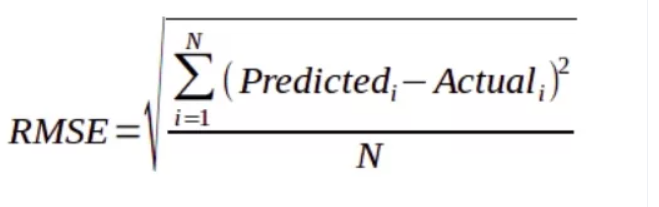

- Root Mean Square Error is the square root of the average of the squared differences between the estimated and the actual value of the variable/feature.
- Source- https://www.askpython.com/python/examples/rmse-root-mean-square-error

In [22]:
rmse_baseline_train = rms_error(x_train['meter_reading'], y_train)
rmse_baseline_cross_val = rms_error(x_cv['meter_reading'], y_cv)

In [23]:
print("Train data RMSE for baseline model is- ", rmse_baseline_train)
print("Cross-Validation data RMSE for baseline model is- ", rmse_baseline_cross_val)

Train data RMSE for baseline model is-  1.502
Cross-Validation data RMSE for baseline model is-  1.533


- The train and cross-validation RMSE are almost equal. So,
- Now we can move forward to train different regression models on this data.

In [24]:
y_train = x_train['meter_reading']
y_cv = x_cv['meter_reading']
x_train.drop(['meter_reading','baseline_y_predict'],axis=1,inplace=True)
x_train.columns

Index(['building_id', 'meter', 'site_id', 'primary_use', 'square_feet',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'hour', 'day_of_week', 'month', 'day_of_year', 'day',
       'year', 'relative_humidity', 'feels_like', 'holiday', 'season',
       'IsDayTime', 'latitude', 'solarHour', 'solarDec', 'horizsolar',
       'air_temperature_diff'],
      dtype='object')

In [25]:
x_cv.drop(['meter_reading','baseline_y_predict'],axis=1,inplace=True)
x_cv.columns

Index(['building_id', 'meter', 'site_id', 'primary_use', 'square_feet',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'hour', 'day_of_week', 'month', 'day_of_year', 'day',
       'year', 'relative_humidity', 'feels_like', 'holiday', 'season',
       'IsDayTime', 'latitude', 'solarHour', 'solarDec', 'horizsolar',
       'air_temperature_diff'],
      dtype='object')

### 4.3 Decision Tree Regressor Model

In [57]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

cross_val_error = []
tree_depth = [3,5,7,9,11,13,15]

for i in tqdm(tree_depth):
    dt_reg_model = DecisionTreeRegressor(max_depth=i,random_state=42)
    dt_reg_model.fit(x_train,y_train)
    predict_dt_model = dt_reg_model.predict(x_cv)
    x = np.sqrt(mean_squared_error(y_cv, predict_dt_model))
    cross_val_error.append(x)
    print('root mean square error for depth- ', i,' is ',x)

/tmp/ipykernel_20933/3711659591.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(tree_depth):


  0%|          | 0/7 [00:00<?, ?it/s]

root mean square error for depth-  3  is  1.4074611359894418
root mean square error for depth-  5  is  1.2349499578545307
root mean square error for depth-  7  is  1.1535380978128327
root mean square error for depth-  9  is  1.0719421793857151
root mean square error for depth-  11  is  0.9823350474462976
root mean square error for depth-  13  is  0.8947974608394551
root mean square error for depth-  15  is  0.8467626574909334


In [58]:
cross_val_error

[1.4074611359894418,
 1.2349499578545307,
 1.1535380978128327,
 1.0719421793857151,
 0.9823350474462976,
 0.8947974608394551,
 0.8467626574909334]

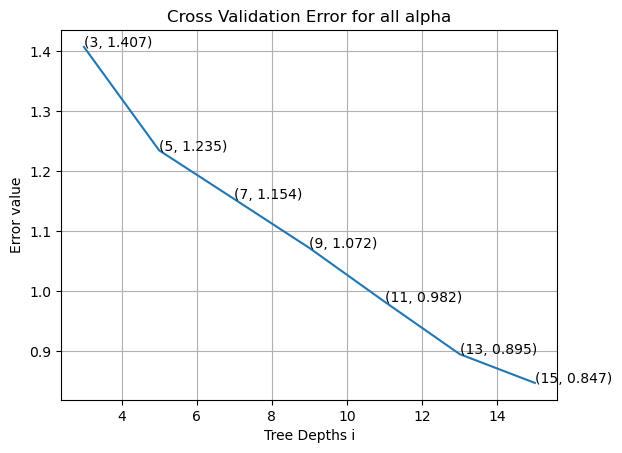

In [59]:
figure, axis = plt.subplots()
best_alpha = np.argmin(cross_val_error)
axis.plot(tree_depth, cross_val_error)

for i,j in enumerate(np.round(cross_val_error,3)):
    axis.annotate((tree_depth[i],np.round(j,3)),(tree_depth[i],cross_val_error[i]))

plt.title('Cross Validation Error for all alpha')
plt.xlabel('Tree Depths i')
plt.ylabel('Error value')
plt.grid()
plt.show()

In [60]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
dt_reg_model=DecisionTreeRegressor(max_depth=tree_depth[best_alpha],random_state=42)
dt_reg_model.fit(x_train,y_train)

pred_dt_reg_tr = dt_reg_model.predict(x_train)
pred_dt_reg_cv = dt_reg_model.predict(x_cv)

print('Train rmse for maximum tree depth:', tree_depth[best_alpha],'is',
      np.sqrt(mean_squared_error(y_train, pred_dt_reg_tr)))
print('CV rmse for maximum tree depth:', tree_depth[best_alpha],'is',
      np.sqrt(mean_squared_error(y_cv, pred_dt_reg_cv)))

Train rmse for maximum tree depth: 15 is 0.5783413889081825
CV rmse for maximum tree depth: 15 is 0.8467626574909334


- Saving trained model to .sav file, to be further used for prediction using test_data.

In [61]:
reg_file='DT_reg_model_2.sav'
joblib.dump(dt_reg_model,reg_file)

['DT_reg_model_2.sav']

### 4.4 LGBM GBDT Regressor Model

In [62]:
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

lgb_gbdt_estimators = [75,150,300,500,1000,1500,2000]
cross_val_error = []
for i in tqdm(lgb_gbdt_estimators):
    lgb_gbdt_reg = lgb.LGBMRegressor(boosting_type='gbdt',n_estimators=i,objective='regression',
                                     metric='rmse',n_jobs=-1)
    
    lgb_gbdt_reg.fit(x_train,y_train)
    pred_reg_lgb_gbdt = lgb_gbdt_reg.predict(x_cv)
    x = np.sqrt(mean_squared_error(y_cv, pred_reg_lgb_gbdt))
    cross_val_error.append(x)
    print('root mean square error for estimators-', i,'is',x)

 14%|█▍        | 1/7 [00:55<05:35, 55.88s/it]

root mean square error for estimators- 75 is 0.9332798946553943


 29%|██▊       | 2/7 [02:21<06:05, 73.19s/it]

root mean square error for estimators- 150 is 0.855372763859331


 43%|████▎     | 3/7 [04:38<06:49, 102.40s/it]

root mean square error for estimators- 300 is 0.7870077988068455


 57%|█████▋    | 4/7 [08:01<07:06, 142.20s/it]

root mean square error for estimators- 500 is 0.7312348414578236


 71%|███████▏  | 5/7 [14:06<07:25, 222.69s/it]

root mean square error for estimators- 1000 is 0.668427301569133


 86%|████████▌ | 6/7 [22:57<05:27, 327.31s/it]

root mean square error for estimators- 1500 is 0.6451105168248374


100%|██████████| 7/7 [34:19<00:00, 294.17s/it]

root mean square error for estimators- 2000 is 0.6352014074015946


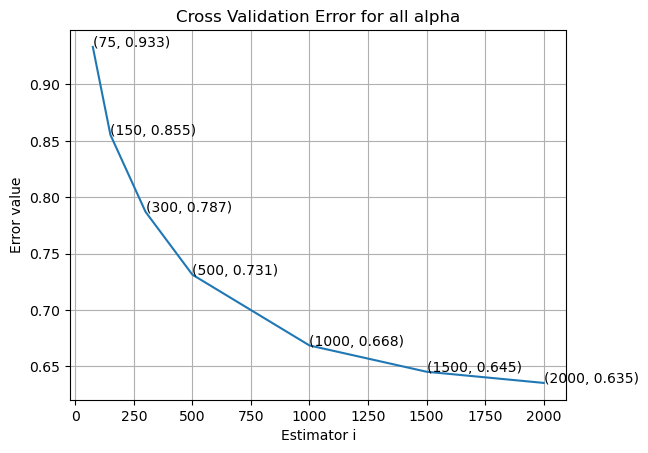

In [63]:
figure, axis = plt.subplots()
best_alpha = np.argmin(cross_val_error)
axis.plot(lgb_gbdt_estimators, cross_val_error)

for i, j in enumerate(np.round(cross_val_error,3)):
    axis.annotate((lgb_gbdt_estimators[i],np.round(j,3)), (lgb_gbdt_estimators[i],cross_val_error[i]))

plt.title('Cross Validation Error for all alpha')
plt.xlabel('Estimator i')
plt.ylabel('Error value')
plt.grid()
plt.show()

In [64]:
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
lgb_gbdt_reg = lgb.LGBMRegressor(boosting_type='gbdt',n_estimators=lgb_gbdt_estimators[best_alpha],
                               objective='regression',metric='rmse',n_jobs=-1)

lgb_gbdt_reg.fit(x_train,y_train)
pred_reg_gbdt_train = lgb_gbdt_reg.predict(x_train)
pred_reg_gbdt_cv = lgb_gbdt_reg.predict(x_cv)

print('Train root mean square error for best estimator- ', lgb_gbdt_estimators[best_alpha],'is',
      np.sqrt(mean_squared_error(y_train, pred_reg_gbdt_train)))

print('CV root mean square error for best estimator- ', lgb_gbdt_estimators[best_alpha],'is',
      np.sqrt(mean_squared_error(y_cv, pred_reg_gbdt_cv)))

Train root mean square error for best estimator-  2000 is 0.4429196570732845
CV root mean square error for best estimator-  2000 is 0.6352014074015943


- Saving trained model to .sav file, to be further used for prediction using test_data.

In [65]:
reg_file='LGBM_GBDT_reg_model_2.sav'
joblib.dump(lgb_gbdt_reg,reg_file)

['LGBM_GBDT_reg_model_2.sav']

### 4.5 Random Forest Regressor Model

In [54]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

cross_val_error = []
tree_depth = [3,5,7,9,11,13,15]

for i in tqdm(tree_depth):
    rf_reg_model = RandomForestRegressor(n_estimators=100,max_depth=i,random_state=42,criterion='mse',
                                         max_features='auto',n_jobs=-1)
    rf_reg_model.fit(x_train,y_train)
    predict_rf_model = rf_reg_model.predict(x_cv)
    x = np.sqrt(mean_squared_error(y_cv,predict_rf_model))
    cross_val_error.append(x)
    print('root mean square error for depth- ',i,'is',x)

/tmp/ipykernel_30155/2297965891.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(tree_depth):


  0%|          | 0/7 [00:00<?, ?it/s]

/home/nukul/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/nukul/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


root mean square error for depth-  3 is 1.4073457830213698


/home/nukul/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/nukul/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


root mean square error for depth-  5 is 1.2345753393564662


/home/nukul/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/nukul/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


root mean square error for depth-  7 is 1.1518721089916257


/home/nukul/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/nukul/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


root mean square error for depth-  9 is 1.0649073818754615


/home/nukul/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/nukul/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


root mean square error for depth-  11 is 0.971343480629271


/home/nukul/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/nukul/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


root mean square error for depth-  13 is 0.8696227683102083


/home/nukul/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/nukul/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


root mean square error for depth-  15 is 0.8160043025786359


In [55]:
cross_val_error

[1.4073457830213698,
 1.2345753393564662,
 1.1518721089916257,
 1.0649073818754615,
 0.971343480629271,
 0.8696227683102083,
 0.8160043025786359]

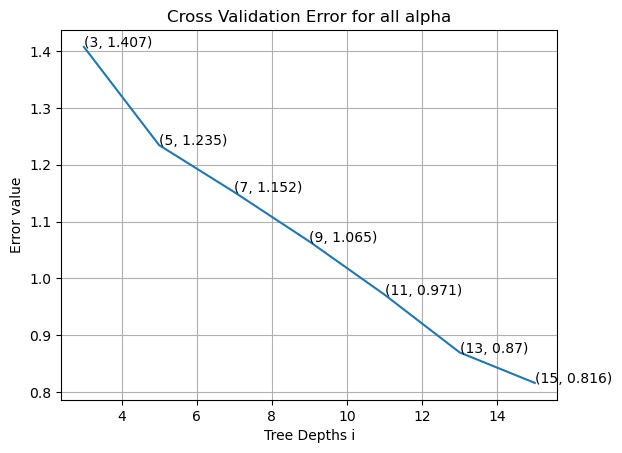

In [56]:
figure, axis = plt.subplots()
best_alpha = np.argmin(cross_val_error)
axis.plot(tree_depth, cross_val_error)

for i,j in enumerate(np.round(cross_val_error,3)):
    axis.annotate((tree_depth[i],np.round(j,3)),(tree_depth[i],cross_val_error[i]))

plt.title('Cross Validation Error for all alpha')
plt.xlabel('Tree Depths i')
plt.ylabel('Error value')
plt.grid()
plt.show()

In [57]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rf_reg_model = RandomForestRegressor(n_estimators=100,max_depth=tree_depth[best_alpha],random_state=42,
                                     criterion='mse',max_features=1.0,n_jobs=-1)
rf_reg_model.fit(x_train,y_train)

pred_rf_reg_train = rf_reg_model.predict(x_train)
pred_rf_reg_cv = rf_reg_model.predict(x_cv)

print('Train rmse for maximum tree depth-', tree_depth[best_alpha],'is',
      np.sqrt(mean_squared_error(y_train, pred_rf_reg_train)))
print('CV rmse for maximum tree depth-', tree_depth[best_alpha],'is',
      np.sqrt(mean_squared_error(y_cv, pred_rf_reg_cv)))

/home/nukul/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Train rmse for maximum tree depth- 15 is 0.5612830881246392
CV rmse for maximum tree depth- 15 is 0.8160043025786359


- Saving trained model to .sav file, to be further used for prediction using test_data.

In [58]:
reg_file='RF_reg_model.sav'
joblib.dump(rf_reg_model,reg_file)

['RF_reg_model.sav']

### 4.6 LGBM Random Forest Regressor Model

In [59]:
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
cross_val_error = []
lgb_rf_estimators = [75,150,300,500,1000,1500,2000]

for i in tqdm(lgb_rf_estimators):
    lgbm_rf_reg = lgb.LGBMRegressor(boosting_type='rf',n_estimators=i,objective='regression',metric='rmse',
                                    subsample=0.8,feature_fraction=0.8,bagging_freq=1,n_jobs=-1)
    
    lgbm_rf_reg.fit(x_train,y_train)
    pred_lgbm_rf_reg = lgbm_rf_reg.predict(x_cv)
    x = np.sqrt(mean_squared_error(y_cv, pred_lgbm_rf_reg))
    cross_val_error.append(x)
    print('root mean square error for best estimator- ',i,'is',x)

/tmp/ipykernel_30155/3865631196.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(lgb_rf_estimators):


  0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
root mean square error for best estimator-  75 is 1.177348104431798
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
root mean square error for best estimator-  150 is 1.179045114149917
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
root mean square error for best estimator-  300 is 1.1781449219622206
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current v

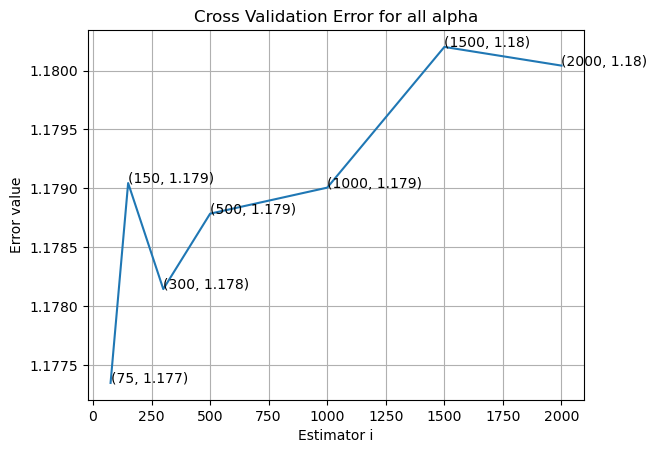

In [60]:
figure, axis = plt.subplots()
best_alpha = np.argmin(cross_val_error)
axis.plot(lgb_rf_estimators, cross_val_error)

for i, j in enumerate(np.round(cross_val_error,3)):
    axis.annotate((lgb_rf_estimators[i],np.round(j,3)),(lgb_rf_estimators[i],cross_val_error[i]))

plt.title('Cross Validation Error for all alpha')
plt.xlabel('Estimator i')
plt.ylabel('Error value')
plt.grid()
plt.show()

In [61]:
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
lgbm_rf_reg = lgb.LGBMRegressor(boosting_type='rf',n_estimators=lgb_rf_estimators[best_alpha], n_jobs=-1,
                                objective='regression',metric='rmse',subsample=0.8,feature_fraction=0.8,
                                bagging_freq=1)

lgbm_rf_reg.fit(x_train,y_train)
pred_reg_lgb_train = lgbm_rf_reg.predict(x_train)
pred_reg_lgb_cv = lgbm_rf_reg.predict(x_cv)

print('Train root mean square error for best estimator- ', lgb_rf_estimators[best_alpha],'is',
      np.sqrt(mean_squared_error(y_train, pred_reg_lgb_train)))
print('CV root mean square error for best estimator- ', lgb_rf_estimators[best_alpha],'is',
      np.sqrt(mean_squared_error(y_cv, pred_reg_lgb_cv)))

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Train root mean square error for best estimator-  75 is 1.1662576420183652
CV root mean square error for best estimator-  75 is 1.177348104431798


- Saving trained model to .sav file, to be further used for prediction using test_data.

In [62]:
reg_file = 'LGBM_RF_reg_model.sav'
joblib.dump(lgbm_rf_reg,reg_file)

['LGBM_RF_reg_model.sav']

### 4.7 Catboost Regressor Model

In [63]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 6.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 6.5 MB/s eta 0:00:00


In [63]:
x_train.dtypes

building_id               int16
meter                     int64
site_id                    int8
primary_use               int64
square_feet             float16
air_temperature         float16
cloud_coverage          float16
dew_temperature         float16
precip_depth_1_hr       float16
sea_level_pressure      float16
wind_direction          float16
wind_speed              float16
hour                       int8
day_of_week                int8
month                      int8
day_of_year               int16
day                        int8
year                      int16
relative_humidity       float16
feels_like              float16
holiday                    int8
season                    int64
IsDayTime                 int64
latitude                float64
solarHour                  int8
solarDec                float64
horizsolar              float64
air_temperature_diff    float16
dtype: object

In [64]:
# https://catboost.ai/en/docs/concepts/python-reference_catboostregressor

catb_estimators = [75,150,300,500,1000,1500]
cross_val_error = []

for i in tqdm(catb_estimators):
    catb_reg = catb.CatBoostRegressor(n_estimators=i)
    catb_reg.fit(x_train,y_train)
    pred_reg_catb = catb_reg.predict(x_cv)
    x = np.sqrt(mean_squared_error(y_cv, pred_reg_catb))
    cross_val_error.append(x)
    print('root mean square error for estimators:', i,'is',x)

/home/nukul/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/tmp/ipykernel_30155/1014134092.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(catb_estimators):


  0%|          | 0/6 [00:00<?, ?it/s]

Learning rate set to 0.5
0:	learn: 1.4256588	total: 1.04s	remaining: 1m 17s
1:	learn: 1.3054739	total: 2.06s	remaining: 1m 15s
2:	learn: 1.2029870	total: 3.14s	remaining: 1m 15s
3:	learn: 1.1492404	total: 4.36s	remaining: 1m 17s
4:	learn: 1.1206478	total: 5.44s	remaining: 1m 16s
5:	learn: 1.0990082	total: 6.32s	remaining: 1m 12s
6:	learn: 1.0851359	total: 7.51s	remaining: 1m 12s
7:	learn: 1.0698852	total: 8.63s	remaining: 1m 12s
8:	learn: 1.0536942	total: 9.71s	remaining: 1m 11s
9:	learn: 1.0443670	total: 10.8s	remaining: 1m 10s
10:	learn: 1.0395274	total: 11.8s	remaining: 1m 8s
11:	learn: 1.0329799	total: 12.9s	remaining: 1m 7s
12:	learn: 1.0210385	total: 14s	remaining: 1m 6s
13:	learn: 1.0123391	total: 15s	remaining: 1m 5s
14:	learn: 1.0070158	total: 16s	remaining: 1m 4s
15:	learn: 1.0028786	total: 16.9s	remaining: 1m 2s
16:	learn: 0.9949554	total: 17.9s	remaining: 1m 1s
17:	learn: 0.9888585	total: 18.9s	remaining: 1m
18:	learn: 0.9838628	total: 20.2s	remaining: 59.4s
19:	learn: 0.97

83:	learn: 0.8013439	total: 1m 30s	remaining: 1m 11s
84:	learn: 0.7982166	total: 1m 31s	remaining: 1m 10s
85:	learn: 0.7960804	total: 1m 32s	remaining: 1m 9s
86:	learn: 0.7935101	total: 1m 33s	remaining: 1m 7s
87:	learn: 0.7924524	total: 1m 34s	remaining: 1m 6s
88:	learn: 0.7907037	total: 1m 35s	remaining: 1m 5s
89:	learn: 0.7893914	total: 1m 36s	remaining: 1m 4s
90:	learn: 0.7877132	total: 1m 37s	remaining: 1m 3s
91:	learn: 0.7855711	total: 1m 39s	remaining: 1m 2s
92:	learn: 0.7842160	total: 1m 40s	remaining: 1m 1s
93:	learn: 0.7822400	total: 1m 41s	remaining: 1m
94:	learn: 0.7802697	total: 1m 42s	remaining: 59.2s
95:	learn: 0.7780402	total: 1m 43s	remaining: 58.2s
96:	learn: 0.7759884	total: 1m 44s	remaining: 57.2s
97:	learn: 0.7749222	total: 1m 45s	remaining: 56.1s
98:	learn: 0.7737451	total: 1m 46s	remaining: 54.9s
99:	learn: 0.7724987	total: 1m 47s	remaining: 53.8s
100:	learn: 0.7708894	total: 1m 48s	remaining: 52.7s
101:	learn: 0.7688551	total: 1m 49s	remaining: 51.6s
102:	learn:

89:	learn: 0.7855835	total: 1m 33s	remaining: 3m 37s
90:	learn: 0.7843162	total: 1m 34s	remaining: 3m 36s
91:	learn: 0.7822061	total: 1m 35s	remaining: 3m 35s
92:	learn: 0.7806348	total: 1m 36s	remaining: 3m 34s
93:	learn: 0.7783690	total: 1m 37s	remaining: 3m 34s
94:	learn: 0.7772428	total: 1m 38s	remaining: 3m 33s
95:	learn: 0.7761400	total: 1m 40s	remaining: 3m 32s
96:	learn: 0.7755033	total: 1m 40s	remaining: 3m 31s
97:	learn: 0.7742622	total: 1m 41s	remaining: 3m 29s
98:	learn: 0.7734130	total: 1m 42s	remaining: 3m 28s
99:	learn: 0.7704599	total: 1m 43s	remaining: 3m 27s
100:	learn: 0.7687549	total: 1m 44s	remaining: 3m 26s
101:	learn: 0.7675709	total: 1m 45s	remaining: 3m 25s
102:	learn: 0.7657767	total: 1m 47s	remaining: 3m 24s
103:	learn: 0.7646087	total: 1m 48s	remaining: 3m 23s
104:	learn: 0.7629377	total: 1m 49s	remaining: 3m 23s
105:	learn: 0.7618977	total: 1m 50s	remaining: 3m 22s
106:	learn: 0.7610955	total: 1m 51s	remaining: 3m 20s
107:	learn: 0.7604077	total: 1m 52s	rem

243:	learn: 0.6393243	total: 4m 15s	remaining: 58.7s
244:	learn: 0.6388659	total: 4m 16s	remaining: 57.6s
245:	learn: 0.6384591	total: 4m 17s	remaining: 56.6s
246:	learn: 0.6378489	total: 4m 18s	remaining: 55.5s
247:	learn: 0.6374189	total: 4m 19s	remaining: 54.5s
248:	learn: 0.6370321	total: 4m 20s	remaining: 53.4s
249:	learn: 0.6365412	total: 4m 21s	remaining: 52.3s
250:	learn: 0.6359847	total: 4m 22s	remaining: 51.3s
251:	learn: 0.6353844	total: 4m 23s	remaining: 50.2s
252:	learn: 0.6347603	total: 4m 24s	remaining: 49.2s
253:	learn: 0.6341299	total: 4m 25s	remaining: 48.1s
254:	learn: 0.6339591	total: 4m 26s	remaining: 47.1s
255:	learn: 0.6334837	total: 4m 28s	remaining: 46.1s
256:	learn: 0.6332382	total: 4m 29s	remaining: 45s
257:	learn: 0.6324740	total: 4m 30s	remaining: 44s
258:	learn: 0.6321135	total: 4m 31s	remaining: 43s
259:	learn: 0.6316728	total: 4m 32s	remaining: 41.9s
260:	learn: 0.6310991	total: 4m 33s	remaining: 40.8s
261:	learn: 0.6305757	total: 4m 34s	remaining: 39.8s

99:	learn: 0.8317908	total: 1m 43s	remaining: 6m 53s
100:	learn: 0.8308161	total: 1m 44s	remaining: 6m 52s
101:	learn: 0.8298100	total: 1m 45s	remaining: 6m 50s
102:	learn: 0.8279557	total: 1m 46s	remaining: 6m 49s
103:	learn: 0.8264354	total: 1m 47s	remaining: 6m 49s
104:	learn: 0.8257578	total: 1m 48s	remaining: 6m 47s
105:	learn: 0.8244652	total: 1m 49s	remaining: 6m 46s
106:	learn: 0.8230068	total: 1m 50s	remaining: 6m 46s
107:	learn: 0.8223412	total: 1m 51s	remaining: 6m 44s
108:	learn: 0.8177870	total: 1m 52s	remaining: 6m 44s
109:	learn: 0.8169678	total: 1m 53s	remaining: 6m 43s
110:	learn: 0.8148358	total: 1m 54s	remaining: 6m 42s
111:	learn: 0.8130341	total: 1m 56s	remaining: 6m 42s
112:	learn: 0.8116804	total: 1m 57s	remaining: 6m 40s
113:	learn: 0.8097470	total: 1m 57s	remaining: 6m 39s
114:	learn: 0.8075187	total: 1m 58s	remaining: 6m 38s
115:	learn: 0.8061734	total: 1m 59s	remaining: 6m 37s
116:	learn: 0.8054453	total: 2m	remaining: 6m 35s
117:	learn: 0.8040640	total: 2m 1

252:	learn: 0.6889181	total: 4m 24s	remaining: 4m 18s
253:	learn: 0.6886450	total: 4m 25s	remaining: 4m 17s
254:	learn: 0.6875670	total: 4m 26s	remaining: 4m 16s
255:	learn: 0.6867856	total: 4m 27s	remaining: 4m 15s
256:	learn: 0.6862369	total: 4m 28s	remaining: 4m 14s
257:	learn: 0.6853358	total: 4m 29s	remaining: 4m 13s
258:	learn: 0.6845904	total: 4m 30s	remaining: 4m 12s
259:	learn: 0.6840025	total: 4m 32s	remaining: 4m 11s
260:	learn: 0.6835740	total: 4m 33s	remaining: 4m 10s
261:	learn: 0.6829703	total: 4m 34s	remaining: 4m 9s
262:	learn: 0.6824144	total: 4m 35s	remaining: 4m 8s
263:	learn: 0.6819316	total: 4m 36s	remaining: 4m 6s
264:	learn: 0.6808846	total: 4m 37s	remaining: 4m 5s
265:	learn: 0.6805835	total: 4m 38s	remaining: 4m 4s
266:	learn: 0.6801785	total: 4m 39s	remaining: 4m 3s
267:	learn: 0.6797102	total: 4m 40s	remaining: 4m 2s
268:	learn: 0.6790107	total: 4m 41s	remaining: 4m 1s
269:	learn: 0.6785432	total: 4m 42s	remaining: 4m
270:	learn: 0.6783014	total: 4m 43s	rema

405:	learn: 0.6202387	total: 7m 5s	remaining: 1m 38s
406:	learn: 0.6197218	total: 7m 6s	remaining: 1m 37s
407:	learn: 0.6192645	total: 7m 7s	remaining: 1m 36s
408:	learn: 0.6189580	total: 7m 8s	remaining: 1m 35s
409:	learn: 0.6187185	total: 7m 9s	remaining: 1m 34s
410:	learn: 0.6185256	total: 7m 10s	remaining: 1m 33s
411:	learn: 0.6182428	total: 7m 11s	remaining: 1m 32s
412:	learn: 0.6179022	total: 7m 12s	remaining: 1m 31s
413:	learn: 0.6173445	total: 7m 13s	remaining: 1m 30s
414:	learn: 0.6165342	total: 7m 14s	remaining: 1m 29s
415:	learn: 0.6162335	total: 7m 15s	remaining: 1m 28s
416:	learn: 0.6157165	total: 7m 16s	remaining: 1m 26s
417:	learn: 0.6155445	total: 7m 17s	remaining: 1m 25s
418:	learn: 0.6150730	total: 7m 19s	remaining: 1m 24s
419:	learn: 0.6149122	total: 7m 20s	remaining: 1m 23s
420:	learn: 0.6143434	total: 7m 21s	remaining: 1m 22s
421:	learn: 0.6132679	total: 7m 22s	remaining: 1m 21s
422:	learn: 0.6128040	total: 7m 23s	remaining: 1m 20s
423:	learn: 0.6124651	total: 7m 2

59:	learn: 0.9571899	total: 1m 1s	remaining: 15m 59s
60:	learn: 0.9555492	total: 1m 2s	remaining: 15m 57s
61:	learn: 0.9542360	total: 1m 3s	remaining: 15m 56s
62:	learn: 0.9530656	total: 1m 4s	remaining: 15m 55s
63:	learn: 0.9510863	total: 1m 5s	remaining: 15m 53s
64:	learn: 0.9494925	total: 1m 6s	remaining: 15m 53s
65:	learn: 0.9470531	total: 1m 7s	remaining: 15m 52s
66:	learn: 0.9455898	total: 1m 8s	remaining: 15m 51s
67:	learn: 0.9449869	total: 1m 9s	remaining: 15m 50s
68:	learn: 0.9442056	total: 1m 10s	remaining: 15m 48s
69:	learn: 0.9424694	total: 1m 11s	remaining: 15m 46s
70:	learn: 0.9413968	total: 1m 12s	remaining: 15m 43s
71:	learn: 0.9401017	total: 1m 13s	remaining: 15m 42s
72:	learn: 0.9383028	total: 1m 14s	remaining: 15m 42s
73:	learn: 0.9365829	total: 1m 15s	remaining: 15m 41s
74:	learn: 0.9350940	total: 1m 16s	remaining: 15m 42s
75:	learn: 0.9340945	total: 1m 17s	remaining: 15m 41s
76:	learn: 0.9327590	total: 1m 18s	remaining: 15m 41s
77:	learn: 0.9311829	total: 1m 19s	re

210:	learn: 0.8017706	total: 3m 37s	remaining: 13m 34s
211:	learn: 0.8008423	total: 3m 38s	remaining: 13m 33s
212:	learn: 0.8003946	total: 3m 39s	remaining: 13m 32s
213:	learn: 0.8000173	total: 3m 40s	remaining: 13m 30s
214:	learn: 0.7991468	total: 3m 41s	remaining: 13m 30s
215:	learn: 0.7985471	total: 3m 42s	remaining: 13m 29s
216:	learn: 0.7978094	total: 3m 43s	remaining: 13m 27s
217:	learn: 0.7967585	total: 3m 44s	remaining: 13m 27s
218:	learn: 0.7961658	total: 3m 46s	remaining: 13m 26s
219:	learn: 0.7952972	total: 3m 47s	remaining: 13m 25s
220:	learn: 0.7945319	total: 3m 48s	remaining: 13m 24s
221:	learn: 0.7934371	total: 3m 49s	remaining: 13m 24s
222:	learn: 0.7930316	total: 3m 50s	remaining: 13m 23s
223:	learn: 0.7923252	total: 3m 51s	remaining: 13m 22s
224:	learn: 0.7918304	total: 3m 52s	remaining: 13m 20s
225:	learn: 0.7911818	total: 3m 53s	remaining: 13m 18s
226:	learn: 0.7906961	total: 3m 54s	remaining: 13m 18s
227:	learn: 0.7899115	total: 3m 55s	remaining: 13m 17s
228:	learn

361:	learn: 0.7173177	total: 6m 16s	remaining: 11m 4s
362:	learn: 0.7168015	total: 6m 17s	remaining: 11m 3s
363:	learn: 0.7161713	total: 6m 18s	remaining: 11m 2s
364:	learn: 0.7158859	total: 6m 19s	remaining: 11m 1s
365:	learn: 0.7153431	total: 6m 21s	remaining: 11m
366:	learn: 0.7148445	total: 6m 22s	remaining: 10m 59s
367:	learn: 0.7144564	total: 6m 23s	remaining: 10m 58s
368:	learn: 0.7142839	total: 6m 24s	remaining: 10m 57s
369:	learn: 0.7139993	total: 6m 25s	remaining: 10m 55s
370:	learn: 0.7138598	total: 6m 26s	remaining: 10m 54s
371:	learn: 0.7135384	total: 6m 27s	remaining: 10m 53s
372:	learn: 0.7133840	total: 6m 28s	remaining: 10m 52s
373:	learn: 0.7128799	total: 6m 29s	remaining: 10m 51s
374:	learn: 0.7125158	total: 6m 30s	remaining: 10m 50s
375:	learn: 0.7121004	total: 6m 31s	remaining: 10m 49s
376:	learn: 0.7110253	total: 6m 32s	remaining: 10m 48s
377:	learn: 0.7104998	total: 6m 33s	remaining: 10m 47s
378:	learn: 0.7099286	total: 6m 34s	remaining: 10m 46s
379:	learn: 0.7096

513:	learn: 0.6661822	total: 8m 55s	remaining: 8m 26s
514:	learn: 0.6659896	total: 8m 56s	remaining: 8m 25s
515:	learn: 0.6657188	total: 8m 57s	remaining: 8m 24s
516:	learn: 0.6652768	total: 8m 58s	remaining: 8m 23s
517:	learn: 0.6646626	total: 9m	remaining: 8m 22s
518:	learn: 0.6643006	total: 9m 1s	remaining: 8m 21s
519:	learn: 0.6640920	total: 9m 2s	remaining: 8m 20s
520:	learn: 0.6638735	total: 9m 3s	remaining: 8m 19s
521:	learn: 0.6637191	total: 9m 3s	remaining: 8m 18s
522:	learn: 0.6634289	total: 9m 4s	remaining: 8m 17s
523:	learn: 0.6632446	total: 9m 6s	remaining: 8m 15s
524:	learn: 0.6627849	total: 9m 7s	remaining: 8m 15s
525:	learn: 0.6625519	total: 9m 8s	remaining: 8m 14s
526:	learn: 0.6622300	total: 9m 9s	remaining: 8m 13s
527:	learn: 0.6619609	total: 9m 10s	remaining: 8m 11s
528:	learn: 0.6617846	total: 9m 11s	remaining: 8m 10s
529:	learn: 0.6613079	total: 9m 12s	remaining: 8m 9s
530:	learn: 0.6611248	total: 9m 13s	remaining: 8m 8s
531:	learn: 0.6607183	total: 9m 14s	remaini

665:	learn: 0.6281082	total: 11m 36s	remaining: 5m 49s
666:	learn: 0.6279337	total: 11m 37s	remaining: 5m 48s
667:	learn: 0.6278131	total: 11m 38s	remaining: 5m 47s
668:	learn: 0.6275500	total: 11m 39s	remaining: 5m 46s
669:	learn: 0.6273407	total: 11m 40s	remaining: 5m 45s
670:	learn: 0.6271884	total: 11m 42s	remaining: 5m 44s
671:	learn: 0.6269014	total: 11m 43s	remaining: 5m 43s
672:	learn: 0.6267341	total: 11m 44s	remaining: 5m 42s
673:	learn: 0.6266035	total: 11m 45s	remaining: 5m 41s
674:	learn: 0.6264564	total: 11m 46s	remaining: 5m 40s
675:	learn: 0.6263338	total: 11m 47s	remaining: 5m 39s
676:	learn: 0.6261639	total: 11m 48s	remaining: 5m 38s
677:	learn: 0.6260656	total: 11m 49s	remaining: 5m 36s
678:	learn: 0.6257962	total: 11m 50s	remaining: 5m 35s
679:	learn: 0.6256540	total: 11m 51s	remaining: 5m 34s
680:	learn: 0.6255008	total: 11m 52s	remaining: 5m 33s
681:	learn: 0.6252836	total: 11m 53s	remaining: 5m 32s
682:	learn: 0.6251841	total: 11m 54s	remaining: 5m 31s
683:	learn

816:	learn: 0.6009635	total: 14m 15s	remaining: 3m 11s
817:	learn: 0.6007363	total: 14m 16s	remaining: 3m 10s
818:	learn: 0.6003572	total: 14m 17s	remaining: 3m 9s
819:	learn: 0.6001795	total: 14m 19s	remaining: 3m 8s
820:	learn: 0.6000546	total: 14m 20s	remaining: 3m 7s
821:	learn: 0.5999000	total: 14m 21s	remaining: 3m 6s
822:	learn: 0.5996927	total: 14m 22s	remaining: 3m 5s
823:	learn: 0.5995568	total: 14m 23s	remaining: 3m 4s
824:	learn: 0.5995042	total: 14m 24s	remaining: 3m 3s
825:	learn: 0.5993479	total: 14m 25s	remaining: 3m 2s
826:	learn: 0.5991431	total: 14m 26s	remaining: 3m 1s
827:	learn: 0.5990611	total: 14m 27s	remaining: 3m
828:	learn: 0.5989054	total: 14m 28s	remaining: 2m 59s
829:	learn: 0.5987259	total: 14m 29s	remaining: 2m 58s
830:	learn: 0.5985598	total: 14m 30s	remaining: 2m 57s
831:	learn: 0.5984612	total: 14m 31s	remaining: 2m 56s
832:	learn: 0.5982111	total: 14m 32s	remaining: 2m 54s
833:	learn: 0.5980099	total: 14m 34s	remaining: 2m 53s
834:	learn: 0.5975559	t

967:	learn: 0.5794861	total: 16m 52s	remaining: 33.5s
968:	learn: 0.5794717	total: 16m 53s	remaining: 32.4s
969:	learn: 0.5793981	total: 16m 54s	remaining: 31.4s
970:	learn: 0.5792783	total: 16m 55s	remaining: 30.3s
971:	learn: 0.5791431	total: 16m 56s	remaining: 29.3s
972:	learn: 0.5788831	total: 16m 57s	remaining: 28.2s
973:	learn: 0.5787441	total: 16m 58s	remaining: 27.2s
974:	learn: 0.5786413	total: 16m 59s	remaining: 26.1s
975:	learn: 0.5785863	total: 17m	remaining: 25.1s
976:	learn: 0.5784763	total: 17m 1s	remaining: 24s
977:	learn: 0.5782115	total: 17m 2s	remaining: 23s
978:	learn: 0.5780404	total: 17m 3s	remaining: 22s
979:	learn: 0.5779549	total: 17m 4s	remaining: 20.9s
980:	learn: 0.5778491	total: 17m 5s	remaining: 19.9s
981:	learn: 0.5777272	total: 17m 6s	remaining: 18.8s
982:	learn: 0.5776298	total: 17m 7s	remaining: 17.8s
983:	learn: 0.5775810	total: 17m 8s	remaining: 16.7s
984:	learn: 0.5774712	total: 17m 9s	remaining: 15.7s
985:	learn: 0.5772412	total: 17m 10s	remaining:

120:	learn: 0.9165110	total: 2m 4s	remaining: 23m 41s
121:	learn: 0.9158328	total: 2m 5s	remaining: 23m 39s
122:	learn: 0.9151704	total: 2m 6s	remaining: 23m 37s
123:	learn: 0.9143332	total: 2m 7s	remaining: 23m 36s
124:	learn: 0.9136549	total: 2m 8s	remaining: 23m 36s
125:	learn: 0.9120182	total: 2m 9s	remaining: 23m 35s
126:	learn: 0.9111311	total: 2m 10s	remaining: 23m 33s
127:	learn: 0.9103411	total: 2m 11s	remaining: 23m 32s
128:	learn: 0.9097708	total: 2m 12s	remaining: 23m 30s
129:	learn: 0.9087789	total: 2m 13s	remaining: 23m 28s
130:	learn: 0.9076690	total: 2m 14s	remaining: 23m 28s
131:	learn: 0.9064981	total: 2m 15s	remaining: 23m 27s
132:	learn: 0.9059605	total: 2m 16s	remaining: 23m 27s
133:	learn: 0.9055460	total: 2m 17s	remaining: 23m 25s
134:	learn: 0.9045546	total: 2m 18s	remaining: 23m 25s
135:	learn: 0.9039630	total: 2m 20s	remaining: 23m 26s
136:	learn: 0.9031413	total: 2m 21s	remaining: 23m 24s
137:	learn: 0.9027513	total: 2m 22s	remaining: 23m 23s
138:	learn: 0.90

270:	learn: 0.8130915	total: 4m 40s	remaining: 21m 13s
271:	learn: 0.8126433	total: 4m 41s	remaining: 21m 12s
272:	learn: 0.8119225	total: 4m 42s	remaining: 21m 11s
273:	learn: 0.8111891	total: 4m 43s	remaining: 21m 10s
274:	learn: 0.8106706	total: 4m 45s	remaining: 21m 9s
275:	learn: 0.8099771	total: 4m 46s	remaining: 21m 9s
276:	learn: 0.8097899	total: 4m 47s	remaining: 21m 7s
277:	learn: 0.8094141	total: 4m 48s	remaining: 21m 6s
278:	learn: 0.8091155	total: 4m 49s	remaining: 21m 5s
279:	learn: 0.8086493	total: 4m 50s	remaining: 21m 4s
280:	learn: 0.8081751	total: 4m 51s	remaining: 21m 3s
281:	learn: 0.8077933	total: 4m 52s	remaining: 21m 2s
282:	learn: 0.8074451	total: 4m 53s	remaining: 21m 1s
283:	learn: 0.8069821	total: 4m 54s	remaining: 20m 59s
284:	learn: 0.8068019	total: 4m 55s	remaining: 20m 58s
285:	learn: 0.8063832	total: 4m 56s	remaining: 20m 56s
286:	learn: 0.8061469	total: 4m 57s	remaining: 20m 55s
287:	learn: 0.8056266	total: 4m 58s	remaining: 20m 54s
288:	learn: 0.80481

421:	learn: 0.7465814	total: 7m 18s	remaining: 18m 40s
422:	learn: 0.7459477	total: 7m 19s	remaining: 18m 39s
423:	learn: 0.7456195	total: 7m 20s	remaining: 18m 38s
424:	learn: 0.7452331	total: 7m 21s	remaining: 18m 37s
425:	learn: 0.7450016	total: 7m 23s	remaining: 18m 37s
426:	learn: 0.7445046	total: 7m 24s	remaining: 18m 36s
427:	learn: 0.7441246	total: 7m 25s	remaining: 18m 35s
428:	learn: 0.7438386	total: 7m 26s	remaining: 18m 34s
429:	learn: 0.7435989	total: 7m 27s	remaining: 18m 32s
430:	learn: 0.7432124	total: 7m 28s	remaining: 18m 31s
431:	learn: 0.7429039	total: 7m 29s	remaining: 18m 30s
432:	learn: 0.7425287	total: 7m 30s	remaining: 18m 29s
433:	learn: 0.7421915	total: 7m 31s	remaining: 18m 28s
434:	learn: 0.7418574	total: 7m 32s	remaining: 18m 27s
435:	learn: 0.7415727	total: 7m 33s	remaining: 18m 26s
436:	learn: 0.7410916	total: 7m 34s	remaining: 18m 25s
437:	learn: 0.7406640	total: 7m 35s	remaining: 18m 24s
438:	learn: 0.7404778	total: 7m 36s	remaining: 18m 23s
439:	learn

572:	learn: 0.7015206	total: 9m 57s	remaining: 16m 5s
573:	learn: 0.7011600	total: 9m 58s	remaining: 16m 4s
574:	learn: 0.7009047	total: 9m 59s	remaining: 16m 3s
575:	learn: 0.7007515	total: 10m	remaining: 16m 2s
576:	learn: 0.7004776	total: 10m 1s	remaining: 16m 1s
577:	learn: 0.7001228	total: 10m 2s	remaining: 16m
578:	learn: 0.7000214	total: 10m 3s	remaining: 15m 59s
579:	learn: 0.6998610	total: 10m 4s	remaining: 15m 58s
580:	learn: 0.6996477	total: 10m 5s	remaining: 15m 57s
581:	learn: 0.6995360	total: 10m 6s	remaining: 15m 56s
582:	learn: 0.6991716	total: 10m 7s	remaining: 15m 55s
583:	learn: 0.6988925	total: 10m 8s	remaining: 15m 54s
584:	learn: 0.6986870	total: 10m 9s	remaining: 15m 53s
585:	learn: 0.6983819	total: 10m 10s	remaining: 15m 52s
586:	learn: 0.6982113	total: 10m 11s	remaining: 15m 51s
587:	learn: 0.6978633	total: 10m 12s	remaining: 15m 50s
588:	learn: 0.6977072	total: 10m 13s	remaining: 15m 49s
589:	learn: 0.6973833	total: 10m 14s	remaining: 15m 48s
590:	learn: 0.697

720:	learn: 0.6663251	total: 12m 32s	remaining: 13m 32s
721:	learn: 0.6660902	total: 12m 33s	remaining: 13m 31s
722:	learn: 0.6659306	total: 12m 34s	remaining: 13m 30s
723:	learn: 0.6658384	total: 12m 35s	remaining: 13m 29s
724:	learn: 0.6656674	total: 12m 36s	remaining: 13m 28s
725:	learn: 0.6653373	total: 12m 37s	remaining: 13m 27s
726:	learn: 0.6651058	total: 12m 38s	remaining: 13m 26s
727:	learn: 0.6649268	total: 12m 39s	remaining: 13m 25s
728:	learn: 0.6647582	total: 12m 40s	remaining: 13m 24s
729:	learn: 0.6645624	total: 12m 41s	remaining: 13m 23s
730:	learn: 0.6643619	total: 12m 42s	remaining: 13m 22s
731:	learn: 0.6642127	total: 12m 43s	remaining: 13m 21s
732:	learn: 0.6640833	total: 12m 44s	remaining: 13m 19s
733:	learn: 0.6639798	total: 12m 45s	remaining: 13m 18s
734:	learn: 0.6638124	total: 12m 46s	remaining: 13m 17s
735:	learn: 0.6636941	total: 12m 47s	remaining: 13m 16s
736:	learn: 0.6635158	total: 12m 48s	remaining: 13m 15s
737:	learn: 0.6630838	total: 12m 49s	remaining: 

868:	learn: 0.6394098	total: 15m 7s	remaining: 10m 58s
869:	learn: 0.6392446	total: 15m 8s	remaining: 10m 57s
870:	learn: 0.6390744	total: 15m 9s	remaining: 10m 56s
871:	learn: 0.6389267	total: 15m 10s	remaining: 10m 55s
872:	learn: 0.6387211	total: 15m 11s	remaining: 10m 54s
873:	learn: 0.6384785	total: 15m 12s	remaining: 10m 53s
874:	learn: 0.6383189	total: 15m 13s	remaining: 10m 52s
875:	learn: 0.6381599	total: 15m 14s	remaining: 10m 51s
876:	learn: 0.6380830	total: 15m 15s	remaining: 10m 50s
877:	learn: 0.6378252	total: 15m 16s	remaining: 10m 49s
878:	learn: 0.6376181	total: 15m 17s	remaining: 10m 48s
879:	learn: 0.6375349	total: 15m 18s	remaining: 10m 47s
880:	learn: 0.6374843	total: 15m 19s	remaining: 10m 46s
881:	learn: 0.6374042	total: 15m 20s	remaining: 10m 45s
882:	learn: 0.6372150	total: 15m 21s	remaining: 10m 43s
883:	learn: 0.6370560	total: 15m 22s	remaining: 10m 43s
884:	learn: 0.6369522	total: 15m 24s	remaining: 10m 42s
885:	learn: 0.6368130	total: 15m 25s	remaining: 10m

1017:	learn: 0.6183512	total: 17m 45s	remaining: 8m 24s
1018:	learn: 0.6182569	total: 17m 46s	remaining: 8m 23s
1019:	learn: 0.6181855	total: 17m 47s	remaining: 8m 22s
1020:	learn: 0.6181153	total: 17m 48s	remaining: 8m 21s
1021:	learn: 0.6180052	total: 17m 49s	remaining: 8m 20s
1022:	learn: 0.6179587	total: 17m 50s	remaining: 8m 19s
1023:	learn: 0.6178559	total: 17m 51s	remaining: 8m 18s
1024:	learn: 0.6177556	total: 17m 52s	remaining: 8m 17s
1025:	learn: 0.6176903	total: 17m 53s	remaining: 8m 16s
1026:	learn: 0.6174553	total: 17m 55s	remaining: 8m 15s
1027:	learn: 0.6173456	total: 17m 56s	remaining: 8m 14s
1028:	learn: 0.6172906	total: 17m 57s	remaining: 8m 13s
1029:	learn: 0.6172002	total: 17m 58s	remaining: 8m 12s
1030:	learn: 0.6171044	total: 17m 59s	remaining: 8m 11s
1031:	learn: 0.6170269	total: 18m	remaining: 8m 10s
1032:	learn: 0.6169543	total: 18m 1s	remaining: 8m 9s
1033:	learn: 0.6168447	total: 18m 2s	remaining: 8m 8s
1034:	learn: 0.6167008	total: 18m 4s	remaining: 8m 7s
10

1165:	learn: 0.6019410	total: 20m 25s	remaining: 5m 50s
1166:	learn: 0.6018501	total: 20m 26s	remaining: 5m 49s
1167:	learn: 0.6017319	total: 20m 27s	remaining: 5m 48s
1168:	learn: 0.6016168	total: 20m 28s	remaining: 5m 47s
1169:	learn: 0.6015612	total: 20m 29s	remaining: 5m 46s
1170:	learn: 0.6015182	total: 20m 30s	remaining: 5m 45s
1171:	learn: 0.6014232	total: 20m 31s	remaining: 5m 44s
1172:	learn: 0.6012533	total: 20m 32s	remaining: 5m 43s
1173:	learn: 0.6011144	total: 20m 33s	remaining: 5m 42s
1174:	learn: 0.6010152	total: 20m 34s	remaining: 5m 41s
1175:	learn: 0.6009472	total: 20m 35s	remaining: 5m 40s
1176:	learn: 0.6008350	total: 20m 36s	remaining: 5m 39s
1177:	learn: 0.6005958	total: 20m 38s	remaining: 5m 38s
1178:	learn: 0.6005487	total: 20m 38s	remaining: 5m 37s
1179:	learn: 0.6004283	total: 20m 40s	remaining: 5m 36s
1180:	learn: 0.6003188	total: 20m 41s	remaining: 5m 35s
1181:	learn: 0.6002572	total: 20m 42s	remaining: 5m 34s
1182:	learn: 0.6001714	total: 20m 43s	remaining:

1313:	learn: 0.5871863	total: 23m	remaining: 3m 15s
1314:	learn: 0.5871378	total: 23m 1s	remaining: 3m 14s
1315:	learn: 0.5870383	total: 23m 2s	remaining: 3m 13s
1316:	learn: 0.5869963	total: 23m 3s	remaining: 3m 12s
1317:	learn: 0.5868945	total: 23m 4s	remaining: 3m 11s
1318:	learn: 0.5867971	total: 23m 6s	remaining: 3m 10s
1319:	learn: 0.5867226	total: 23m 7s	remaining: 3m 9s
1320:	learn: 0.5866693	total: 23m 8s	remaining: 3m 8s
1321:	learn: 0.5865850	total: 23m 9s	remaining: 3m 7s
1322:	learn: 0.5865149	total: 23m 10s	remaining: 3m 6s
1323:	learn: 0.5864134	total: 23m 11s	remaining: 3m 5s
1324:	learn: 0.5863589	total: 23m 12s	remaining: 3m 3s
1325:	learn: 0.5862582	total: 23m 13s	remaining: 3m 2s
1326:	learn: 0.5861510	total: 23m 14s	remaining: 3m 1s
1327:	learn: 0.5861134	total: 23m 15s	remaining: 3m
1328:	learn: 0.5860091	total: 23m 16s	remaining: 2m 59s
1329:	learn: 0.5859243	total: 23m 17s	remaining: 2m 58s
1330:	learn: 0.5858633	total: 23m 18s	remaining: 2m 57s
1331:	learn: 0.5

1461:	learn: 0.5750367	total: 25m 37s	remaining: 40s
1462:	learn: 0.5749918	total: 25m 39s	remaining: 38.9s
1463:	learn: 0.5749063	total: 25m 40s	remaining: 37.9s
1464:	learn: 0.5748372	total: 25m 41s	remaining: 36.8s
1465:	learn: 0.5746378	total: 25m 42s	remaining: 35.8s
1466:	learn: 0.5745733	total: 25m 43s	remaining: 34.7s
1467:	learn: 0.5744677	total: 25m 44s	remaining: 33.7s
1468:	learn: 0.5743398	total: 25m 45s	remaining: 32.6s
1469:	learn: 0.5742602	total: 25m 46s	remaining: 31.6s
1470:	learn: 0.5741943	total: 25m 47s	remaining: 30.5s
1471:	learn: 0.5741151	total: 25m 48s	remaining: 29.5s
1472:	learn: 0.5740671	total: 25m 49s	remaining: 28.4s
1473:	learn: 0.5740057	total: 25m 50s	remaining: 27.4s
1474:	learn: 0.5738964	total: 25m 51s	remaining: 26.3s
1475:	learn: 0.5738580	total: 25m 52s	remaining: 25.2s
1476:	learn: 0.5737862	total: 25m 53s	remaining: 24.2s
1477:	learn: 0.5736790	total: 25m 54s	remaining: 23.1s
1478:	learn: 0.5736033	total: 25m 55s	remaining: 22.1s
1479:	learn:

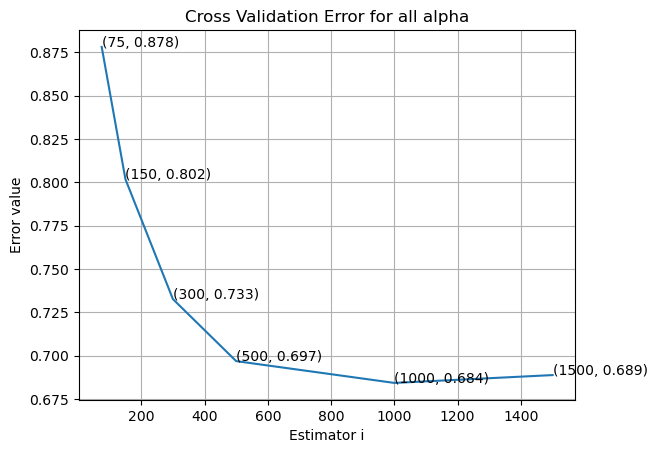

In [65]:
figure, axis = plt.subplots()
best_alpha = np.argmin(cross_val_error)
axis.plot(catb_estimators, cross_val_error)
for i, j in enumerate(np.round(cross_val_error,3)):
    axis.annotate((catb_estimators[i],np.round(j,3)),(catb_estimators[i],cross_val_error[i]))

plt.title('Cross Validation Error for all alpha')
plt.xlabel('Estimator i')
plt.ylabel('Error value')
plt.grid()
plt.show()

In [66]:
# https://catboost.ai/en/docs/concepts/python-reference_catboostregressor

catb_reg = catb.CatBoostRegressor(n_estimators=catb_estimators[best_alpha])
catb_reg.fit(x_train,y_train)
pred_reg_catb_train = catb_reg.predict(x_train)
pred_reg_catb_cv = catb_reg.predict(x_cv)
print('Train root mean square error for best estimator- ', catb_estimators[best_alpha],'is',
      np.sqrt(mean_squared_error(y_train, pred_reg_catb_train)))
print('CV root mean square error for best estimator- ', catb_estimators[best_alpha],'is',
      np.sqrt(mean_squared_error(y_cv, pred_reg_catb_cv)))

Learning rate set to 0.186392
0:	learn: 1.6179255	total: 997ms	remaining: 16m 36s
1:	learn: 1.5111070	total: 2.13s	remaining: 17m 45s
2:	learn: 1.4329602	total: 3.19s	remaining: 17m 41s
3:	learn: 1.3763950	total: 4.17s	remaining: 17m 18s
4:	learn: 1.3189514	total: 5.41s	remaining: 17m 57s
5:	learn: 1.2859876	total: 6.39s	remaining: 17m 38s
6:	learn: 1.2492363	total: 7.47s	remaining: 17m 40s
7:	learn: 1.2203475	total: 8.58s	remaining: 17m 44s
8:	learn: 1.1988705	total: 9.64s	remaining: 17m 41s
9:	learn: 1.1782391	total: 10.7s	remaining: 17m 34s
10:	learn: 1.1649251	total: 11.7s	remaining: 17m 30s
11:	learn: 1.1473620	total: 12.8s	remaining: 17m 30s
12:	learn: 1.1380241	total: 13.9s	remaining: 17m 33s
13:	learn: 1.1237858	total: 15s	remaining: 17m 36s
14:	learn: 1.1161676	total: 16.1s	remaining: 17m 35s
15:	learn: 1.1067190	total: 17.1s	remaining: 17m 32s
16:	learn: 1.0985241	total: 18.1s	remaining: 17m 26s
17:	learn: 1.0928582	total: 19s	remaining: 17m 18s
18:	learn: 1.0862477	total: 20

153:	learn: 0.8452663	total: 2m 38s	remaining: 14m 31s
154:	learn: 0.8439862	total: 2m 39s	remaining: 14m 30s
155:	learn: 0.8434620	total: 2m 40s	remaining: 14m 30s
156:	learn: 0.8425245	total: 2m 41s	remaining: 14m 29s
157:	learn: 0.8418658	total: 2m 43s	remaining: 14m 28s
158:	learn: 0.8411433	total: 2m 44s	remaining: 14m 27s
159:	learn: 0.8406503	total: 2m 45s	remaining: 14m 27s
160:	learn: 0.8396363	total: 2m 46s	remaining: 14m 26s
161:	learn: 0.8385871	total: 2m 47s	remaining: 14m 25s
162:	learn: 0.8378188	total: 2m 48s	remaining: 14m 24s
163:	learn: 0.8370982	total: 2m 49s	remaining: 14m 23s
164:	learn: 0.8359283	total: 2m 50s	remaining: 14m 22s
165:	learn: 0.8351863	total: 2m 51s	remaining: 14m 21s
166:	learn: 0.8339993	total: 2m 52s	remaining: 14m 20s
167:	learn: 0.8334314	total: 2m 53s	remaining: 14m 19s
168:	learn: 0.8330578	total: 2m 54s	remaining: 14m 17s
169:	learn: 0.8324659	total: 2m 55s	remaining: 14m 16s
170:	learn: 0.8320127	total: 2m 56s	remaining: 14m 14s
171:	learn

304:	learn: 0.7436297	total: 5m 18s	remaining: 12m 4s
305:	learn: 0.7433412	total: 5m 18s	remaining: 12m 3s
306:	learn: 0.7427055	total: 5m 20s	remaining: 12m 2s
307:	learn: 0.7424895	total: 5m 20s	remaining: 12m 1s
308:	learn: 0.7419546	total: 5m 21s	remaining: 11m 59s
309:	learn: 0.7416916	total: 5m 22s	remaining: 11m 58s
310:	learn: 0.7414637	total: 5m 23s	remaining: 11m 57s
311:	learn: 0.7413131	total: 5m 25s	remaining: 11m 56s
312:	learn: 0.7410655	total: 5m 25s	remaining: 11m 55s
313:	learn: 0.7406248	total: 5m 26s	remaining: 11m 54s
314:	learn: 0.7403715	total: 5m 28s	remaining: 11m 53s
315:	learn: 0.7399021	total: 5m 29s	remaining: 11m 52s
316:	learn: 0.7394020	total: 5m 30s	remaining: 11m 51s
317:	learn: 0.7387351	total: 5m 31s	remaining: 11m 50s
318:	learn: 0.7383992	total: 5m 32s	remaining: 11m 49s
319:	learn: 0.7378445	total: 5m 33s	remaining: 11m 48s
320:	learn: 0.7374778	total: 5m 34s	remaining: 11m 47s
321:	learn: 0.7372989	total: 5m 35s	remaining: 11m 46s
322:	learn: 0.

455:	learn: 0.6833026	total: 7m 55s	remaining: 9m 27s
456:	learn: 0.6831992	total: 7m 56s	remaining: 9m 26s
457:	learn: 0.6828295	total: 7m 57s	remaining: 9m 24s
458:	learn: 0.6827812	total: 7m 58s	remaining: 9m 23s
459:	learn: 0.6826080	total: 7m 59s	remaining: 9m 22s
460:	learn: 0.6822748	total: 8m	remaining: 9m 21s
461:	learn: 0.6818058	total: 8m 1s	remaining: 9m 21s
462:	learn: 0.6815403	total: 8m 2s	remaining: 9m 20s
463:	learn: 0.6812860	total: 8m 4s	remaining: 9m 19s
464:	learn: 0.6810685	total: 8m 5s	remaining: 9m 18s
465:	learn: 0.6808962	total: 8m 6s	remaining: 9m 17s
466:	learn: 0.6806935	total: 8m 7s	remaining: 9m 16s
467:	learn: 0.6804377	total: 8m 8s	remaining: 9m 15s
468:	learn: 0.6800402	total: 8m 9s	remaining: 9m 14s
469:	learn: 0.6797426	total: 8m 10s	remaining: 9m 13s
470:	learn: 0.6795046	total: 8m 11s	remaining: 9m 12s
471:	learn: 0.6792425	total: 8m 12s	remaining: 9m 10s
472:	learn: 0.6783423	total: 8m 13s	remaining: 9m 10s
473:	learn: 0.6780132	total: 8m 14s	rema

608:	learn: 0.6410449	total: 10m 38s	remaining: 6m 49s
609:	learn: 0.6408917	total: 10m 39s	remaining: 6m 48s
610:	learn: 0.6407802	total: 10m 40s	remaining: 6m 47s
611:	learn: 0.6404705	total: 10m 41s	remaining: 6m 46s
612:	learn: 0.6400338	total: 10m 42s	remaining: 6m 45s
613:	learn: 0.6397523	total: 10m 43s	remaining: 6m 44s
614:	learn: 0.6396344	total: 10m 44s	remaining: 6m 43s
615:	learn: 0.6395146	total: 10m 45s	remaining: 6m 42s
616:	learn: 0.6393642	total: 10m 46s	remaining: 6m 41s
617:	learn: 0.6390535	total: 10m 47s	remaining: 6m 40s
618:	learn: 0.6388360	total: 10m 48s	remaining: 6m 39s
619:	learn: 0.6385515	total: 10m 50s	remaining: 6m 38s
620:	learn: 0.6384273	total: 10m 51s	remaining: 6m 37s
621:	learn: 0.6381475	total: 10m 52s	remaining: 6m 36s
622:	learn: 0.6379575	total: 10m 53s	remaining: 6m 35s
623:	learn: 0.6377623	total: 10m 54s	remaining: 6m 34s
624:	learn: 0.6375738	total: 10m 55s	remaining: 6m 33s
625:	learn: 0.6374622	total: 10m 55s	remaining: 6m 31s
626:	learn

759:	learn: 0.6103268	total: 13m 19s	remaining: 4m 12s
760:	learn: 0.6101811	total: 13m 20s	remaining: 4m 11s
761:	learn: 0.6101347	total: 13m 21s	remaining: 4m 10s
762:	learn: 0.6099125	total: 13m 22s	remaining: 4m 9s
763:	learn: 0.6097066	total: 13m 23s	remaining: 4m 8s
764:	learn: 0.6095676	total: 13m 24s	remaining: 4m 7s
765:	learn: 0.6094790	total: 13m 25s	remaining: 4m 6s
766:	learn: 0.6093824	total: 13m 26s	remaining: 4m 5s
767:	learn: 0.6091592	total: 13m 28s	remaining: 4m 4s
768:	learn: 0.6089166	total: 13m 29s	remaining: 4m 3s
769:	learn: 0.6087884	total: 13m 30s	remaining: 4m 2s
770:	learn: 0.6085518	total: 13m 31s	remaining: 4m 1s
771:	learn: 0.6084593	total: 13m 32s	remaining: 3m 59s
772:	learn: 0.6083144	total: 13m 33s	remaining: 3m 58s
773:	learn: 0.6082301	total: 13m 34s	remaining: 3m 57s
774:	learn: 0.6081493	total: 13m 35s	remaining: 3m 56s
775:	learn: 0.6080319	total: 13m 36s	remaining: 3m 55s
776:	learn: 0.6078805	total: 13m 37s	remaining: 3m 54s
777:	learn: 0.60774

910:	learn: 0.5871503	total: 15m 58s	remaining: 1m 33s
911:	learn: 0.5870117	total: 15m 59s	remaining: 1m 32s
912:	learn: 0.5866605	total: 16m 1s	remaining: 1m 31s
913:	learn: 0.5865747	total: 16m 2s	remaining: 1m 30s
914:	learn: 0.5863204	total: 16m 2s	remaining: 1m 29s
915:	learn: 0.5862343	total: 16m 4s	remaining: 1m 28s
916:	learn: 0.5861392	total: 16m 5s	remaining: 1m 27s
917:	learn: 0.5859914	total: 16m 6s	remaining: 1m 26s
918:	learn: 0.5859222	total: 16m 7s	remaining: 1m 25s
919:	learn: 0.5858138	total: 16m 8s	remaining: 1m 24s
920:	learn: 0.5857510	total: 16m 9s	remaining: 1m 23s
921:	learn: 0.5856847	total: 16m 10s	remaining: 1m 22s
922:	learn: 0.5856277	total: 16m 11s	remaining: 1m 21s
923:	learn: 0.5855697	total: 16m 12s	remaining: 1m 19s
924:	learn: 0.5854418	total: 16m 13s	remaining: 1m 18s
925:	learn: 0.5853040	total: 16m 14s	remaining: 1m 17s
926:	learn: 0.5851463	total: 16m 15s	remaining: 1m 16s
927:	learn: 0.5850348	total: 16m 16s	remaining: 1m 15s
928:	learn: 0.58478

- Saving trained model to .sav file, to be further used for prediction using test_data.

In [67]:
reg_file = 'CATBOOST_reg_model.sav'
joblib.dump(catb_reg,reg_file)

['CATBOOST_reg_model.sav']

### 4.8 XGBoost Regressor Model

In [26]:
xgb_estimators = [75,150,300,500,1000]
cross_val_error = []

for i in tqdm(xgb_estimators):
    xgb_reg = XGBRegressor(n_estimators=i,max_depth=7,eta=0.1,subsample=0.7,colsample_bytree=0.8,n_jobs=-1)
    
    xgb_reg.fit(x_train,y_train)
    pred_reg_xgb = xgb_reg.predict(x_cv)
    x = np.sqrt(mean_squared_error(y_cv, pred_reg_xgb))
    cross_val_error.append(x)
    
    print('root mean square error for estimators:', i,'is',x)

/home/nukul/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/tmp/ipykernel_10133/3107657923.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(xgb_estimators):


  0%|          | 0/5 [00:00<?, ?it/s]

/home/nukul/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


root mean square error for estimators: 75 is 0.8688357


/home/nukul/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


root mean square error for estimators: 150 is 0.80601805


/home/nukul/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


root mean square error for estimators: 300 is 0.73622185


/home/nukul/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


root mean square error for estimators: 500 is 0.6914691


/home/nukul/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


root mean square error for estimators: 1000 is 0.6654665


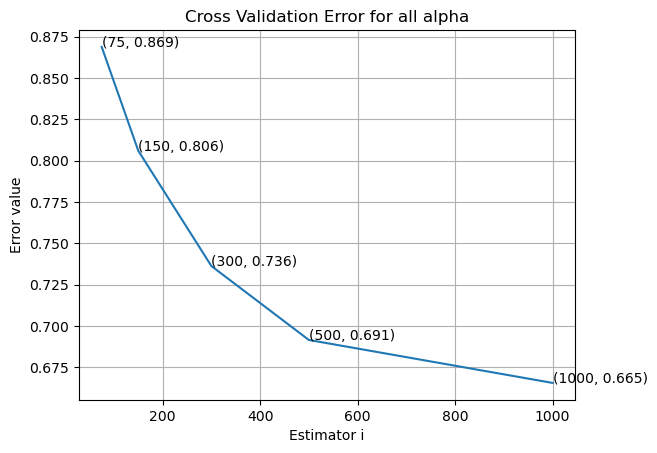

In [27]:
figure, axis = plt.subplots()
best_alpha = np.argmin(cross_val_error)
axis.plot(xgb_estimators, cross_val_error)
for i, j in enumerate(np.round(cross_val_error,3)):
    axis.annotate((xgb_estimators[i],np.round(j,3)),(xgb_estimators[i],cross_val_error[i]))

plt.title('Cross Validation Error for all alpha')
plt.xlabel('Estimator i')
plt.ylabel('Error value')
plt.grid()
plt.show()

In [29]:
# XGBRegressor(n_estimators=i,max_depth=7,eta=0.1,subsample=0.7,colsample_bytree=0.8,n_jobs=-1)

xgb_reg = XGBRegressor(n_estimators=xgb_estimators[best_alpha],max_depth=7,eta=0.1,subsample=0.7,
                       colsample_bytree=0.8,n_jobs=-1)

xgb_reg.fit(x_train,y_train)
pred_reg_xgb_train = xgb_reg.predict(x_train)
pred_reg_xgb_cv = xgb_reg.predict(x_cv)
print('Train root mean square error for best estimator- ', xgb_estimators[best_alpha],'is',
      np.sqrt(mean_squared_error(y_train, pred_reg_xgb_train)))
print('CV root mean square error for best estimator- ', xgb_estimators[best_alpha],'is',
      np.sqrt(mean_squared_error(y_cv, pred_reg_xgb_cv)))

Train root mean square error for best estimator-  1000 is 0.49764007
CV root mean square error for best estimator-  1000 is 0.6654665


In [30]:
reg_file = 'XGBOOST_reg_model.sav'
joblib.dump(xgb_reg,reg_file)

['XGBOOST_reg_model.sav']

## 5. Predictions on Models

In [31]:
# train_data.drop('air_temperature_diff',axis=1,inplace=True)
train_data.columns

Index(['building_id', 'meter', 'meter_reading', 'site_id', 'primary_use',
       'square_feet', 'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'hour', 'day_of_week', 'month', 'day_of_year', 'day',
       'year', 'relative_humidity', 'feels_like', 'holiday', 'season',
       'IsDayTime', 'latitude', 'solarHour', 'solarDec', 'horizsolar',
       'air_temperature_diff'],
      dtype='object')

In [32]:
test_data.columns

Index(['building_id', 'meter', 'site_id', 'primary_use', 'square_feet',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'hour', 'day_of_week', 'month', 'day_of_year', 'day',
       'year', 'relative_humidity', 'feels_like', 'holiday', 'season',
       'IsDayTime', 'latitude', 'solarHour', 'solarDec', 'horizsolar',
       'air_temperature_diff'],
      dtype='object')

### 5.1 Decision Tree Prediction

In [68]:
dt_reg_model = joblib.load('DT_reg_model_2.sav')

In [49]:
predictions=pd.DataFrame()

In [50]:
predictions['building_id']=test_data['building_id']

In [71]:
predictions['logarithmic_meter_reading']= dt_reg_model.predict(test_data)

- numpy.exmp1 - This mathematical function helps a user to calculate the exponential of all the elements by subtracting 1 from all the input array elements.

In [72]:
predictions['meter_reading']= np.expm1(predictions['logarithmic_meter_reading'])

In [73]:
predictions.drop(['logarithmic_meter_reading'], axis=1,inplace=True)

In [74]:
predictions

,building_id,meter_reading
0,0,52.542126
1,1,12.275729
2,2,5.168665
3,3,937.000048
4,4,78.027166
...,...,...
41697595,1444,7.985577
41697596,1445,5.150256
41697597,1446,4.369885
41697598,1447,185.370532


In [75]:
submission = pd.read_csv('sample_submission.csv')
submission

,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
41697595,41697595,0
41697596,41697596,0
41697597,41697597,0
41697598,41697598,0


In [76]:
submission['meter_reading'] = predictions['meter_reading']
submission

,row_id,meter_reading
0,0,52.542126
1,1,12.275729
2,2,5.168665
3,3,937.000048
4,4,78.027166
...,...,...
41697595,41697595,7.985577
41697596,41697596,5.150256
41697597,41697597,4.369885
41697598,41697598,185.370532


- Saving the predictions of the trained model to .csv file.

In [77]:
submission.to_csv('DT_reg_model_predictions_2.csv', index=False)

### 5.2 LGBM GBDT Predictions

In [44]:
lgbm_gbdt_reg_model = joblib.load('LGBM_GBDT_reg_model_2.sav')

In [49]:
predictions=pd.DataFrame()

In [50]:
predictions['building_id']=test_data['building_id']

In [51]:
predictions['logarithmic_meter_reading']= lgbm_gbdt_reg_model.predict(test_data)

- numpy.exmp1 - This mathematical function helps a user to calculate the exponential of all the elements by subtracting 1 from all the input array elements.

In [52]:
predictions['meter_reading']= np.expm1(predictions['logarithmic_meter_reading'])

In [53]:
predictions.drop(['logarithmic_meter_reading'], axis=1,inplace=True)

In [54]:
predictions

,building_id,meter_reading
0,0,74.414890
1,1,18.128505
2,2,2.313177
3,3,90.748942
4,4,62.386782
...,...,...
41697595,1444,6.534729
41697596,1445,4.305187
41697597,1446,6.192952
41697598,1447,196.419879


In [55]:
submission = pd.read_csv('sample_submission.csv')
submission

,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
41697595,41697595,0
41697596,41697596,0
41697597,41697597,0
41697598,41697598,0


In [56]:
submission['meter_reading'] = predictions['meter_reading']
submission

,row_id,meter_reading
0,0,74.414890
1,1,18.128505
2,2,2.313177
3,3,90.748942
4,4,62.386782
...,...,...
41697595,41697595,6.534729
41697596,41697596,4.305187
41697597,41697597,6.192952
41697598,41697598,196.419879


- Saving the predictions of the trained model to .csv file.

In [57]:
submission.to_csv('LGBM_GBDT_reg_model_predictions_2.csv', index=False)

### 5.3 Random Forest Prediction

In [37]:
rf_reg_model = joblib.load('RF_reg_model.sav')

In [38]:
predictions=pd.DataFrame()

In [39]:
predictions['building_id']=test_data['building_id']

In [40]:
predictions['logarithmic_meter_reading']= rf_reg_model.predict(test_data)

- numpy.exmp1 - This mathematical function helps a user to calculate the exponential of all the elements by subtracting 1 from all the input array elements.

In [41]:
predictions['meter_reading']= np.expm1(predictions['logarithmic_meter_reading'])

In [42]:
predictions.drop(['logarithmic_meter_reading'], axis=1,inplace=True)

In [43]:
predictions

,building_id,meter_reading
0,0,85.457235
1,1,17.088676
2,2,6.121147
3,3,310.656053
4,4,91.843301
...,...,...
41697595,1444,7.218494
41697596,1445,5.107168
41697597,1446,4.372439
41697598,1447,184.372088


In [44]:
submission = pd.read_csv('sample_submission.csv')
submission

,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
41697595,41697595,0
41697596,41697596,0
41697597,41697597,0
41697598,41697598,0


In [45]:
submission['meter_reading'] = predictions['meter_reading']
submission

,row_id,meter_reading
0,0,85.457235
1,1,17.088676
2,2,6.121147
3,3,310.656053
4,4,91.843301
...,...,...
41697595,41697595,7.218494
41697596,41697596,5.107168
41697597,41697597,4.372439
41697598,41697598,184.372088


- Saving the predictions of the trained model to .csv file.

In [46]:
submission.to_csv('RF_reg_model_predictions_2.csv', index=False)

### 5.4 LGBM RF Predictions

In [26]:
lgbm_rf_reg_model = joblib.load('LGBM_RF_reg_model.sav')

In [27]:
predictions=pd.DataFrame()

In [28]:
predictions['building_id']=test_data['building_id']

In [29]:
predictions['logarithmic_meter_reading']= lgbm_rf_reg_model.predict(test_data)

- numpy.exmp1 - This mathematical function helps a user to calculate the exponential of all the elements by subtracting 1 from all the input array elements.

In [31]:
predictions['meter_reading']= np.expm1(predictions['logarithmic_meter_reading'])

In [32]:
predictions.drop(['logarithmic_meter_reading'], axis=1,inplace=True)

In [33]:
predictions

,building_id,meter_reading
0,0,94.882198
1,1,10.856507
2,2,94.882198
3,3,210.953252
4,4,312.735104
...,...,...
41697595,1444,35.469427
41697596,1445,22.989105
41697597,1446,23.115456
41697598,1447,35.028310


In [34]:
submission = pd.read_csv('sample_submission.csv')
submission

,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
41697595,41697595,0
41697596,41697596,0
41697597,41697597,0
41697598,41697598,0


In [35]:
submission['meter_reading'] = predictions['meter_reading']
submission

,row_id,meter_reading
0,0,94.882198
1,1,10.856507
2,2,94.882198
3,3,210.953252
4,4,312.735104
...,...,...
41697595,41697595,35.469427
41697596,41697596,22.989105
41697597,41697597,23.115456
41697598,41697598,35.028310


- Saving the predictions of the trained model to .csv file.

In [36]:
submission.to_csv('LGBM_RF_reg_model_predictions_2.csv', index=False)

### 5.5 Catboost Regression Model Predictions

In [43]:
catb_reg_model=joblib.load('CATBOOST_reg_model.sav')

In [44]:
# test_data['meter'] = test_data['meter'].astype(int)
test_data.dtypes

building_id               int16
meter                      int8
site_id                    int8
primary_use                int8
square_feet             float16
air_temperature         float16
cloud_coverage          float16
dew_temperature         float16
precip_depth_1_hr       float16
sea_level_pressure      float16
wind_direction          float16
wind_speed              float16
hour                       int8
day_of_week                int8
month                      int8
day_of_year               int16
day                        int8
year                      int16
relative_humidity       float16
feels_like              float16
holiday                    int8
season                     int8
IsDayTime                  int8
latitude                float16
solarHour                  int8
solarDec                float16
horizsolar              float16
air_temperature_diff    float16
dtype: object

In [45]:
predictions=pd.DataFrame()

In [46]:
predictions['building_id']=test_data['building_id']

In [47]:
predictions['logarithmic_meter_reading']= catb_reg_model.predict(test_data)

- numpy.exmp1 - This mathematical function helps a user to calculate the exponential of all the elements by subtracting 1 from all the input array elements.

In [48]:
predictions['meter_reading']= np.expm1(predictions['logarithmic_meter_reading'])

In [49]:
predictions.drop(['logarithmic_meter_reading'], axis=1,inplace=True)

In [50]:
predictions

,building_id,meter_reading
0,0,18.435722
1,1,10.115065
2,2,2.404404
3,3,39.012337
4,4,125.339259
...,...,...
41697595,1444,7.471872
41697596,1445,4.684579
41697597,1446,5.264130
41697598,1447,183.218747


In [51]:
submission = pd.read_csv('sample_submission.csv')
submission

,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
41697595,41697595,0
41697596,41697596,0
41697597,41697597,0
41697598,41697598,0


In [52]:
submission['meter_reading'] = predictions['meter_reading']
submission

,row_id,meter_reading
0,0,18.435722
1,1,10.115065
2,2,2.404404
3,3,39.012337
4,4,125.339259
...,...,...
41697595,41697595,7.471872
41697596,41697596,4.684579
41697597,41697597,5.264130
41697598,41697598,183.218747


- Saving the predictions of the trained model to .csv file.

In [53]:
submission.to_csv('CATBOOST_reg_model_predictions.csv', index=False)

### 5.6 XGBoost Regression Model Prediction

In [33]:
xgb_reg_model = joblib.load('XGBOOST_reg_model.sav')

In [34]:
predictions=pd.DataFrame()

In [35]:
predictions['building_id']=test_data['building_id']

In [36]:
predictions['logarithmic_meter_reading']= xgb_reg_model.predict(test_data)

- numpy.exmp1 - This mathematical function helps a user to calculate the exponential of all the elements by subtracting 1 from all the input array elements.

In [37]:
predictions['meter_reading']= np.expm1(predictions['logarithmic_meter_reading'])

In [38]:
predictions.drop(['logarithmic_meter_reading'], axis=1,inplace=True)

In [39]:
predictions

,building_id,meter_reading
0,0,11.371355
1,1,18.959059
2,2,2.064799
3,3,61.424473
4,4,73.089058
...,...,...
41697595,1444,6.318390
41697596,1445,4.794889
41697597,1446,5.525005
41697598,1447,176.371597


In [40]:
submission = pd.read_csv('sample_submission.csv')
submission

,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
41697595,41697595,0
41697596,41697596,0
41697597,41697597,0
41697598,41697598,0


In [41]:
submission['meter_reading'] = predictions['meter_reading']
submission

,row_id,meter_reading
0,0,11.371355
1,1,18.959059
2,2,2.064799
3,3,61.424473
4,4,73.089058
...,...,...
41697595,41697595,6.318390
41697596,41697596,4.794889
41697597,41697597,5.525005
41697598,41697598,176.371597


- Saving the predictions of the trained model to .csv file.

In [42]:
submission.to_csv('XGBOOST_reg_model_predictions.csv', index=False)

## 6. Result and Conclusion

In [109]:
!pip install prettytable

In [55]:
end_table = PrettyTable()

In [56]:
end_table.field_names = ['Regression Model','Train Root Mean Square Error','Cross-Validation Root Mean Square Error']
end_table.add_row(['Baseline Model',1.502,1.533])
end_table.add_row(['Decision Tree Regression Model', 0.578,0.846])
end_table.add_row(['LGBM GBDT Regression Model', 0.442,0.635])
end_table.add_row(['Random Forest Regression Model', 0.561,0.816])
end_table.add_row(['LGBM Random Forest Regression Model', 1.166,1.177])
end_table.add_row(['Catboost Regression Model', 0.575,0.684])
end_table.add_row(['XGBoost Regression Model', 0.497,0.665])
print(end_table)

+-------------------------------------+------------------------------+-----------------------------------------+
|           Regression Model          | Train Root Mean Square Error | Cross-Validation Root Mean Square Error |
+-------------------------------------+------------------------------+-----------------------------------------+
|            Baseline Model           |            1.502             |                  1.533                  |
|    Decision Tree Regression Model   |            0.578             |                  0.846                  |
|      LGBM GBDT Regression Model     |            0.442             |                  0.635                  |
|    Random Forest Regression Model   |            0.561             |                  0.816                  |
| LGBM Random Forest Regression Model |            1.166             |                  1.177                  |
|      Catboost Regression Model      |            0.575             |                  0.684   

- We have trained various models in this problem and then, predictions are made using these trained models which can be well seen in the 5th Section of this file, named 'Predictions on Models'.
- We see that 'LightGBM's GBDT Regression Model' gives the lowest train and Cross-Validation error.

- I've submitted my predictions on the Kaggle Website, below are the scores generated.
- Link- https://www.kaggle.com/competitions/ashrae-energy-prediction/submissions

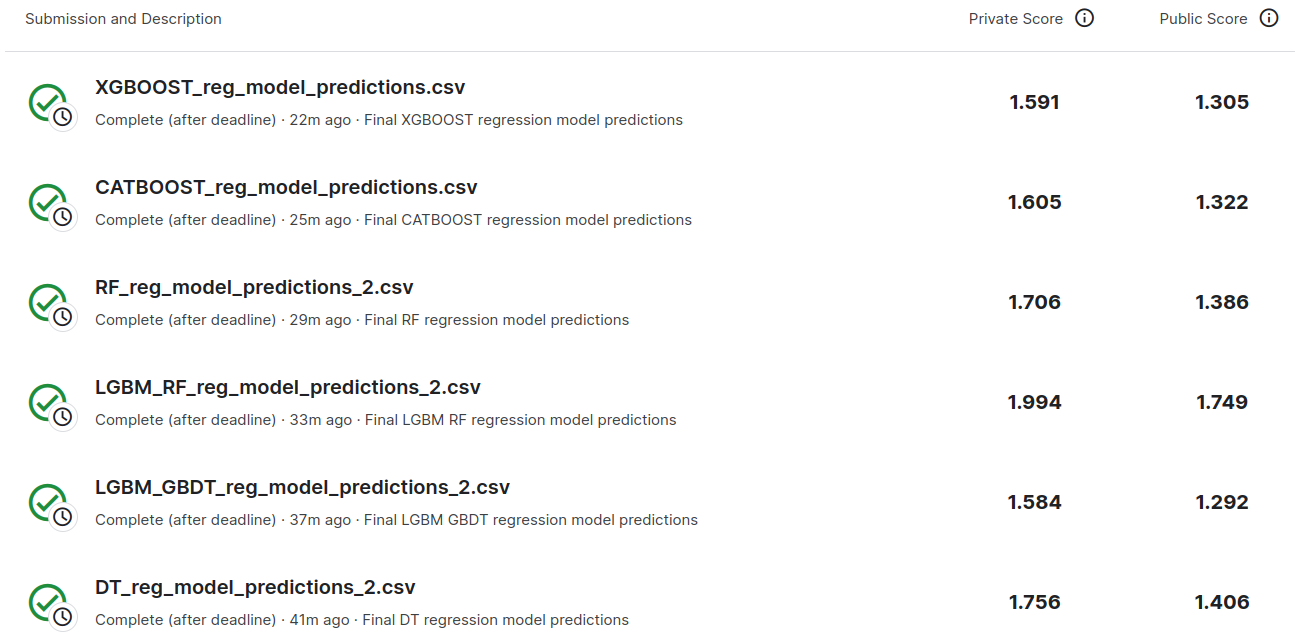

- We can see that the LGBM GBDT regression Model has the lowest scores. This is our best model.
- The public and private scores for the best model are- 1.292 and 1.584.
- This is a pretty decent score.
- It might be lowered if we can extract some more features from the given data.